# *ml-3-analyze-results.ipynb*

# Read results, pick out the best ones, and plot them.


In [1]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
files = os.listdir('../data/results')

In [3]:
files = [f for f in files if f[0] not in ('B','t')]

In [4]:
def read_csv(file):
    
    with open('../data/results/' + file) as f:
        for lineid, line in enumerate(f):
            if line[:4] == ',Act':
                nbr_to_skip = lineid
                break
    
    df = pd.read_csv('../data/results/' + file,
                   skiprows=nbr_to_skip,
                   index_col=0)
  
    return df

In [5]:
dfs = [read_csv(f) for f in files]

In [6]:
info = [f[:-4].split('_') for f in files]

In [7]:
m = {'architecture': [i[0][:2] for i in info],
'model': [i[0] for i in info],
'train': [i[1] for i in info],
'val': [i[2] for i in info],
'tile': [i[3] for i in info],
'scheme': [i[4] for i in info],
'crop': [i[5] for i in info],
'in_season': [i[6] for i in info],
'precision_mean': [df.loc['Mean','Precision'] for df in dfs],
'recall_mean': [df.loc['Mean','Recall'] for df in dfs],
'f1_mean': [df.loc['Mean','F1'] for df in dfs],
'precision_stde': [df.loc['StdE','Precision'] for df in dfs],
'recall_stde': [df.loc['StdE','Recall'] for df in dfs],
'f1_stde': [df.loc['StdE','F1'] for df in dfs],
'file': files
    }

In [8]:
mdf = pd.DataFrame(m)

In [9]:
# Define a function that filters mdf down to a small specific df
def filter_mdf(train, architecture, tile, in_season):
# architecture must be the two-letter abbreviation
    Specs = {'train': train,
        'architecture': architecture,
        'tile': tile,
        'in_season': in_season
            }
    Condition = []
    for key in Specs.keys():
        Condition.append(mdf[key]==str(Specs[key]))
    return mdf[Condition[0] & Condition[1] & Condition[2] & Condition[3]]

In [10]:
# Establish hierarchical dictionary and fill it with small specific dfs
sdf = {}
for w in np.unique(m['train']):
    sdf[w] = {}
    for a in np.unique(m['architecture']):
        sdf[w][a] = {}
        for b in ['10SFH','15TVG']:
            sdf[w][a][b] = {}
            for c in ['160','230','None','0','NCRH']:
                sdf[w][a][b][c] = filter_mdf(w, a, b, c)
        

In [11]:
# For each small specific df, name the top 5 models
# need to look at 

In [12]:
def read_hyperparameters(file):
    with open('../data/results/' + file) as f:
        for lineid, line in enumerate(f):
            if line[:7] in ('# model', '       '):
                print(line.rstrip())  

In [13]:
def display_best(sdf,
                 train,
                 architecture,
                 tile,
                 in_season,
                 metrics = ['precision_mean','recall_mean','f1_mean']):
    
    in_season = str(in_season)
    
    files = [] # to also return the files
    for metric in metrics:
        w = sdf[train][architecture][tile][in_season].sort_values(metric,ascending=False).head(5)
        files += w['file'].values.tolist()
        print(f'Top 5 best {metric} for {train}, {architecture}, {tile}, {in_season}')
        display(w)
        
    for file in np.unique(files):
        read_hyperparameters(file)

In [14]:
for w in np.unique(m['train']):
    for a in np.unique(m['architecture']):
        for b in ['10SFH','15TVG']:
            for c in ['160','230','None']:
                display_best(sdf,w,a,b,c)

Top 5 best precision_mean for 0.001, ET, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
39,ET,ET004,0.001,0.001,10SFH,5day,75,160,0.925476,0.536209,0.656012,0.056986,0.178832,0.143786,ET004_0.001_0.001_10SFH_5day_75_160.csv
555,ET,ET047,0.001,0.001,10SFH,5day,75,160,0.922656,0.541203,0.656260,0.066010,0.189173,0.151394,ET047_0.001_0.001_10SFH_5day_75_160.csv
15,ET,ET002,0.001,0.001,10SFH,5day,75,160,0.921898,0.550426,0.663917,0.075649,0.186775,0.149402,ET002_0.001_0.001_10SFH_5day_75_160.csv
519,ET,ET044,0.001,0.001,10SFH,5day,75,160,0.921410,0.537837,0.656390,0.066162,0.177579,0.143031,ET044_0.001_0.001_10SFH_5day_75_160.csv
75,ET,ET007,0.001,0.001,10SFH,5day,75,160,0.920991,0.544501,0.658411,0.066863,0.190228,0.152076,ET007_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 0.001, ET, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
156,ET,ET014,0.001,0.001,10SFH,14day,75,160,0.847669,0.690056,0.724787,0.119471,0.208113,0.144915,ET014_0.001_0.001_10SFH_14day_75_160.csv
540,ET,ET046,0.001,0.001,10SFH,14day,75,160,0.847496,0.688728,0.722466,0.117763,0.212424,0.142954,ET046_0.001_0.001_10SFH_14day_75_160.csv
276,ET,ET024,0.001,0.001,10SFH,14day,75,160,0.847946,0.687864,0.724579,0.114832,0.207008,0.143805,ET024_0.001_0.001_10SFH_14day_75_160.csv
180,ET,ET016,0.001,0.001,10SFH,14day,75,160,0.842358,0.686904,0.720464,0.120558,0.207700,0.144457,ET016_0.001_0.001_10SFH_14day_75_160.csv
252,ET,ET022,0.001,0.001,10SFH,14day,75,160,0.850515,0.685931,0.724633,0.119874,0.203717,0.142924,ET022_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for 0.001, ET, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
156,ET,ET014,0.001,0.001,10SFH,14day,75,160,0.847669,0.690056,0.724787,0.119471,0.208113,0.144915,ET014_0.001_0.001_10SFH_14day_75_160.csv
252,ET,ET022,0.001,0.001,10SFH,14day,75,160,0.850515,0.685931,0.724633,0.119874,0.203717,0.142924,ET022_0.001_0.001_10SFH_14day_75_160.csv
276,ET,ET024,0.001,0.001,10SFH,14day,75,160,0.847946,0.687864,0.724579,0.114832,0.207008,0.143805,ET024_0.001_0.001_10SFH_14day_75_160.csv
675,ET,ET057,0.001,0.001,10SFH,5day,75,160,0.861241,0.675620,0.724118,0.110038,0.204585,0.146340,ET057_0.001_0.001_10SFH_5day_75_160.csv
759,ET,ET064,0.001,0.001,10SFH,5day,75,160,0.858958,0.672015,0.723681,0.109014,0.197654,0.147003,ET064_0.001_0.001_10SFH_5day_75_160.csv


# model_name: ET002
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET014
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.1,
                     min_samples_split=4, n_estimators=200)
# model_name: ET016
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.1,
                     min_samples_split=4, n_estimators=200)
# model_name: ET022
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.2,
                     min_samples_split=4, n_estimators=200)
# model_name: ET024
# model: ExtraTreesClassifier(bootstrap=True,

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
508,ET,ET043,0.001,0.001,10SFH,5day,75,230,0.938570,0.522962,0.644111,0.070250,0.194418,0.159863,ET043_0.001_0.001_10SFH_5day_75_230.csv
28,ET,ET003,0.001,0.001,10SFH,5day,75,230,0.938355,0.540717,0.657241,0.070001,0.202242,0.161674,ET003_0.001_0.001_10SFH_5day_75_230.csv
40,ET,ET004,0.001,0.001,10SFH,5day,75,230,0.937440,0.514043,0.638870,0.065326,0.186494,0.155344,ET004_0.001_0.001_10SFH_5day_75_230.csv
76,ET,ET007,0.001,0.001,10SFH,5day,75,230,0.934772,0.538301,0.656513,0.066510,0.194865,0.156316,ET007_0.001_0.001_10SFH_5day_75_230.csv
520,ET,ET044,0.001,0.001,10SFH,5day,75,230,0.934746,0.513250,0.637004,0.071943,0.187338,0.154157,ET044_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best recall_mean for 0.001, ET, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
364,ET,ET031,0.001,0.001,10SFH,5day,75,230,0.868627,0.687708,0.734880,0.109047,0.205477,0.149740,ET031_0.001_0.001_10SFH_5day_75_230.csv
796,ET,ET067,0.001,0.001,10SFH,5day,75,230,0.865636,0.686390,0.732683,0.107794,0.205506,0.148272,ET067_0.001_0.001_10SFH_5day_75_230.csv
844,ET,ET071,0.001,0.001,10SFH,5day,75,230,0.866846,0.685086,0.732195,0.108284,0.206356,0.149725,ET071_0.001_0.001_10SFH_5day_75_230.csv
457,ET,ET039,0.001,0.001,10SFH,14day,75,230,0.866594,0.684802,0.730973,0.111691,0.207479,0.150141,ET039_0.001_0.001_10SFH_14day_75_230.csv
412,ET,ET035,0.001,0.001,10SFH,5day,75,230,0.858827,0.684167,0.727183,0.112300,0.206565,0.149017,ET035_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for 0.001, ET, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
364,ET,ET031,0.001,0.001,10SFH,5day,75,230,0.868627,0.687708,0.734880,0.109047,0.205477,0.149740,ET031_0.001_0.001_10SFH_5day_75_230.csv
796,ET,ET067,0.001,0.001,10SFH,5day,75,230,0.865636,0.686390,0.732683,0.107794,0.205506,0.148272,ET067_0.001_0.001_10SFH_5day_75_230.csv
340,ET,ET029,0.001,0.001,10SFH,5day,75,230,0.869012,0.684042,0.732294,0.113084,0.204874,0.151139,ET029_0.001_0.001_10SFH_5day_75_230.csv
844,ET,ET071,0.001,0.001,10SFH,5day,75,230,0.866846,0.685086,0.732195,0.108284,0.206356,0.149725,ET071_0.001_0.001_10SFH_5day_75_230.csv
772,ET,ET065,0.001,0.001,10SFH,5day,75,230,0.867124,0.682904,0.731074,0.109880,0.205013,0.148268,ET065_0.001_0.001_10SFH_5day_75_230.csv


# model_name: ET003
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, n_estimators=200,
                     n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET029
# model: ExtraTreesClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET031
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET035
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, n_estimators=200,
                     n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
41,ET,ET004,0.001,0.001,10SFH,5day,75,None,0.935476,0.515261,0.636060,0.074273,0.196099,0.160214,ET004_0.001_0.001_10SFH_5day_75_None.csv
77,ET,ET007,0.001,0.001,10SFH,5day,75,None,0.935257,0.517080,0.638403,0.071476,0.194844,0.159956,ET007_0.001_0.001_10SFH_5day_75_None.csv
509,ET,ET043,0.001,0.001,10SFH,5day,75,None,0.932672,0.526440,0.643254,0.084027,0.199446,0.161889,ET043_0.001_0.001_10SFH_5day_75_None.csv
5,ET,ET001,0.001,0.001,10SFH,5day,75,None,0.931836,0.535910,0.651083,0.086727,0.200428,0.160273,ET001_0.001_0.001_10SFH_5day_75_None.csv
557,ET,ET047,0.001,0.001,10SFH,5day,75,None,0.931290,0.537164,0.650662,0.084707,0.203447,0.164230,ET047_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for 0.001, ET, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
842,ET,ET071,0.001,0.001,10SFH,14day,75,None,0.864193,0.682206,0.728450,0.110930,0.206770,0.148786,ET071_0.001_0.001_10SFH_14day_75_None.csv
365,ET,ET031,0.001,0.001,10SFH,5day,75,None,0.866560,0.679303,0.728379,0.111659,0.204817,0.148697,ET031_0.001_0.001_10SFH_5day_75_None.csv
845,ET,ET071,0.001,0.001,10SFH,5day,75,None,0.866155,0.678925,0.727254,0.114818,0.205727,0.150527,ET071_0.001_0.001_10SFH_5day_75_None.csv
458,ET,ET039,0.001,0.001,10SFH,14day,75,None,0.863107,0.678621,0.725679,0.112984,0.205127,0.147198,ET039_0.001_0.001_10SFH_14day_75_None.csv
794,ET,ET067,0.001,0.001,10SFH,14day,75,None,0.860712,0.678575,0.724847,0.111007,0.204992,0.145423,ET067_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for 0.001, ET, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
842,ET,ET071,0.001,0.001,10SFH,14day,75,None,0.864193,0.682206,0.728450,0.110930,0.206770,0.148786,ET071_0.001_0.001_10SFH_14day_75_None.csv
365,ET,ET031,0.001,0.001,10SFH,5day,75,None,0.866560,0.679303,0.728379,0.111659,0.204817,0.148697,ET031_0.001_0.001_10SFH_5day_75_None.csv
845,ET,ET071,0.001,0.001,10SFH,5day,75,None,0.866155,0.678925,0.727254,0.114818,0.205727,0.150527,ET071_0.001_0.001_10SFH_5day_75_None.csv
458,ET,ET039,0.001,0.001,10SFH,14day,75,None,0.863107,0.678621,0.725679,0.112984,0.205127,0.147198,ET039_0.001_0.001_10SFH_14day_75_None.csv
797,ET,ET067,0.001,0.001,10SFH,5day,75,None,0.865018,0.676737,0.725624,0.112934,0.205638,0.149900,ET067_0.001_0.001_10SFH_5day_75_None.csv


# model_name: ET001
# model: ExtraTreesClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET031
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET043
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, n_estimators=500,
                     n_jobs=-1)
# model_name: ET047
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=5

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
525,ET,ET044,0.001,0.001,15TVG,5day,1,160,0.806731,0.339155,0.458483,0.110387,0.102080,0.091558,ET044_0.001_0.001_15TVG_5day_1_160.csv
45,ET,ET004,0.001,0.001,15TVG,5day,1,160,0.794778,0.351827,0.466428,0.108418,0.111207,0.099895,ET004_0.001_0.001_15TVG_5day_1_160.csv
501,ET,ET042,0.001,0.001,15TVG,5day,1,160,0.792542,0.363648,0.479721,0.119136,0.099524,0.081576,ET042_0.001_0.001_15TVG_5day_1_160.csv
81,ET,ET007,0.001,0.001,15TVG,5day,1,160,0.791446,0.375427,0.490304,0.122789,0.097810,0.074783,ET007_0.001_0.001_15TVG_5day_1_160.csv
57,ET,ET005,0.001,0.001,15TVG,5day,1,160,0.788780,0.389467,0.502176,0.124993,0.098848,0.070150,ET005_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 0.001, ET, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
546,ET,ET046,0.001,0.001,15TVG,14day,1,160,0.707363,0.516687,0.576760,0.130404,0.101907,0.047873,ET046_0.001_0.001_15TVG_14day_1_160.csv
66,ET,ET006,0.001,0.001,15TVG,14day,1,160,0.704234,0.514023,0.574252,0.128460,0.100665,0.045026,ET006_0.001_0.001_15TVG_14day_1_160.csv
90,ET,ET008,0.001,0.001,15TVG,14day,1,160,0.707092,0.513316,0.573711,0.128352,0.105891,0.046685,ET008_0.001_0.001_15TVG_14day_1_160.csv
570,ET,ET048,0.001,0.001,15TVG,14day,1,160,0.701398,0.512691,0.571365,0.128204,0.104542,0.048458,ET048_0.001_0.001_15TVG_14day_1_160.csv
186,ET,ET016,0.001,0.001,15TVG,14day,1,160,0.717968,0.500247,0.568925,0.131884,0.100682,0.044178,ET016_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 0.001, ET, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
546,ET,ET046,0.001,0.001,15TVG,14day,1,160,0.707363,0.516687,0.576760,0.130404,0.101907,0.047873,ET046_0.001_0.001_15TVG_14day_1_160.csv
66,ET,ET006,0.001,0.001,15TVG,14day,1,160,0.704234,0.514023,0.574252,0.128460,0.100665,0.045026,ET006_0.001_0.001_15TVG_14day_1_160.csv
90,ET,ET008,0.001,0.001,15TVG,14day,1,160,0.707092,0.513316,0.573711,0.128352,0.105891,0.046685,ET008_0.001_0.001_15TVG_14day_1_160.csv
570,ET,ET048,0.001,0.001,15TVG,14day,1,160,0.701398,0.512691,0.571365,0.128204,0.104542,0.048458,ET048_0.001_0.001_15TVG_14day_1_160.csv
186,ET,ET016,0.001,0.001,15TVG,14day,1,160,0.717968,0.500247,0.568925,0.131884,0.100682,0.044178,ET016_0.001_0.001_15TVG_14day_1_160.csv


# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET005
# model: ExtraTreesClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET006
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.05,
                     min_samples_split=4, n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET008
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     min_samples_split=4, n_estimators=200, n_jobs=-1)
# model_name: ET016
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.1,
                     min_samples_split=4, n_estimators=200)
# model_name: ET042
# model: 

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
34,ET,ET003,0.001,0.001,15TVG,5day,1,230,0.813751,0.350169,0.471006,0.124935,0.095597,0.076272,ET003_0.001_0.001_15TVG_5day_1_230.csv
526,ET,ET044,0.001,0.001,15TVG,5day,1,230,0.810994,0.301704,0.417053,0.107129,0.114778,0.120615,ET044_0.001_0.001_15TVG_5day_1_230.csv
46,ET,ET004,0.001,0.001,15TVG,5day,1,230,0.810958,0.302989,0.419700,0.109250,0.108916,0.108113,ET004_0.001_0.001_15TVG_5day_1_230.csv
502,ET,ET042,0.001,0.001,15TVG,5day,1,230,0.807701,0.326677,0.444982,0.118408,0.104209,0.098958,ET042_0.001_0.001_15TVG_5day_1_230.csv
82,ET,ET007,0.001,0.001,15TVG,5day,1,230,0.806781,0.354406,0.474242,0.120410,0.096429,0.081163,ET007_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for 0.001, ET, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
946,ET,ET079,0.001,0.001,15TVG,5day,1,230,0.712201,0.503990,0.572076,0.122110,0.097124,0.051612,ET079_0.001_0.001_15TVG_5day_1_230.csv
898,ET,ET075,0.001,0.001,15TVG,5day,1,230,0.708009,0.502363,0.569711,0.121522,0.097131,0.054414,ET075_0.001_0.001_15TVG_5day_1_230.csv
466,ET,ET039,0.001,0.001,15TVG,5day,1,230,0.705146,0.499105,0.567428,0.116416,0.095059,0.052503,ET039_0.001_0.001_15TVG_5day_1_230.csv
418,ET,ET035,0.001,0.001,15TVG,5day,1,230,0.709551,0.496114,0.564368,0.123078,0.102079,0.057253,ET035_0.001_0.001_15TVG_5day_1_230.csv
463,ET,ET039,0.001,0.001,15TVG,14day,1,230,0.707972,0.495575,0.564704,0.119248,0.099575,0.054481,ET039_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for 0.001, ET, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
946,ET,ET079,0.001,0.001,15TVG,5day,1,230,0.712201,0.503990,0.572076,0.122110,0.097124,0.051612,ET079_0.001_0.001_15TVG_5day_1_230.csv
898,ET,ET075,0.001,0.001,15TVG,5day,1,230,0.708009,0.502363,0.569711,0.121522,0.097131,0.054414,ET075_0.001_0.001_15TVG_5day_1_230.csv
466,ET,ET039,0.001,0.001,15TVG,5day,1,230,0.705146,0.499105,0.567428,0.116416,0.095059,0.052503,ET039_0.001_0.001_15TVG_5day_1_230.csv
319,ET,ET027,0.001,0.001,15TVG,14day,1,230,0.728462,0.489992,0.567344,0.117502,0.101404,0.057904,ET027_0.001_0.001_15TVG_14day_1_230.csv
895,ET,ET075,0.001,0.001,15TVG,14day,1,230,0.714868,0.494500,0.566776,0.122279,0.095865,0.052747,ET075_0.001_0.001_15TVG_14day_1_230.csv


# model_name: ET003
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, n_estimators=200,
                     n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET007
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.05, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET027
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET035
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, n_estimators=200,
                     n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
527,ET,ET044,0.001,0.001,15TVG,5day,1,None,0.819744,0.277272,0.395371,0.112527,0.104613,0.105694,ET044_0.001_0.001_15TVG_5day_1_None.csv
503,ET,ET042,0.001,0.001,15TVG,5day,1,None,0.817042,0.305084,0.425040,0.114121,0.105418,0.092600,ET042_0.001_0.001_15TVG_5day_1_None.csv
23,ET,ET002,0.001,0.001,15TVG,5day,1,None,0.815929,0.299313,0.419129,0.103985,0.107170,0.099812,ET002_0.001_0.001_15TVG_5day_1_None.csv
47,ET,ET004,0.001,0.001,15TVG,5day,1,None,0.815268,0.278861,0.395834,0.106152,0.111118,0.110368,ET004_0.001_0.001_15TVG_5day_1_None.csv
524,ET,ET044,0.001,0.001,15TVG,14day,1,None,0.806611,0.338333,0.460621,0.127753,0.084490,0.066549,ET044_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for 0.001, ET, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
371,ET,ET031,0.001,0.001,15TVG,5day,1,None,0.721416,0.503935,0.578138,0.113028,0.089279,0.049484,ET031_0.001_0.001_15TVG_5day_1_None.csv
947,ET,ET079,0.001,0.001,15TVG,5day,1,None,0.712173,0.502911,0.572923,0.118897,0.092941,0.053507,ET079_0.001_0.001_15TVG_5day_1_None.csv
443,ET,ET037,0.001,0.001,15TVG,5day,1,None,0.693551,0.500460,0.565076,0.106819,0.097353,0.055089,ET037_0.001_0.001_15TVG_5day_1_None.csv
419,ET,ET035,0.001,0.001,15TVG,5day,1,None,0.709566,0.499383,0.570278,0.124665,0.085471,0.047390,ET035_0.001_0.001_15TVG_5day_1_None.csv
467,ET,ET039,0.001,0.001,15TVG,5day,1,None,0.707233,0.498773,0.569553,0.113702,0.092088,0.054270,ET039_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 0.001, ET, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
371,ET,ET031,0.001,0.001,15TVG,5day,1,None,0.721416,0.503935,0.578138,0.113028,0.089279,0.049484,ET031_0.001_0.001_15TVG_5day_1_None.csv
800,ET,ET067,0.001,0.001,15TVG,14day,1,None,0.722719,0.498682,0.573993,0.120106,0.091041,0.054015,ET067_0.001_0.001_15TVG_14day_1_None.csv
803,ET,ET067,0.001,0.001,15TVG,5day,1,None,0.725756,0.494611,0.572952,0.114272,0.089617,0.052636,ET067_0.001_0.001_15TVG_5day_1_None.csv
323,ET,ET027,0.001,0.001,15TVG,5day,1,None,0.721829,0.496892,0.572933,0.114166,0.090665,0.048350,ET027_0.001_0.001_15TVG_5day_1_None.csv
947,ET,ET079,0.001,0.001,15TVG,5day,1,None,0.712173,0.502911,0.572923,0.118897,0.092941,0.053507,ET079_0.001_0.001_15TVG_5day_1_None.csv


# model_name: ET002
# model: ExtraTreesClassifier(class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET004
# model: ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=0.05,
                     n_estimators=200, n_jobs=-1)
# model_name: ET027
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET031
# model: ExtraTreesClassifier(bootstrap=True, max_features=0.4, min_samples_split=4,
                     n_estimators=200, n_jobs=-1)
# model_name: ET035
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, n_estimators=200,
                     n_jobs=-1)
# model_name: ET037
# model: ExtraTreesClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                     n_jobs=-1)
# model_name: ET039
# model: ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_split=4,
                     n_estima

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2772,KN,KN152,0.001,0.001,10SFH,14day,75,160,1.0,0.034820,0.080354,0.0,0.041199,0.076642,KN152_0.001_0.001_10SFH_14day_75_160.csv
2535,KN,KN132,0.001,0.001,10SFH,5day,75,160,1.0,0.104665,0.184859,0.0,0.056345,0.090934,KN132_0.001_0.001_10SFH_5day_75_160.csv
2739,KN,KN149,0.001,0.001,10SFH,5day,75,160,1.0,0.238228,0.377660,0.0,0.084961,0.104061,KN149_0.001_0.001_10SFH_5day_75_160.csv
2691,KN,KN145,0.001,0.001,10SFH,5day,75,160,1.0,0.117129,0.203182,0.0,0.067410,0.108011,KN145_0.001_0.001_10SFH_5day_75_160.csv
2679,KN,KN144,0.001,0.001,10SFH,5day,75,160,1.0,0.022568,0.053436,0.0,0.027572,0.052470,KN144_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 0.001, KN, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1899,KN,KN079,0.001,0.001,10SFH,5day,75,160,0.832986,0.714477,0.732095,0.130807,0.207939,0.145892,KN079_0.001_0.001_10SFH_5day_75_160.csv
1803,KN,KN071,0.001,0.001,10SFH,5day,75,160,0.835734,0.712579,0.733093,0.129401,0.207284,0.147269,KN071_0.001_0.001_10SFH_5day_75_160.csv
1896,KN,KN079,0.001,0.001,10SFH,14day,75,160,0.842040,0.710501,0.734647,0.130299,0.206973,0.147964,KN079_0.001_0.001_10SFH_14day_75_160.csv
1659,KN,KN059,0.001,0.001,10SFH,5day,75,160,0.832754,0.709462,0.728993,0.132172,0.207648,0.147476,KN059_0.001_0.001_10SFH_5day_75_160.csv
1563,KN,KN051,0.001,0.001,10SFH,5day,75,160,0.841399,0.708424,0.734307,0.125543,0.205399,0.147252,KN051_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 0.001, KN, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1896,KN,KN079,0.001,0.001,10SFH,14day,75,160,0.842040,0.710501,0.734647,0.130299,0.206973,0.147964,KN079_0.001_0.001_10SFH_14day_75_160.csv
1563,KN,KN051,0.001,0.001,10SFH,5day,75,160,0.841399,0.708424,0.734307,0.125543,0.205399,0.147252,KN051_0.001_0.001_10SFH_5day_75_160.csv
1611,KN,KN055,0.001,0.001,10SFH,5day,75,160,0.840783,0.706995,0.733494,0.124732,0.204781,0.146905,KN055_0.001_0.001_10SFH_5day_75_160.csv
1707,KN,KN063,0.001,0.001,10SFH,5day,75,160,0.840110,0.707864,0.733393,0.128824,0.205136,0.148390,KN063_0.001_0.001_10SFH_5day_75_160.csv
1803,KN,KN071,0.001,0.001,10SFH,5day,75,160,0.835734,0.712579,0.733093,0.129401,0.207284,0.147269,KN071_0.001_0.001_10SFH_5day_75_160.csv


# model_name: KN051
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=15))])
# model_name: KN055
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=15,
                                      weights='distance'))])
# model_name: KN059
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=21))])
# model_name: KN063
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=21,
                                      weights='distance'))])
# model_name: KN071
# model: Pipeline(steps=[('standardscaler', StandardScaler()

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2677,KN,KN144,0.001,0.001,10SFH,14day,75,230,1.0,0.084402,0.154122,0.0,0.031602,0.052964,KN144_0.001_0.001_10SFH_14day_75_230.csv
2692,KN,KN145,0.001,0.001,10SFH,5day,75,230,1.0,0.007977,0.019517,0.0,0.010549,0.021171,KN145_0.001_0.001_10SFH_5day_75_230.csv
2584,KN,KN136,0.001,0.001,10SFH,5day,75,230,1.0,0.059547,0.111657,0.0,0.021001,0.037577,KN136_0.001_0.001_10SFH_5day_75_230.csv
2629,KN,KN140,0.001,0.001,10SFH,14day,75,230,1.0,0.024700,0.047777,0.0,0.015277,0.028950,KN140_0.001_0.001_10SFH_14day_75_230.csv
2581,KN,KN136,0.001,0.001,10SFH,14day,75,230,1.0,0.158490,0.271991,0.0,0.035756,0.052620,KN136_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, KN, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1897,KN,KN079,0.001,0.001,10SFH,14day,75,230,0.840009,0.706615,0.731388,0.129560,0.207193,0.146604,KN079_0.001_0.001_10SFH_14day_75_230.csv
2473,KN,KN127,0.001,0.001,10SFH,14day,75,230,0.796925,0.706511,0.713021,0.127920,0.201721,0.134503,KN127_0.001_0.001_10SFH_14day_75_230.csv
1900,KN,KN079,0.001,0.001,10SFH,5day,75,230,0.834016,0.703928,0.726432,0.132143,0.205775,0.143450,KN079_0.001_0.001_10SFH_5day_75_230.csv
1801,KN,KN071,0.001,0.001,10SFH,14day,75,230,0.840212,0.702479,0.729291,0.130241,0.205001,0.145374,KN071_0.001_0.001_10SFH_14day_75_230.csv
1657,KN,KN059,0.001,0.001,10SFH,14day,75,230,0.833231,0.702410,0.724050,0.132246,0.208718,0.144132,KN059_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best f1_mean for 0.001, KN, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1897,KN,KN079,0.001,0.001,10SFH,14day,75,230,0.840009,0.706615,0.731388,0.129560,0.207193,0.146604,KN079_0.001_0.001_10SFH_14day_75_230.csv
1597,KN,KN054,0.001,0.001,10SFH,14day,75,230,0.846365,0.698660,0.731005,0.114521,0.205780,0.143635,KN054_0.001_0.001_10SFH_14day_75_230.csv
1801,KN,KN071,0.001,0.001,10SFH,14day,75,230,0.840212,0.702479,0.729291,0.130241,0.205001,0.145374,KN071_0.001_0.001_10SFH_14day_75_230.csv
1501,KN,KN046,0.001,0.001,10SFH,14day,75,230,0.845735,0.696927,0.729047,0.118560,0.206340,0.144705,KN046_0.001_0.001_10SFH_14day_75_230.csv
1552,KN,KN050,0.001,0.001,10SFH,5day,75,230,0.842855,0.699265,0.728827,0.109334,0.210667,0.139851,KN050_0.001_0.001_10SFH_5day_75_230.csv


# model_name: KN046
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=11,
                                      weights='distance'))])
# model_name: KN050
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=15))])
# model_name: KN054
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=15,
                                      weights='distance'))])
# model_name: KN059
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=21))])
# model_name: KN071
# model: Pipeline(steps=[('standardscaler', StandardScaler()

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2390,KN,KN120,0.001,0.001,10SFH,14day,75,None,1.0,0.225138,0.360789,0.0,0.080906,0.102173,KN120_0.001_0.001_10SFH_14day_75_None.csv
2357,KN,KN117,0.001,0.001,10SFH,5day,75,None,1.0,0.292516,0.442140,0.0,0.110504,0.122889,KN117_0.001_0.001_10SFH_5day_75_None.csv
2246,KN,KN108,0.001,0.001,10SFH,14day,75,None,1.0,0.253835,0.396277,0.0,0.094667,0.114248,KN108_0.001_0.001_10SFH_14day_75_None.csv
2549,KN,KN133,0.001,0.001,10SFH,5day,75,None,1.0,0.214891,0.348752,0.0,0.068399,0.089054,KN133_0.001_0.001_10SFH_5day_75_None.csv
2309,KN,KN113,0.001,0.001,10SFH,5day,75,None,1.0,0.287123,0.436141,0.0,0.106987,0.120540,KN113_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for 0.001, KN, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2474,KN,KN127,0.001,0.001,10SFH,14day,75,None,0.796646,0.702860,0.710855,0.127862,0.200280,0.133984,KN127_0.001_0.001_10SFH_14day_75_None.csv
1898,KN,KN079,0.001,0.001,10SFH,14day,75,None,0.838505,0.699622,0.727092,0.127409,0.202187,0.141786,KN079_0.001_0.001_10SFH_14day_75_None.csv
1742,KN,KN066,0.001,0.001,10SFH,14day,75,None,0.838678,0.698135,0.725004,0.119626,0.207878,0.137762,KN066_0.001_0.001_10SFH_14day_75_None.csv
1802,KN,KN071,0.001,0.001,10SFH,14day,75,None,0.842258,0.697045,0.727577,0.126609,0.202623,0.142982,KN071_0.001_0.001_10SFH_14day_75_None.csv
1901,KN,KN079,0.001,0.001,10SFH,5day,75,None,0.835108,0.696371,0.722630,0.132235,0.203404,0.140013,KN079_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for 0.001, KN, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1802,KN,KN071,0.001,0.001,10SFH,14day,75,None,0.842258,0.697045,0.727577,0.126609,0.202623,0.142982,KN071_0.001_0.001_10SFH_14day_75_None.csv
1898,KN,KN079,0.001,0.001,10SFH,14day,75,None,0.838505,0.699622,0.727092,0.127409,0.202187,0.141786,KN079_0.001_0.001_10SFH_14day_75_None.csv
1886,KN,KN078,0.001,0.001,10SFH,14day,75,None,0.844758,0.693964,0.726339,0.117113,0.206368,0.140699,KN078_0.001_0.001_10SFH_14day_75_None.csv
1838,KN,KN074,0.001,0.001,10SFH,14day,75,None,0.842304,0.692920,0.725195,0.118392,0.203345,0.136422,KN074_0.001_0.001_10SFH_14day_75_None.csv
1742,KN,KN066,0.001,0.001,10SFH,14day,75,None,0.838678,0.698135,0.725004,0.119626,0.207878,0.137762,KN066_0.001_0.001_10SFH_14day_75_None.csv


# model_name: KN066
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=29))])
# model_name: KN071
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=29,
                                      weights='distance'))])
# model_name: KN074
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=41))])
# model_name: KN078
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=41,
                                      weights='distance'))])
# model_name: KN079
# model: Pipeline(steps=[('standardscaler', StandardScaler()

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2202,KN,KN104,0.001,0.001,15TVG,14day,1,160,0.952381,0.007374,0.024092,0.067344,0.008837,0.016199,KN104_0.001_0.001_15TVG_14day_1_160.csv
2154,KN,KN100,0.001,0.001,15TVG,14day,1,160,0.952381,0.006932,0.022646,0.067344,0.008696,0.016522,KN100_0.001_0.001_15TVG_14day_1_160.csv
1725,KN,KN064,0.001,0.001,15TVG,5day,1,160,0.916667,0.005591,0.013848,0.144338,0.004271,0.007130,KN064_0.001_0.001_15TVG_5day_1_160.csv
1677,KN,KN060,0.001,0.001,15TVG,5day,1,160,0.916667,0.005591,0.013848,0.144338,0.004271,0.007130,KN060_0.001_0.001_15TVG_5day_1_160.csv
1629,KN,KN056,0.001,0.001,15TVG,5day,1,160,0.893333,0.009600,0.018964,0.137275,0.002614,0.005104,KN056_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 0.001, KN, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2142,KN,KN099,0.001,0.001,15TVG,14day,1,160,0.705442,0.515676,0.576449,0.119416,0.102304,0.053534,KN099_0.001_0.001_15TVG_14day_1_160.csv
2046,KN,KN091,0.001,0.001,15TVG,14day,1,160,0.714139,0.513525,0.578926,0.117165,0.100303,0.053066,KN091_0.001_0.001_15TVG_14day_1_160.csv
2718,KN,KN147,0.001,0.001,15TVG,14day,1,160,0.597953,0.510499,0.535288,0.106837,0.097063,0.061295,KN147_0.001_0.001_15TVG_14day_1_160.csv
2190,KN,KN103,0.001,0.001,15TVG,14day,1,160,0.715796,0.509358,0.576764,0.118039,0.099407,0.054267,KN103_0.001_0.001_15TVG_14day_1_160.csv
2049,KN,KN091,0.001,0.001,15TVG,5day,1,160,0.708706,0.509062,0.573527,0.118864,0.100824,0.054124,KN091_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for 0.001, KN, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2046,KN,KN091,0.001,0.001,15TVG,14day,1,160,0.714139,0.513525,0.578926,0.117165,0.100303,0.053066,KN091_0.001_0.001_15TVG_14day_1_160.csv
2190,KN,KN103,0.001,0.001,15TVG,14day,1,160,0.715796,0.509358,0.576764,0.118039,0.099407,0.054267,KN103_0.001_0.001_15TVG_14day_1_160.csv
2142,KN,KN099,0.001,0.001,15TVG,14day,1,160,0.705442,0.515676,0.576449,0.119416,0.102304,0.053534,KN099_0.001_0.001_15TVG_14day_1_160.csv
2286,KN,KN111,0.001,0.001,15TVG,14day,1,160,0.711793,0.505911,0.573531,0.120675,0.095709,0.054111,KN111_0.001_0.001_15TVG_14day_1_160.csv
2049,KN,KN091,0.001,0.001,15TVG,5day,1,160,0.708706,0.509062,0.573527,0.118864,0.100824,0.054124,KN091_0.001_0.001_15TVG_5day_1_160.csv


# model_name: KN056
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=15,
                                      weights='distance'))])
# model_name: KN060
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=21))])
# model_name: KN064
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=21,
                                      weights='distance'))])
# model_name: KN091
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=79))])
# model_name: KN091
# model: Pipeline(steps=[('standardscaler', StandardScaler()),


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1963,KN,KN084,0.001,0.001,15TVG,14day,1,230,1.0,0.000369,0.003683,0.0,0.000738,0.0,KN084_0.001_0.001_15TVG_14day_1_230.csv
2266,KN,KN109,0.001,0.001,15TVG,5day,1,230,1.0,0.000546,0.005450,0.0,0.001093,0.0,KN109_0.001_0.001_15TVG_5day_1_230.csv
1630,KN,KN056,0.001,0.001,15TVG,5day,1,230,1.0,0.000639,0.006369,0.0,0.001278,0.0,KN056_0.001_0.001_15TVG_5day_1_230.csv
1582,KN,KN052,0.001,0.001,15TVG,5day,1,230,1.0,0.000639,0.006369,0.0,0.001278,0.0,KN052_0.001_0.001_15TVG_5day_1_230.csv
2218,KN,KN105,0.001,0.001,15TVG,5day,1,230,1.0,0.000546,0.005450,0.0,0.001093,0.0,KN105_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for 0.001, KN, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2143,KN,KN099,0.001,0.001,15TVG,14day,1,230,0.713062,0.509972,0.577326,0.113430,0.097532,0.053748,KN099_0.001_0.001_15TVG_14day_1_230.csv
2719,KN,KN147,0.001,0.001,15TVG,14day,1,230,0.599423,0.508861,0.534944,0.108567,0.104883,0.070653,KN147_0.001_0.001_15TVG_14day_1_230.csv
1471,KN,KN043,0.001,0.001,15TVG,14day,1,230,0.701123,0.506258,0.568494,0.119498,0.101971,0.049872,KN043_0.001_0.001_15TVG_14day_1_230.csv
1519,KN,KN047,0.001,0.001,15TVG,14day,1,230,0.701154,0.506023,0.568372,0.120792,0.101403,0.050164,KN047_0.001_0.001_15TVG_14day_1_230.csv
1807,KN,KN071,0.001,0.001,15TVG,14day,1,230,0.706599,0.504717,0.569900,0.121752,0.099359,0.049471,KN071_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for 0.001, KN, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2143,KN,KN099,0.001,0.001,15TVG,14day,1,230,0.713062,0.509972,0.577326,0.113430,0.097532,0.053748,KN099_0.001_0.001_15TVG_14day_1_230.csv
2287,KN,KN111,0.001,0.001,15TVG,14day,1,230,0.713246,0.503736,0.573521,0.117716,0.094212,0.055346,KN111_0.001_0.001_15TVG_14day_1_230.csv
2146,KN,KN099,0.001,0.001,15TVG,5day,1,230,0.715356,0.502351,0.572338,0.115287,0.098814,0.057004,KN099_0.001_0.001_15TVG_5day_1_230.csv
2191,KN,KN103,0.001,0.001,15TVG,14day,1,230,0.713152,0.498769,0.570734,0.114603,0.090625,0.049055,KN103_0.001_0.001_15TVG_14day_1_230.csv
2290,KN,KN111,0.001,0.001,15TVG,5day,1,230,0.714070,0.499671,0.570043,0.119558,0.097668,0.059418,KN111_0.001_0.001_15TVG_5day_1_230.csv


# model_name: KN043
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=11))])
# model_name: KN047
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=11,
                                      weights='distance'))])
# model_name: KN052
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=15))])
# model_name: KN056
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=15,
                                      weights='distance'))])
# model_name: KN071
# model: Pipeline(steps=[('standardscaler', StandardScaler()),

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2027,KN,KN089,0.001,0.001,15TVG,5day,1,None,1.000000,0.001732,0.008619,0.000000,0.002239,0.002250,KN089_0.001_0.001_15TVG_5day_1_None.csv
2408,KN,KN121,0.001,0.001,15TVG,14day,1,None,1.000000,0.005546,0.018216,0.000000,0.007180,0.014072,KN121_0.001_0.001_15TVG_14day_1_None.csv
2759,KN,KN150,0.001,0.001,15TVG,5day,1,None,1.000000,0.000769,0.007663,0.000000,0.001538,0.000000,KN150_0.001_0.001_15TVG_5day_1_None.csv
2456,KN,KN125,0.001,0.001,15TVG,14day,1,None,0.900000,0.007968,0.015697,0.200000,0.007092,0.013833,KN125_0.001_0.001_15TVG_14day_1_None.csv
2663,KN,KN142,0.001,0.001,15TVG,5day,1,None,0.857619,0.013636,0.026628,0.160783,0.009207,0.017729,KN142_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for 0.001, KN, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1664,KN,KN059,0.001,0.001,15TVG,14day,1,None,0.709645,0.511233,0.574675,0.127706,0.101326,0.053063,KN059_0.001_0.001_15TVG_14day_1_None.csv
1616,KN,KN055,0.001,0.001,15TVG,14day,1,None,0.695807,0.511213,0.568495,0.125702,0.105284,0.053924,KN055_0.001_0.001_15TVG_14day_1_None.csv
1568,KN,KN051,0.001,0.001,15TVG,14day,1,None,0.696274,0.510500,0.568726,0.123568,0.104151,0.053154,KN051_0.001_0.001_15TVG_14day_1_None.csv
1712,KN,KN063,0.001,0.001,15TVG,14day,1,None,0.707350,0.509494,0.572276,0.128889,0.102730,0.054386,KN063_0.001_0.001_15TVG_14day_1_None.csv
1424,KN,KN039,0.001,0.001,15TVG,14day,1,None,0.680722,0.504272,0.559553,0.123819,0.098474,0.044148,KN039_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best f1_mean for 0.001, KN, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
1664,KN,KN059,0.001,0.001,15TVG,14day,1,None,0.709645,0.511233,0.574675,0.127706,0.101326,0.053063,KN059_0.001_0.001_15TVG_14day_1_None.csv
1712,KN,KN063,0.001,0.001,15TVG,14day,1,None,0.707350,0.509494,0.572276,0.128889,0.102730,0.054386,KN063_0.001_0.001_15TVG_14day_1_None.csv
2144,KN,KN099,0.001,0.001,15TVG,14day,1,None,0.708361,0.502658,0.571017,0.116198,0.094093,0.053111,KN099_0.001_0.001_15TVG_14day_1_None.csv
2288,KN,KN111,0.001,0.001,15TVG,14day,1,None,0.711467,0.498342,0.569779,0.115862,0.092279,0.054910,KN111_0.001_0.001_15TVG_14day_1_None.csv
1568,KN,KN051,0.001,0.001,15TVG,14day,1,None,0.696274,0.510500,0.568726,0.123568,0.104151,0.053154,KN051_0.001_0.001_15TVG_14day_1_None.csv


# model_name: KN039
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=9,
                                      weights='distance'))])
# model_name: KN051
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=15))])
# model_name: KN055
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=15,
                                      weights='distance'))])
# model_name: KN059
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=21))])
# model_name: KN063
# model: Pipeline(steps=[('standardscaler', StandardScaler())

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3070,LR,LR015,0.001,0.001,10SFH,5day,75,160,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_5day_75_160.csv
3065,LR,LR015,0.001,0.001,10SFH,14day,75,160,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_14day_75_160.csv
2870,LR,LR005,0.001,0.001,10SFH,5day,75,160,0.980368,0.341549,0.499895,0.029098,0.093037,0.096845,LR005_0.001_0.001_10SFH_5day_75_160.csv
2865,LR,LR005,0.001,0.001,10SFH,14day,75,160,0.980362,0.342497,0.500536,0.029092,0.096093,0.099631,LR005_0.001_0.001_10SFH_14day_75_160.csv
3425,LR,LR033,0.001,0.001,10SFH,14day,75,160,0.863277,0.630558,0.682691,0.142752,0.228171,0.150661,LR033_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for 0.001, LR, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3005,LR,LR012,0.001,0.001,10SFH,14day,75,160,0.250442,0.804829,0.317171,0.165463,0.218673,0.138065,LR012_0.001_0.001_10SFH_14day_75_160.csv
2805,LR,LR002,0.001,0.001,10SFH,14day,75,160,0.250438,0.804829,0.317178,0.165438,0.218673,0.138005,LR002_0.001_0.001_10SFH_14day_75_160.csv
3821,LR,LR052,0.001,0.001,10SFH,14day,75,160,0.246906,0.804829,0.314340,0.162614,0.218673,0.137495,LR052_0.001_0.001_10SFH_14day_75_160.csv
3205,LR,LR022,0.001,0.001,10SFH,14day,75,160,0.249422,0.804829,0.316462,0.164434,0.218673,0.137782,LR022_0.001_0.001_10SFH_14day_75_160.csv
3405,LR,LR032,0.001,0.001,10SFH,14day,75,160,0.248929,0.804829,0.316069,0.164046,0.218673,0.137901,LR032_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for 0.001, LR, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv
3490,LR,LR036,0.001,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_5day_75_160.csv
3706,LR,LR046,0.001,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_5day_75_160.csv
3701,LR,LR046,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_14day_75_160.csv
3285,LR,LR026,0.001,0.001,10SFH,14day,75,160,0.808749,0.738767,0.731708,0.132137,0.219156,0.145044,LR026_0.001_0.001_10SFH_14day_75_160.csv


# model_name: LR002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0,
                                    max_iter=100000, penalty='elasticnet',
                                    random_state=19, solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# 

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3066,LR,LR015,0.001,0.001,10SFH,14day,75,230,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_14day_75_230.csv
3071,LR,LR015,0.001,0.001,10SFH,5day,75,230,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_5day_75_230.csv
2871,LR,LR005,0.001,0.001,10SFH,5day,75,230,0.980379,0.343387,0.501635,0.029102,0.095427,0.098820,LR005_0.001_0.001_10SFH_5day_75_230.csv
2866,LR,LR005,0.001,0.001,10SFH,14day,75,230,0.980344,0.342068,0.500038,0.029088,0.096227,0.099760,LR005_0.001_0.001_10SFH_14day_75_230.csv
3026,LR,LR013,0.001,0.001,10SFH,14day,75,230,0.864314,0.639768,0.693701,0.124572,0.222465,0.147325,LR013_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, LR, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3171,LR,LR020,0.001,0.001,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,LR020_0.001_0.001_10SFH_5day_75_230.csv
3371,LR,LR030,0.001,0.001,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,LR030_0.001_0.001_10SFH_5day_75_230.csv
3822,LR,LR052,0.001,0.001,10SFH,14day,75,230,0.202184,0.824363,0.260172,0.162666,0.223724,0.142984,LR052_0.001_0.001_10SFH_14day_75_230.csv
3618,LR,LR042,0.001,0.001,10SFH,14day,75,230,0.205006,0.822636,0.262449,0.165149,0.223349,0.144257,LR042_0.001_0.001_10SFH_14day_75_230.csv
2806,LR,LR002,0.001,0.001,10SFH,14day,75,230,0.206365,0.822196,0.263551,0.166429,0.223084,0.144620,LR002_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best f1_mean for 0.001, LR, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3486,LR,LR036,0.001,0.001,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_230.csv
3707,LR,LR046,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_5day_75_230.csv
3702,LR,LR046,0.001,0.001,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_14day_75_230.csv
3491,LR,LR036,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_5day_75_230.csv
3291,LR,LR026,0.001,0.001,10SFH,5day,75,230,0.808749,0.738767,0.731708,0.132137,0.219156,0.145044,LR026_0.001_0.001_10SFH_5day_75_230.csv


# model_name: LR002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0,
                                    max_iter=100000, penalty='elasticnet',
                                    random_state=19, solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# 

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3073,LR,LR015,0.001,0.001,10SFH,5day,75,None,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_5day_75_None.csv
3068,LR,LR015,0.001,0.001,10SFH,14day,75,None,0.993943,0.251759,0.397589,0.008665,0.061500,0.080972,LR015_0.001_0.001_10SFH_14day_75_None.csv
2873,LR,LR005,0.001,0.001,10SFH,5day,75,None,0.980402,0.343841,0.502146,0.029112,0.095353,0.098820,LR005_0.001_0.001_10SFH_5day_75_None.csv
2868,LR,LR005,0.001,0.001,10SFH,14day,75,None,0.980368,0.342947,0.501104,0.029098,0.095686,0.099122,LR005_0.001_0.001_10SFH_14day_75_None.csv
3428,LR,LR033,0.001,0.001,10SFH,14day,75,None,0.863719,0.631957,0.684157,0.139678,0.229548,0.151854,LR033_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for 0.001, LR, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3585,LR,LR040,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR040_0.001_0.001_10SFH_5day_75_None.csv
3545,LR,LR038,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR038_0.001_0.001_10SFH_5day_75_None.csv
3373,LR,LR030,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR030_0.001_0.001_10SFH_5day_75_None.csv
3173,LR,LR020,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR020_0.001_0.001_10SFH_5day_75_None.csv
3333,LR,LR028,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,LR028_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for 0.001, LR, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3488,LR,LR036,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_None.csv
3709,LR,LR046,0.001,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_5day_75_None.csv
3704,LR,LR046,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR046_0.001_0.001_10SFH_14day_75_None.csv
3493,LR,LR036,0.001,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_5day_75_None.csv
3293,LR,LR026,0.001,0.001,10SFH,5day,75,None,0.808749,0.738767,0.731708,0.132137,0.219156,0.145044,LR026_0.001_0.001_10SFH_5day_75_None.csv


# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR015
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0.1, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR015


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2880,LR,LR005,0.001,0.001,15TVG,5day,1,160,0.835013,0.283492,0.405911,0.095961,0.099682,0.102642,LR005_0.001_0.001_15TVG_5day_1_160.csv
2875,LR,LR005,0.001,0.001,15TVG,14day,1,160,0.833381,0.293525,0.420025,0.094759,0.088052,0.085956,LR005_0.001_0.001_15TVG_14day_1_160.csv
3652,LR,LR043,0.001,0.001,15TVG,5day,1,160,0.746173,0.474870,0.562424,0.112690,0.100312,0.051874,LR043_0.001_0.001_15TVG_5day_1_160.csv
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv
3435,LR,LR033,0.001,0.001,15TVG,14day,1,160,0.744786,0.475663,0.562460,0.114323,0.099634,0.050663,LR033_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for 0.001, LR, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3380,LR,LR030,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR030_0.001_0.001_15TVG_5day_1_160.csv
3796,LR,LR050,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR050_0.001_0.001_15TVG_5day_1_160.csv
3592,LR,LR040,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR040_0.001_0.001_15TVG_5day_1_160.csv
3180,LR,LR020,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR020_0.001_0.001_15TVG_5day_1_160.csv
3552,LR,LR038,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR038_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for 0.001, LR, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv
3435,LR,LR033,0.001,0.001,15TVG,14day,1,160,0.744786,0.475663,0.562460,0.114323,0.099634,0.050663,LR033_0.001_0.001_15TVG_14day_1_160.csv
3652,LR,LR043,0.001,0.001,15TVG,5day,1,160,0.746173,0.474870,0.562424,0.112690,0.100312,0.051874,LR043_0.001_0.001_15TVG_5day_1_160.csv
3440,LR,LR033,0.001,0.001,15TVG,5day,1,160,0.743859,0.473789,0.560541,0.114964,0.100295,0.050942,LR033_0.001_0.001_15TVG_5day_1_160.csv
3240,LR,LR023,0.001,0.001,15TVG,5day,1,160,0.740592,0.475696,0.559649,0.122316,0.101464,0.049021,LR023_0.001_0.001_15TVG_5day_1_160.csv


# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR020
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1e-08, class_weight='balanced',
                                    l1_ratio=0.1, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
              

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2876,LR,LR005,0.001,0.001,15TVG,14day,1,230,0.837080,0.284413,0.406764,0.102951,0.099847,0.100981,LR005_0.001_0.001_15TVG_14day_1_230.csv
2881,LR,LR005,0.001,0.001,15TVG,5day,1,230,0.830243,0.280821,0.398631,0.105586,0.109452,0.112830,LR005_0.001_0.001_15TVG_5day_1_230.csv
3241,LR,LR023,0.001,0.001,15TVG,5day,1,230,0.745870,0.481381,0.566071,0.115099,0.104702,0.054370,LR023_0.001_0.001_15TVG_5day_1_230.csv
3041,LR,LR013,0.001,0.001,15TVG,5day,1,230,0.744969,0.479614,0.563188,0.114325,0.110690,0.057690,LR013_0.001_0.001_15TVG_5day_1_230.csv
2841,LR,LR003,0.001,0.001,15TVG,5day,1,230,0.744209,0.478447,0.561098,0.116620,0.113143,0.057953,LR003_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for 0.001, LR, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3553,LR,LR038,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR038_0.001_0.001_15TVG_5day_1_230.csv
3797,LR,LR050,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR050_0.001_0.001_15TVG_5day_1_230.csv
3593,LR,LR040,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR040_0.001_0.001_15TVG_5day_1_230.csv
3381,LR,LR030,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR030_0.001_0.001_15TVG_5day_1_230.csv
3757,LR,LR048,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR048_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for 0.001, LR, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3241,LR,LR023,0.001,0.001,15TVG,5day,1,230,0.745870,0.481381,0.566071,0.115099,0.104702,0.054370,LR023_0.001_0.001_15TVG_5day_1_230.csv
3653,LR,LR043,0.001,0.001,15TVG,5day,1,230,0.743873,0.478181,0.563937,0.114597,0.100876,0.053445,LR043_0.001_0.001_15TVG_5day_1_230.csv
3441,LR,LR033,0.001,0.001,15TVG,5day,1,230,0.743817,0.477961,0.563625,0.114216,0.101683,0.053632,LR033_0.001_0.001_15TVG_5day_1_230.csv
3436,LR,LR033,0.001,0.001,15TVG,14day,1,230,0.743316,0.478742,0.563578,0.115129,0.103081,0.053536,LR033_0.001_0.001_15TVG_14day_1_230.csv
3236,LR,LR023,0.001,0.001,15TVG,14day,1,230,0.742337,0.479641,0.563340,0.117301,0.104355,0.052993,LR023_0.001_0.001_15TVG_14day_1_230.csv


# model_name: LR003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR013
# mo

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
2878,LR,LR005,0.001,0.001,15TVG,14day,1,None,0.837103,0.290049,0.413921,0.100374,0.097396,0.097621,LR005_0.001_0.001_15TVG_14day_1_None.csv
2883,LR,LR005,0.001,0.001,15TVG,5day,1,None,0.833075,0.286874,0.405501,0.102894,0.111944,0.116714,LR005_0.001_0.001_15TVG_5day_1_None.csv
3438,LR,LR033,0.001,0.001,15TVG,14day,1,None,0.745974,0.477556,0.564053,0.112150,0.102325,0.053517,LR033_0.001_0.001_15TVG_14day_1_None.csv
3650,LR,LR043,0.001,0.001,15TVG,14day,1,None,0.745373,0.477230,0.563767,0.113031,0.101151,0.052918,LR043_0.001_0.001_15TVG_14day_1_None.csv
3655,LR,LR043,0.001,0.001,15TVG,5day,1,None,0.744157,0.476995,0.562946,0.111937,0.102933,0.054005,LR043_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for 0.001, LR, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3799,LR,LR050,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR050_0.001_0.001_15TVG_5day_1_None.csv
3555,LR,LR038,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR038_0.001_0.001_15TVG_5day_1_None.csv
3183,LR,LR020,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR020_0.001_0.001_15TVG_5day_1_None.csv
3343,LR,LR028,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR028_0.001_0.001_15TVG_5day_1_None.csv
3759,LR,LR048,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,LR048_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 0.001, LR, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3043,LR,LR013,0.001,0.001,15TVG,5day,1,None,0.738199,0.487846,0.567376,0.106610,0.114120,0.058823,LR013_0.001_0.001_15TVG_5day_1_None.csv
3610,LR,LR041,0.001,0.001,15TVG,14day,1,None,0.728142,0.482829,0.564403,0.089911,0.106996,0.058248,LR041_0.001_0.001_15TVG_14day_1_None.csv
3438,LR,LR033,0.001,0.001,15TVG,14day,1,None,0.745974,0.477556,0.564053,0.112150,0.102325,0.053517,LR033_0.001_0.001_15TVG_14day_1_None.csv
3198,LR,LR021,0.001,0.001,15TVG,14day,1,None,0.728091,0.482387,0.564009,0.089509,0.107513,0.058934,LR021_0.001_0.001_15TVG_14day_1_None.csv
3398,LR,LR031,0.001,0.001,15TVG,14day,1,None,0.727945,0.482387,0.563942,0.089750,0.107513,0.058798,LR031_0.001_0.001_15TVG_14day_1_None.csv


# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0.1, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: LR020
# 

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3891,LS,LS005,0.001,0.001,10SFH,14day,75,160,0.830952,0.398404,0.680033,0.169064,0.380974,0.170655,LS005_0.001_0.001_10SFH_14day_75_160.csv
3894,LS,LS005,0.001,0.001,10SFH,5day,75,160,0.830952,0.398404,0.680033,0.169064,0.380974,0.170655,LS005_0.001_0.001_10SFH_5day_75_160.csv
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv
4114,LS,LS023,0.001,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS023_0.001_0.001_10SFH_5day_75_160.csv
4083,LS,LS021,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for 0.001, LS, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4174,LS,LS028,0.001,0.001,10SFH,5day,75,160,0.050942,0.925483,0.095442,0.020356,0.078642,0.035931,LS028_0.001_0.001_10SFH_5day_75_160.csv
4171,LS,LS028,0.001,0.001,10SFH,14day,75,160,0.058808,0.913425,0.109151,0.020517,0.093735,0.034723,LS028_0.001_0.001_10SFH_14day_75_160.csv
4074,LS,LS020,0.001,0.001,10SFH,5day,75,160,0.062556,0.897718,0.114614,0.027705,0.117777,0.047296,LS020_0.001_0.001_10SFH_5day_75_160.csv
4050,LS,LS018,0.001,0.001,10SFH,5day,75,160,0.070122,0.896504,0.127203,0.028682,0.120505,0.045554,LS018_0.001_0.001_10SFH_5day_75_160.csv
4198,LS,LS030,0.001,0.001,10SFH,5day,75,160,0.063266,0.895576,0.115806,0.027927,0.120059,0.047787,LS030_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 0.001, LS, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv
4114,LS,LS023,0.001,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS023_0.001_0.001_10SFH_5day_75_160.csv
3987,LS,LS013,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS013_0.001_0.001_10SFH_14day_75_160.csv
4083,LS,LS021,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_14day_75_160.csv
4086,LS,LS021,0.001,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_5day_75_160.csv


# model_name: LS001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.0001, dual=False, max_iter=100000,
                           penalty='l1'))])
# model_name: LS005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.0001, dual=False, max_iter=100000,
                           penalty='l1'))])
# model_name: LS013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.01, dual=False, max_iter=100000))])
# model_name: LS018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1e-06, class_weight='balanced', dual=False,
              

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3895,LS,LS005,0.001,0.001,10SFH,5day,75,230,0.830952,0.398404,0.680033,0.169064,0.380974,0.170655,LS005_0.001_0.001_10SFH_5day_75_230.csv
3892,LS,LS005,0.001,0.001,10SFH,14day,75,230,0.830952,0.398404,0.680033,0.169064,0.380974,0.170655,LS005_0.001_0.001_10SFH_14day_75_230.csv
3988,LS,LS013,0.001,0.001,10SFH,14day,75,230,0.829009,0.730286,0.739112,0.131104,0.214463,0.150705,LS013_0.001_0.001_10SFH_14day_75_230.csv
4115,LS,LS023,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS023_0.001_0.001_10SFH_5day_75_230.csv
4087,LS,LS021,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best recall_mean for 0.001, LS, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4175,LS,LS028,0.001,0.001,10SFH,5day,75,230,0.051785,0.931201,0.096974,0.020758,0.076238,0.036646,LS028_0.001_0.001_10SFH_5day_75_230.csv
4172,LS,LS028,0.001,0.001,10SFH,14day,75,230,0.057060,0.914304,0.106054,0.020845,0.094191,0.035598,LS028_0.001_0.001_10SFH_14day_75_230.csv
4051,LS,LS018,0.001,0.001,10SFH,5day,75,230,0.066743,0.904634,0.122130,0.026026,0.112797,0.043260,LS018_0.001_0.001_10SFH_5day_75_230.csv
4075,LS,LS020,0.001,0.001,10SFH,5day,75,230,0.054340,0.889179,0.100636,0.029357,0.119676,0.052117,LS020_0.001_0.001_10SFH_5day_75_230.csv
4199,LS,LS030,0.001,0.001,10SFH,5day,75,230,0.052797,0.887021,0.097978,0.028331,0.121116,0.050477,LS030_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for 0.001, LS, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3988,LS,LS013,0.001,0.001,10SFH,14day,75,230,0.829009,0.730286,0.739112,0.131104,0.214463,0.150705,LS013_0.001_0.001_10SFH_14day_75_230.csv
4087,LS,LS021,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_5day_75_230.csv
4139,LS,LS025,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS025_0.001_0.001_10SFH_5day_75_230.csv
3868,LS,LS003,0.001,0.001,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS003_0.001_0.001_10SFH_14day_75_230.csv
3871,LS,LS003,0.001,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS003_0.001_0.001_10SFH_5day_75_230.csv


# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.0001, dual=False, max_iter=100000,
                           penalty='l1'))])
# model_name: LS005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.0001, dual=False, max_iter=100000,
                           penalty='l1'))])
# model_name: LS013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.01, dual=False, max_iter=100000))])
# m

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3893,LS,LS005,0.001,0.001,10SFH,14day,75,None,0.830952,0.398404,0.680033,0.169064,0.380974,0.170655,LS005_0.001_0.001_10SFH_14day_75_None.csv
3896,LS,LS005,0.001,0.001,10SFH,5day,75,None,0.830952,0.398404,0.680033,0.169064,0.380974,0.170655,LS005_0.001_0.001_10SFH_5day_75_None.csv
4113,LS,LS023,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS023_0.001_0.001_10SFH_14day_75_None.csv
4140,LS,LS025,0.001,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS025_0.001_0.001_10SFH_5day_75_None.csv
3869,LS,LS003,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS003_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for 0.001, LS, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4176,LS,LS028,0.001,0.001,10SFH,5day,75,None,0.053384,0.943540,0.099878,0.021625,0.068753,0.038166,LS028_0.001_0.001_10SFH_5day_75_None.csv
4052,LS,LS018,0.001,0.001,10SFH,5day,75,None,0.065488,0.916757,0.120068,0.027153,0.101415,0.045458,LS018_0.001_0.001_10SFH_5day_75_None.csv
4173,LS,LS028,0.001,0.001,10SFH,14day,75,None,0.057485,0.912550,0.106792,0.020630,0.100310,0.035262,LS028_0.001_0.001_10SFH_14day_75_None.csv
4076,LS,LS020,0.001,0.001,10SFH,5day,75,None,0.044637,0.890879,0.083904,0.021849,0.114320,0.039744,LS020_0.001_0.001_10SFH_5day_75_None.csv
4049,LS,LS018,0.001,0.001,10SFH,14day,75,None,0.078910,0.890629,0.141143,0.033211,0.125073,0.050569,LS018_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for 0.001, LS, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4088,LS,LS021,0.001,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_5day_75_None.csv
4140,LS,LS025,0.001,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS025_0.001_0.001_10SFH_5day_75_None.csv
3869,LS,LS003,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS003_0.001_0.001_10SFH_14day_75_None.csv
3872,LS,LS003,0.001,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS003_0.001_0.001_10SFH_5day_75_None.csv
4137,LS,LS025,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS025_0.001_0.001_10SFH_14day_75_None.csv


# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.0001, dual=False, max_iter=100000,
                           penalty='l1'))])
# model_name: LS005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.0001, dual=False, max_iter=100000,
                           penalty='l1'))])
# model_name: LS018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1e-06, class_weight='bal

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3876,LS,LS003,0.001,0.001,15TVG,5day,1,160,0.742096,0.507919,0.588197,0.097741,0.097289,0.054139,LS003_0.001_0.001_15TVG_5day_1_160.csv
3873,LS,LS003,0.001,0.001,15TVG,14day,1,160,0.741041,0.508361,0.588259,0.097104,0.097116,0.054144,LS003_0.001_0.001_15TVG_14day_1_160.csv
3996,LS,LS013,0.001,0.001,15TVG,5day,1,160,0.730385,0.511165,0.583191,0.111188,0.105466,0.054017,LS013_0.001_0.001_15TVG_5day_1_160.csv
3993,LS,LS013,0.001,0.001,15TVG,14day,1,160,0.727796,0.509141,0.581627,0.106680,0.104166,0.055140,LS013_0.001_0.001_15TVG_14day_1_160.csv
3972,LS,LS011,0.001,0.001,15TVG,5day,1,160,0.726951,0.509833,0.579264,0.115776,0.109986,0.054678,LS011_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 0.001, LS, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4180,LS,LS028,0.001,0.001,15TVG,5day,1,160,0.069836,0.910981,0.129016,0.017471,0.047318,0.029878,LS028_0.001_0.001_15TVG_5day_1_160.csv
4204,LS,LS030,0.001,0.001,15TVG,5day,1,160,0.066486,0.910254,0.123350,0.015498,0.045983,0.026624,LS030_0.001_0.001_15TVG_5day_1_160.csv
4080,LS,LS020,0.001,0.001,15TVG,5day,1,160,0.066784,0.909708,0.123850,0.015714,0.046098,0.026983,LS020_0.001_0.001_15TVG_5day_1_160.csv
4177,LS,LS028,0.001,0.001,15TVG,14day,1,160,0.075155,0.905013,0.137920,0.019184,0.052278,0.032756,LS028_0.001_0.001_15TVG_14day_1_160.csv
4201,LS,LS030,0.001,0.001,15TVG,14day,1,160,0.076689,0.902690,0.140462,0.019719,0.052136,0.033599,LS030_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 0.001, LS, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4144,LS,LS025,0.001,0.001,15TVG,5day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS025_0.001_0.001_15TVG_5day_1_160.csv
4141,LS,LS025,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS025_0.001_0.001_15TVG_14day_1_160.csv
4120,LS,LS023,0.001,0.001,15TVG,5day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_5day_1_160.csv
4117,LS,LS023,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_14day_1_160.csv
4089,LS,LS021,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_0.001_0.001_15TVG_14day_1_160.csv


# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS011
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, max_iter=100000))])
# model_name: LS013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.01, dual=False, max_iter=100000))])
# model_name: LS013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.01, dual=False, max_iter=100000))])
# model_name: LS020
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
             

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3874,LS,LS003,0.001,0.001,15TVG,14day,1,230,0.741376,0.508130,0.587462,0.099824,0.099241,0.054167,LS003_0.001_0.001_15TVG_14day_1_230.csv
3877,LS,LS003,0.001,0.001,15TVG,5day,1,230,0.739513,0.507034,0.585964,0.103275,0.097658,0.053245,LS003_0.001_0.001_15TVG_5day_1_230.csv
3994,LS,LS013,0.001,0.001,15TVG,14day,1,230,0.734037,0.511217,0.585110,0.102330,0.108367,0.058602,LS013_0.001_0.001_15TVG_14day_1_230.csv
3847,LS,LS001,0.001,0.001,15TVG,14day,1,230,0.730631,0.511598,0.582783,0.107747,0.111883,0.059331,LS001_0.001_0.001_15TVG_14day_1_230.csv
3970,LS,LS011,0.001,0.001,15TVG,14day,1,230,0.729580,0.510639,0.581424,0.109267,0.112247,0.058504,LS011_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for 0.001, LS, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4181,LS,LS028,0.001,0.001,15TVG,5day,1,230,0.062017,0.912028,0.115756,0.013055,0.028649,0.022746,LS028_0.001_0.001_15TVG_5day_1_230.csv
4178,LS,LS028,0.001,0.001,15TVG,14day,1,230,0.066203,0.911727,0.122941,0.014766,0.036046,0.025455,LS028_0.001_0.001_15TVG_14day_1_230.csv
4202,LS,LS030,0.001,0.001,15TVG,14day,1,230,0.064123,0.910625,0.119320,0.014014,0.039227,0.024080,LS030_0.001_0.001_15TVG_14day_1_230.csv
4078,LS,LS020,0.001,0.001,15TVG,14day,1,230,0.064277,0.910625,0.119584,0.014076,0.039227,0.024178,LS020_0.001_0.001_15TVG_14day_1_230.csv
4081,LS,LS020,0.001,0.001,15TVG,5day,1,230,0.060321,0.907255,0.112741,0.012989,0.026177,0.022618,LS020_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for 0.001, LS, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4145,LS,LS025,0.001,0.001,15TVG,5day,1,230,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS025_0.001_0.001_15TVG_5day_1_230.csv
4142,LS,LS025,0.001,0.001,15TVG,14day,1,230,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS025_0.001_0.001_15TVG_14day_1_230.csv
4121,LS,LS023,0.001,0.001,15TVG,5day,1,230,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_5day_1_230.csv
4118,LS,LS023,0.001,0.001,15TVG,14day,1,230,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_14day_1_230.csv
4090,LS,LS021,0.001,0.001,15TVG,14day,1,230,0.607851,0.604691,0.593126,0.076618,0.107250,0.048151,LS021_0.001_0.001_15TVG_14day_1_230.csv


# model_name: LS001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS011
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, max_iter=100000))])
# model_name: LS013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.01, dual=False, max_iter=100000))])
# model_name: LS020
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
               

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3875,LS,LS003,0.001,0.001,15TVG,14day,1,None,0.741612,0.508868,0.588587,0.097795,0.097948,0.053281,LS003_0.001_0.001_15TVG_14day_1_None.csv
3878,LS,LS003,0.001,0.001,15TVG,5day,1,None,0.735031,0.512460,0.588447,0.099222,0.099190,0.052158,LS003_0.001_0.001_15TVG_5day_1_None.csv
3995,LS,LS013,0.001,0.001,15TVG,14day,1,None,0.732201,0.517512,0.590507,0.099300,0.102455,0.052486,LS013_0.001_0.001_15TVG_14day_1_None.csv
3971,LS,LS011,0.001,0.001,15TVG,14day,1,None,0.729671,0.515195,0.587038,0.107948,0.101800,0.049761,LS011_0.001_0.001_15TVG_14day_1_None.csv
3848,LS,LS001,0.001,0.001,15TVG,14day,1,None,0.729447,0.514260,0.586514,0.105547,0.102098,0.050664,LS001_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for 0.001, LS, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4203,LS,LS030,0.001,0.001,15TVG,14day,1,None,0.062138,0.915210,0.116120,0.010556,0.027371,0.018332,LS030_0.001_0.001_15TVG_14day_1_None.csv
4079,LS,LS020,0.001,0.001,15TVG,14day,1,None,0.062222,0.914841,0.116265,0.010487,0.028021,0.018206,LS020_0.001_0.001_15TVG_14day_1_None.csv
4179,LS,LS028,0.001,0.001,15TVG,14day,1,None,0.063674,0.913301,0.118801,0.010488,0.027187,0.018207,LS028_0.001_0.001_15TVG_14day_1_None.csv
4182,LS,LS028,0.001,0.001,15TVG,5day,1,None,0.060042,0.912865,0.112481,0.010104,0.014921,0.017845,LS028_0.001_0.001_15TVG_5day_1_None.csv
4058,LS,LS018,0.001,0.001,15TVG,5day,1,None,0.069512,0.909152,0.128785,0.013931,0.020668,0.024116,LS018_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 0.001, LS, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4122,LS,LS023,0.001,0.001,15TVG,5day,1,None,0.606069,0.614275,0.597095,0.075428,0.110825,0.052752,LS023_0.001_0.001_15TVG_5day_1_None.csv
4146,LS,LS025,0.001,0.001,15TVG,5day,1,None,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS025_0.001_0.001_15TVG_5day_1_None.csv
4143,LS,LS025,0.001,0.001,15TVG,14day,1,None,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS025_0.001_0.001_15TVG_14day_1_None.csv
4119,LS,LS023,0.001,0.001,15TVG,14day,1,None,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_14day_1_None.csv
4091,LS,LS021,0.001,0.001,15TVG,14day,1,None,0.628295,0.590492,0.590546,0.105836,0.110927,0.046516,LS021_0.001_0.001_15TVG_14day_1_None.csv


# model_name: LS001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.01, dual=False, max_iter=100000, penalty='l1'))])
# model_name: LS011
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, max_iter=100000))])
# model_name: LS013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.01, dual=False, max_iter=100000))])
# model_name: LS018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
               

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4231,NB,NB003,0.001,0.001,10SFH,14day,75,160,0.562149,0.796666,0.621152,0.171689,0.186300,0.127000,NB003_0.001_0.001_10SFH_14day_75_160.csv
4255,NB,NB005,0.001,0.001,10SFH,14day,75,160,0.559455,0.797984,0.619954,0.171341,0.186622,0.128075,NB005_0.001_0.001_10SFH_14day_75_160.csv
4267,NB,NB006,0.001,0.001,10SFH,14day,75,160,0.559455,0.797984,0.619954,0.171341,0.186622,0.128075,NB006_0.001_0.001_10SFH_14day_75_160.csv
4279,NB,NB007,0.001,0.001,10SFH,14day,75,160,0.559455,0.797984,0.619954,0.171341,0.186622,0.128075,NB007_0.001_0.001_10SFH_14day_75_160.csv
4243,NB,NB004,0.001,0.001,10SFH,14day,75,160,0.559356,0.797545,0.619705,0.171233,0.186511,0.127737,NB004_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for 0.001, NB, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4270,NB,NB006,0.001,0.001,10SFH,5day,75,160,0.075573,0.871394,0.135507,0.046177,0.084703,0.074624,NB006_0.001_0.001_10SFH_5day_75_160.csv
4282,NB,NB007,0.001,0.001,10SFH,5day,75,160,0.075940,0.870965,0.136061,0.046520,0.084555,0.075055,NB007_0.001_0.001_10SFH_5day_75_160.csv
4258,NB,NB005,0.001,0.001,10SFH,5day,75,160,0.071786,0.870929,0.129731,0.041617,0.077197,0.068368,NB005_0.001_0.001_10SFH_5day_75_160.csv
4246,NB,NB004,0.001,0.001,10SFH,5day,75,160,0.055892,0.859896,0.103867,0.025585,0.075989,0.044744,NB004_0.001_0.001_10SFH_5day_75_160.csv
4234,NB,NB003,0.001,0.001,10SFH,5day,75,160,0.039737,0.820630,0.075448,0.014423,0.106303,0.026556,NB003_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 0.001, NB, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4231,NB,NB003,0.001,0.001,10SFH,14day,75,160,0.562149,0.796666,0.621152,0.171689,0.186300,0.127000,NB003_0.001_0.001_10SFH_14day_75_160.csv
4255,NB,NB005,0.001,0.001,10SFH,14day,75,160,0.559455,0.797984,0.619954,0.171341,0.186622,0.128075,NB005_0.001_0.001_10SFH_14day_75_160.csv
4267,NB,NB006,0.001,0.001,10SFH,14day,75,160,0.559455,0.797984,0.619954,0.171341,0.186622,0.128075,NB006_0.001_0.001_10SFH_14day_75_160.csv
4279,NB,NB007,0.001,0.001,10SFH,14day,75,160,0.559455,0.797984,0.619954,0.171341,0.186622,0.128075,NB007_0.001_0.001_10SFH_14day_75_160.csv
4243,NB,NB004,0.001,0.001,10SFH,14day,75,160,0.559356,0.797545,0.619705,0.171233,0.186511,0.127737,NB004_0.001_0.001_10SFH_14day_75_160.csv


# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB004
# model: GaussianNB()
# model_name: NB004
# model: GaussianNB()
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
Top 5 best precision_mean for 0.001, NB, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4280,NB,NB007,0.001,0.001,10SFH,14day,75,230,0.253938,0.831893,0.339394,0.226368,0.147603,0.219405,NB007_0.001_0.001_10SFH_14day_75_230.csv
4268,NB,NB006,0.001,0.001,10SFH,14day,75,230,0.253847,0.831893,0.339268,0.226396,0.147603,0.219433,NB006_0.001_0.001_10SFH_14day_75_230.csv
4256,NB,NB005,0.001,0.001,10SFH,14day,75,230,0.252829,0.831893,0.337891,0.226792,0.147603,0.219957,NB005_0.001_0.001_10SFH_14day_75_230.csv
4244,NB,NB004,0.001,0.001,10SFH,14day,75,230,0.245095,0.833182,0.327350,0.229451,0.146108,0.224094,NB004_0.001_0.001_10SFH_14day_75_230.csv
4232,NB,NB003,0.001,0.001,10SFH,14day,75,230,0.179112,0.836044,0.260232,0.169444,0.135351,0.194261,NB003_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, NB, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4283,NB,NB007,0.001,0.001,10SFH,5day,75,230,0.056832,0.888275,0.105750,0.022511,0.089552,0.039865,NB007_0.001_0.001_10SFH_5day_75_230.csv
4271,NB,NB006,0.001,0.001,10SFH,5day,75,230,0.056738,0.888264,0.105590,0.022440,0.089832,0.039751,NB006_0.001_0.001_10SFH_5day_75_230.csv
4259,NB,NB005,0.001,0.001,10SFH,5day,75,230,0.055976,0.886681,0.104281,0.021984,0.086052,0.039036,NB005_0.001_0.001_10SFH_5day_75_230.csv
4247,NB,NB004,0.001,0.001,10SFH,5day,75,230,0.051067,0.854669,0.095527,0.019856,0.087875,0.035572,NB004_0.001_0.001_10SFH_5day_75_230.csv
4232,NB,NB003,0.001,0.001,10SFH,14day,75,230,0.179112,0.836044,0.260232,0.169444,0.135351,0.194261,NB003_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best f1_mean for 0.001, NB, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4280,NB,NB007,0.001,0.001,10SFH,14day,75,230,0.253938,0.831893,0.339394,0.226368,0.147603,0.219405,NB007_0.001_0.001_10SFH_14day_75_230.csv
4268,NB,NB006,0.001,0.001,10SFH,14day,75,230,0.253847,0.831893,0.339268,0.226396,0.147603,0.219433,NB006_0.001_0.001_10SFH_14day_75_230.csv
4256,NB,NB005,0.001,0.001,10SFH,14day,75,230,0.252829,0.831893,0.337891,0.226792,0.147603,0.219957,NB005_0.001_0.001_10SFH_14day_75_230.csv
4244,NB,NB004,0.001,0.001,10SFH,14day,75,230,0.245095,0.833182,0.327350,0.229451,0.146108,0.224094,NB004_0.001_0.001_10SFH_14day_75_230.csv
4232,NB,NB003,0.001,0.001,10SFH,14day,75,230,0.179112,0.836044,0.260232,0.169444,0.135351,0.194261,NB003_0.001_0.001_10SFH_14day_75_230.csv


# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB004
# model: GaussianNB()
# model_name: NB004
# model: GaussianNB()
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
Top 5 best precision_mean for 0.001, NB, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4281,NB,NB007,0.001,0.001,10SFH,14day,75,None,0.086271,0.872565,0.151126,0.057598,0.105898,0.091549,NB007_0.001_0.001_10SFH_14day_75_None.csv
4269,NB,NB006,0.001,0.001,10SFH,14day,75,None,0.086199,0.872565,0.151028,0.057473,0.105898,0.091383,NB006_0.001_0.001_10SFH_14day_75_None.csv
4257,NB,NB005,0.001,0.001,10SFH,14day,75,None,0.085940,0.872565,0.150653,0.057144,0.105898,0.090953,NB005_0.001_0.001_10SFH_14day_75_None.csv
4245,NB,NB004,0.001,0.001,10SFH,14day,75,None,0.083855,0.874717,0.147665,0.054814,0.105336,0.088040,NB004_0.001_0.001_10SFH_14day_75_None.csv
4233,NB,NB003,0.001,0.001,10SFH,14day,75,None,0.071478,0.866149,0.128716,0.041127,0.100550,0.068963,NB003_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for 0.001, NB, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4284,NB,NB007,0.001,0.001,10SFH,5day,75,None,0.058250,0.881486,0.107203,0.030389,0.086270,0.052179,NB007_0.001_0.001_10SFH_5day_75_None.csv
4272,NB,NB006,0.001,0.001,10SFH,5day,75,None,0.058047,0.880167,0.106843,0.030098,0.087182,0.051670,NB006_0.001_0.001_10SFH_5day_75_None.csv
4260,NB,NB005,0.001,0.001,10SFH,5day,75,None,0.057237,0.875357,0.105414,0.029161,0.090622,0.050062,NB005_0.001_0.001_10SFH_5day_75_None.csv
4245,NB,NB004,0.001,0.001,10SFH,14day,75,None,0.083855,0.874717,0.147665,0.054814,0.105336,0.088040,NB004_0.001_0.001_10SFH_14day_75_None.csv
4257,NB,NB005,0.001,0.001,10SFH,14day,75,None,0.085940,0.872565,0.150653,0.057144,0.105898,0.090953,NB005_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for 0.001, NB, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4281,NB,NB007,0.001,0.001,10SFH,14day,75,None,0.086271,0.872565,0.151126,0.057598,0.105898,0.091549,NB007_0.001_0.001_10SFH_14day_75_None.csv
4269,NB,NB006,0.001,0.001,10SFH,14day,75,None,0.086199,0.872565,0.151028,0.057473,0.105898,0.091383,NB006_0.001_0.001_10SFH_14day_75_None.csv
4257,NB,NB005,0.001,0.001,10SFH,14day,75,None,0.085940,0.872565,0.150653,0.057144,0.105898,0.090953,NB005_0.001_0.001_10SFH_14day_75_None.csv
4245,NB,NB004,0.001,0.001,10SFH,14day,75,None,0.083855,0.874717,0.147665,0.054814,0.105336,0.088040,NB004_0.001_0.001_10SFH_14day_75_None.csv
4233,NB,NB003,0.001,0.001,10SFH,14day,75,None,0.071478,0.866149,0.128716,0.041127,0.100550,0.068963,NB003_0.001_0.001_10SFH_14day_75_None.csv


# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB004
# model: GaussianNB()
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
Top 5 best precision_mean for 0.001, NB, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4285,NB,NB007,0.001,0.001,15TVG,14day,1,160,0.333533,0.800054,0.464657,0.067809,0.070387,0.063809,NB007_0.001_0.001_15TVG_14day_1_160.csv
4273,NB,NB006,0.001,0.001,15TVG,14day,1,160,0.333479,0.800054,0.464592,0.067881,0.070387,0.063898,NB006_0.001_0.001_15TVG_14day_1_160.csv
4261,NB,NB005,0.001,0.001,15TVG,14day,1,160,0.331283,0.799907,0.462245,0.068497,0.068834,0.064102,NB005_0.001_0.001_15TVG_14day_1_160.csv
4249,NB,NB004,0.001,0.001,15TVG,14day,1,160,0.312951,0.798937,0.442020,0.078685,0.068587,0.073558,NB004_0.001_0.001_15TVG_14day_1_160.csv
4237,NB,NB003,0.001,0.001,15TVG,14day,1,160,0.169791,0.702105,0.266554,0.046392,0.094059,0.046566,NB003_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for 0.001, NB, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4252,NB,NB004,0.001,0.001,15TVG,5day,1,160,0.077368,0.869046,0.141063,0.018396,0.065218,0.029853,NB004_0.001_0.001_15TVG_5day_1_160.csv
4276,NB,NB006,0.001,0.001,15TVG,5day,1,160,0.083251,0.867395,0.150909,0.018856,0.061787,0.030324,NB006_0.001_0.001_15TVG_5day_1_160.csv
4288,NB,NB007,0.001,0.001,15TVG,5day,1,160,0.083343,0.867395,0.151057,0.018900,0.061787,0.030382,NB007_0.001_0.001_15TVG_5day_1_160.csv
4264,NB,NB005,0.001,0.001,15TVG,5day,1,160,0.082219,0.864783,0.149150,0.018706,0.062468,0.030113,NB005_0.001_0.001_15TVG_5day_1_160.csv
4240,NB,NB003,0.001,0.001,15TVG,5day,1,160,0.059819,0.819758,0.110645,0.015138,0.076883,0.025200,NB003_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for 0.001, NB, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4285,NB,NB007,0.001,0.001,15TVG,14day,1,160,0.333533,0.800054,0.464657,0.067809,0.070387,0.063809,NB007_0.001_0.001_15TVG_14day_1_160.csv
4273,NB,NB006,0.001,0.001,15TVG,14day,1,160,0.333479,0.800054,0.464592,0.067881,0.070387,0.063898,NB006_0.001_0.001_15TVG_14day_1_160.csv
4261,NB,NB005,0.001,0.001,15TVG,14day,1,160,0.331283,0.799907,0.462245,0.068497,0.068834,0.064102,NB005_0.001_0.001_15TVG_14day_1_160.csv
4249,NB,NB004,0.001,0.001,15TVG,14day,1,160,0.312951,0.798937,0.442020,0.078685,0.068587,0.073558,NB004_0.001_0.001_15TVG_14day_1_160.csv
4237,NB,NB003,0.001,0.001,15TVG,14day,1,160,0.169791,0.702105,0.266554,0.046392,0.094059,0.046566,NB003_0.001_0.001_15TVG_14day_1_160.csv


# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB004
# model: GaussianNB()
# model_name: NB004
# model: GaussianNB()
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
Top 5 best precision_mean for 0.001, NB, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4286,NB,NB007,0.001,0.001,15TVG,14day,1,230,0.208918,0.812961,0.328267,0.044230,0.065267,0.053639,NB007_0.001_0.001_15TVG_14day_1_230.csv
4274,NB,NB006,0.001,0.001,15TVG,14day,1,230,0.208752,0.812961,0.328085,0.044087,0.065267,0.053522,NB006_0.001_0.001_15TVG_14day_1_230.csv
4262,NB,NB005,0.001,0.001,15TVG,14day,1,230,0.208011,0.813403,0.327210,0.044068,0.065342,0.053699,NB005_0.001_0.001_15TVG_14day_1_230.csv
4250,NB,NB004,0.001,0.001,15TVG,14day,1,230,0.203028,0.804137,0.320246,0.042622,0.062460,0.052381,NB004_0.001_0.001_15TVG_14day_1_230.csv
4238,NB,NB003,0.001,0.001,15TVG,14day,1,230,0.154132,0.602080,0.242738,0.025544,0.076284,0.029813,NB003_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for 0.001, NB, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4289,NB,NB007,0.001,0.001,15TVG,5day,1,230,0.101644,0.849834,0.180817,0.016651,0.051835,0.025916,NB007_0.001_0.001_15TVG_5day_1_230.csv
4277,NB,NB006,0.001,0.001,15TVG,5day,1,230,0.101501,0.849195,0.180576,0.016550,0.051614,0.025735,NB006_0.001_0.001_15TVG_5day_1_230.csv
4265,NB,NB005,0.001,0.001,15TVG,5day,1,230,0.101170,0.848280,0.180027,0.016585,0.052088,0.025833,NB005_0.001_0.001_15TVG_5day_1_230.csv
4253,NB,NB004,0.001,0.001,15TVG,5day,1,230,0.096433,0.820124,0.171886,0.015130,0.045316,0.023391,NB004_0.001_0.001_15TVG_5day_1_230.csv
4262,NB,NB005,0.001,0.001,15TVG,14day,1,230,0.208011,0.813403,0.327210,0.044068,0.065342,0.053699,NB005_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for 0.001, NB, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4286,NB,NB007,0.001,0.001,15TVG,14day,1,230,0.208918,0.812961,0.328267,0.044230,0.065267,0.053639,NB007_0.001_0.001_15TVG_14day_1_230.csv
4274,NB,NB006,0.001,0.001,15TVG,14day,1,230,0.208752,0.812961,0.328085,0.044087,0.065267,0.053522,NB006_0.001_0.001_15TVG_14day_1_230.csv
4262,NB,NB005,0.001,0.001,15TVG,14day,1,230,0.208011,0.813403,0.327210,0.044068,0.065342,0.053699,NB005_0.001_0.001_15TVG_14day_1_230.csv
4250,NB,NB004,0.001,0.001,15TVG,14day,1,230,0.203028,0.804137,0.320246,0.042622,0.062460,0.052381,NB004_0.001_0.001_15TVG_14day_1_230.csv
4238,NB,NB003,0.001,0.001,15TVG,14day,1,230,0.154132,0.602080,0.242738,0.025544,0.076284,0.029813,NB003_0.001_0.001_15TVG_14day_1_230.csv


# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB004
# model: GaussianNB()
# model_name: NB004
# model: GaussianNB()
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
Top 5 best precision_mean for 0.001, NB, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4275,NB,NB006,0.001,0.001,15TVG,14day,1,None,0.188118,0.814494,0.301845,0.041723,0.064690,0.051981,NB006_0.001_0.001_15TVG_14day_1_None.csv
4287,NB,NB007,0.001,0.001,15TVG,14day,1,None,0.188064,0.814494,0.301776,0.041693,0.064690,0.051939,NB007_0.001_0.001_15TVG_14day_1_None.csv
4263,NB,NB005,0.001,0.001,15TVG,14day,1,None,0.187542,0.813683,0.300980,0.041857,0.065320,0.052126,NB005_0.001_0.001_15TVG_14day_1_None.csv
4251,NB,NB004,0.001,0.001,15TVG,14day,1,None,0.184314,0.789128,0.295225,0.040241,0.059722,0.049999,NB004_0.001_0.001_15TVG_14day_1_None.csv
4239,NB,NB003,0.001,0.001,15TVG,14day,1,None,0.123298,0.537041,0.198640,0.025570,0.055455,0.032795,NB003_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for 0.001, NB, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4290,NB,NB007,0.001,0.001,15TVG,5day,1,None,0.100718,0.815991,0.177818,0.024068,0.068808,0.035753,NB007_0.001_0.001_15TVG_5day_1_None.csv
4278,NB,NB006,0.001,0.001,15TVG,5day,1,None,0.100666,0.815549,0.177724,0.024073,0.068369,0.035754,NB006_0.001_0.001_15TVG_5day_1_None.csv
4275,NB,NB006,0.001,0.001,15TVG,14day,1,None,0.188118,0.814494,0.301845,0.041723,0.064690,0.051981,NB006_0.001_0.001_15TVG_14day_1_None.csv
4287,NB,NB007,0.001,0.001,15TVG,14day,1,None,0.188064,0.814494,0.301776,0.041693,0.064690,0.051939,NB007_0.001_0.001_15TVG_14day_1_None.csv
4263,NB,NB005,0.001,0.001,15TVG,14day,1,None,0.187542,0.813683,0.300980,0.041857,0.065320,0.052126,NB005_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best f1_mean for 0.001, NB, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4275,NB,NB006,0.001,0.001,15TVG,14day,1,None,0.188118,0.814494,0.301845,0.041723,0.064690,0.051981,NB006_0.001_0.001_15TVG_14day_1_None.csv
4287,NB,NB007,0.001,0.001,15TVG,14day,1,None,0.188064,0.814494,0.301776,0.041693,0.064690,0.051939,NB007_0.001_0.001_15TVG_14day_1_None.csv
4263,NB,NB005,0.001,0.001,15TVG,14day,1,None,0.187542,0.813683,0.300980,0.041857,0.065320,0.052126,NB005_0.001_0.001_15TVG_14day_1_None.csv
4251,NB,NB004,0.001,0.001,15TVG,14day,1,None,0.184314,0.789128,0.295225,0.040241,0.059722,0.049999,NB004_0.001_0.001_15TVG_14day_1_None.csv
4239,NB,NB003,0.001,0.001,15TVG,14day,1,None,0.123298,0.537041,0.198640,0.025570,0.055455,0.032795,NB003_0.001_0.001_15TVG_14day_1_None.csv


# model_name: NB003
# model: GaussianNB(var_smoothing=1e-08)
# model_name: NB004
# model: GaussianNB()
# model_name: NB005
# model: GaussianNB(var_smoothing=1e-10)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB006
# model: GaussianNB(var_smoothing=1e-11)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
# model_name: NB007
# model: GaussianNB(var_smoothing=0)
Top 5 best precision_mean for 0.001, NP, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4303,NP,NP002,0.001,0.001,10SFH,14day,75,160,0.909292,0.555332,0.659009,0.072254,0.205665,0.150935,NP002_0.001_0.001_10SFH_14day_75_160.csv
4306,NP,NP002,0.001,0.001,10SFH,5day,75,160,0.900191,0.552474,0.653685,0.072845,0.210472,0.157604,NP002_0.001_0.001_10SFH_5day_75_160.csv
4531,NP,NP021,0.001,0.001,10SFH,14day,75,160,0.876676,0.586159,0.669935,0.118080,0.201357,0.148617,NP021_0.001_0.001_10SFH_14day_75_160.csv
4507,NP,NP019,0.001,0.001,10SFH,14day,75,160,0.873456,0.617249,0.677619,0.131872,0.229245,0.153920,NP019_0.001_0.001_10SFH_14day_75_160.csv
4534,NP,NP021,0.001,0.001,10SFH,5day,75,160,0.872327,0.616350,0.675975,0.133321,0.230024,0.152776,NP021_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 0.001, NP, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4555,NP,NP023,0.001,0.001,10SFH,14day,75,160,0.787076,0.684070,0.682953,0.166971,0.210241,0.123561,NP023_0.001_0.001_10SFH_14day_75_160.csv
4342,NP,NP005,0.001,0.001,10SFH,5day,75,160,0.816336,0.683557,0.709635,0.118818,0.198699,0.132538,NP005_0.001_0.001_10SFH_5day_75_160.csv
4354,NP,NP006,0.001,0.001,10SFH,5day,75,160,0.715199,0.673340,0.653782,0.144240,0.188345,0.114052,NP006_0.001_0.001_10SFH_5day_75_160.csv
4339,NP,NP005,0.001,0.001,10SFH,14day,75,160,0.827879,0.671355,0.701615,0.129058,0.206114,0.129030,NP005_0.001_0.001_10SFH_14day_75_160.csv
4426,NP,NP012,0.001,0.001,10SFH,5day,75,160,0.583408,0.666962,0.570331,0.188701,0.190856,0.130126,NP012_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 0.001, NP, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4342,NP,NP005,0.001,0.001,10SFH,5day,75,160,0.816336,0.683557,0.709635,0.118818,0.198699,0.132538,NP005_0.001_0.001_10SFH_5day_75_160.csv
4339,NP,NP005,0.001,0.001,10SFH,14day,75,160,0.827879,0.671355,0.701615,0.129058,0.206114,0.129030,NP005_0.001_0.001_10SFH_14day_75_160.csv
4558,NP,NP023,0.001,0.001,10SFH,5day,75,160,0.816649,0.660970,0.693986,0.146352,0.192413,0.136171,NP023_0.001_0.001_10SFH_5day_75_160.csv
4294,NP,NP001,0.001,0.001,10SFH,5day,75,160,0.871881,0.638587,0.693385,0.120353,0.231317,0.151414,NP001_0.001_0.001_10SFH_5day_75_160.csv
4291,NP,NP001,0.001,0.001,10SFH,14day,75,160,0.860176,0.634758,0.684858,0.129604,0.235485,0.155696,NP001_0.001_0.001_10SFH_14day_75_160.csv


# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4304,NP,NP002,0.001,0.001,10SFH,14day,75,230,0.912203,0.551407,0.657264,0.069108,0.206783,0.154785,NP002_0.001_0.001_10SFH_14day_75_230.csv
4307,NP,NP002,0.001,0.001,10SFH,5day,75,230,0.897444,0.559696,0.654856,0.093522,0.214890,0.160857,NP002_0.001_0.001_10SFH_5day_75_230.csv
4508,NP,NP019,0.001,0.001,10SFH,14day,75,230,0.874082,0.609946,0.676506,0.129102,0.221779,0.153162,NP019_0.001_0.001_10SFH_14day_75_230.csv
4316,NP,NP003,0.001,0.001,10SFH,14day,75,230,0.871003,0.636316,0.695605,0.119329,0.223525,0.149821,NP003_0.001_0.001_10SFH_14day_75_230.csv
4295,NP,NP001,0.001,0.001,10SFH,5day,75,230,0.870163,0.648146,0.704173,0.124737,0.218351,0.148892,NP001_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best recall_mean for 0.001, NP, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4340,NP,NP005,0.001,0.001,10SFH,14day,75,230,0.817327,0.690819,0.706808,0.132035,0.212095,0.137864,NP005_0.001_0.001_10SFH_14day_75_230.csv
4400,NP,NP010,0.001,0.001,10SFH,14day,75,230,0.648438,0.683562,0.613044,0.177941,0.195659,0.098506,NP010_0.001_0.001_10SFH_14day_75_230.csv
4460,NP,NP015,0.001,0.001,10SFH,14day,75,230,0.528334,0.680533,0.522243,0.230498,0.191359,0.118039,NP015_0.001_0.001_10SFH_14day_75_230.csv
4424,NP,NP012,0.001,0.001,10SFH,14day,75,230,0.523880,0.677958,0.518893,0.226522,0.190535,0.111147,NP012_0.001_0.001_10SFH_14day_75_230.csv
4472,NP,NP016,0.001,0.001,10SFH,14day,75,230,0.591450,0.677525,0.564110,0.214884,0.198635,0.093096,NP016_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best f1_mean for 0.001, NP, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4292,NP,NP001,0.001,0.001,10SFH,14day,75,230,0.862332,0.657146,0.710117,0.122028,0.210384,0.146847,NP001_0.001_0.001_10SFH_14day_75_230.csv
4340,NP,NP005,0.001,0.001,10SFH,14day,75,230,0.817327,0.690819,0.706808,0.132035,0.212095,0.137864,NP005_0.001_0.001_10SFH_14day_75_230.csv
4535,NP,NP021,0.001,0.001,10SFH,5day,75,230,0.852368,0.654493,0.706714,0.107245,0.207024,0.143089,NP021_0.001_0.001_10SFH_5day_75_230.csv
4295,NP,NP001,0.001,0.001,10SFH,5day,75,230,0.870163,0.648146,0.704173,0.124737,0.218351,0.148892,NP001_0.001_0.001_10SFH_5day_75_230.csv
4316,NP,NP003,0.001,0.001,10SFH,14day,75,230,0.871003,0.636316,0.695605,0.119329,0.223525,0.149821,NP003_0.001_0.001_10SFH_14day_75_230.csv


# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4308,NP,NP002,0.001,0.001,10SFH,5day,75,None,0.896090,0.563594,0.659669,0.093529,0.210854,0.157506,NP002_0.001_0.001_10SFH_5day_75_None.csv
4305,NP,NP002,0.001,0.001,10SFH,14day,75,None,0.877989,0.566341,0.651801,0.120519,0.211671,0.155377,NP002_0.001_0.001_10SFH_14day_75_None.csv
4509,NP,NP019,0.001,0.001,10SFH,14day,75,None,0.871890,0.610065,0.677859,0.126895,0.219225,0.152528,NP019_0.001_0.001_10SFH_14day_75_None.csv
4293,NP,NP001,0.001,0.001,10SFH,14day,75,None,0.868808,0.625151,0.687120,0.132123,0.216696,0.149498,NP001_0.001_0.001_10SFH_14day_75_None.csv
4296,NP,NP001,0.001,0.001,10SFH,5day,75,None,0.866881,0.650325,0.702873,0.124458,0.218450,0.147269,NP001_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for 0.001, NP, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4608,NP,NP027,0.001,0.001,10SFH,5day,75,None,0.655429,0.669861,0.605321,0.204449,0.194970,0.098197,NP027_0.001_0.001_10SFH_5day_75_None.csv
4473,NP,NP016,0.001,0.001,10SFH,14day,75,None,0.661935,0.669656,0.611597,0.190059,0.191673,0.096328,NP016_0.001_0.001_10SFH_14day_75_None.csv
4644,NP,NP030,0.001,0.001,10SFH,5day,75,None,0.636870,0.668571,0.595760,0.208223,0.197530,0.111300,NP030_0.001_0.001_10SFH_5day_75_None.csv
4377,NP,NP008,0.001,0.001,10SFH,14day,75,None,0.692541,0.668302,0.623585,0.190716,0.202163,0.101333,NP008_0.001_0.001_10SFH_14day_75_None.csv
4329,NP,NP004,0.001,0.001,10SFH,14day,75,None,0.716828,0.667866,0.643737,0.164759,0.195621,0.103802,NP004_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for 0.001, NP, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4320,NP,NP003,0.001,0.001,10SFH,5day,75,None,0.858853,0.654283,0.707046,0.115613,0.206874,0.142465,NP003_0.001_0.001_10SFH_5day_75_None.csv
4341,NP,NP005,0.001,0.001,10SFH,14day,75,None,0.839957,0.663238,0.704286,0.121605,0.199673,0.130400,NP005_0.001_0.001_10SFH_14day_75_None.csv
4296,NP,NP001,0.001,0.001,10SFH,5day,75,None,0.866881,0.650325,0.702873,0.124458,0.218450,0.147269,NP001_0.001_0.001_10SFH_5day_75_None.csv
4533,NP,NP021,0.001,0.001,10SFH,14day,75,None,0.826982,0.660892,0.699383,0.129814,0.201247,0.146070,NP021_0.001_0.001_10SFH_14day_75_None.csv
4536,NP,NP021,0.001,0.001,10SFH,5day,75,None,0.846758,0.644923,0.698923,0.120857,0.205251,0.153351,NP021_0.001_0.001_10SFH_5day_75_None.csv


# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4312,NP,NP002,0.001,0.001,15TVG,5day,1,160,0.758845,0.437724,0.535834,0.109476,0.106578,0.069975,NP002_0.001_0.001_15TVG_5day_1_160.csv
4309,NP,NP002,0.001,0.001,15TVG,14day,1,160,0.754606,0.460624,0.556093,0.111767,0.091005,0.046631,NP002_0.001_0.001_15TVG_14day_1_160.csv
4300,NP,NP001,0.001,0.001,15TVG,5day,1,160,0.726342,0.504039,0.574380,0.126648,0.104545,0.053108,NP001_0.001_0.001_15TVG_5day_1_160.csv
4561,NP,NP023,0.001,0.001,15TVG,14day,1,160,0.724813,0.495192,0.574702,0.107675,0.083861,0.046312,NP023_0.001_0.001_15TVG_14day_1_160.csv
4297,NP,NP001,0.001,0.001,15TVG,14day,1,160,0.724351,0.507402,0.575927,0.124351,0.108558,0.057264,NP001_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for 0.001, NP, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4540,NP,NP021,0.001,0.001,15TVG,5day,1,160,0.710930,0.522654,0.574832,0.134110,0.130447,0.059137,NP021_0.001_0.001_15TVG_5day_1_160.csv
4537,NP,NP021,0.001,0.001,15TVG,14day,1,160,0.709711,0.518668,0.567959,0.130991,0.144057,0.080719,NP021_0.001_0.001_15TVG_14day_1_160.csv
4348,NP,NP005,0.001,0.001,15TVG,5day,1,160,0.705105,0.516858,0.568625,0.126859,0.134316,0.073854,NP005_0.001_0.001_15TVG_5day_1_160.csv
4345,NP,NP005,0.001,0.001,15TVG,14day,1,160,0.708294,0.514800,0.570851,0.129789,0.124349,0.062074,NP005_0.001_0.001_15TVG_14day_1_160.csv
4516,NP,NP019,0.001,0.001,15TVG,5day,1,160,0.718798,0.513901,0.578815,0.121129,0.107906,0.052641,NP019_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for 0.001, NP, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4321,NP,NP003,0.001,0.001,15TVG,14day,1,160,0.714675,0.511939,0.579341,0.112878,0.098539,0.048251,NP003_0.001_0.001_15TVG_14day_1_160.csv
4516,NP,NP019,0.001,0.001,15TVG,5day,1,160,0.718798,0.513901,0.578815,0.121129,0.107906,0.052641,NP019_0.001_0.001_15TVG_5day_1_160.csv
4297,NP,NP001,0.001,0.001,15TVG,14day,1,160,0.724351,0.507402,0.575927,0.124351,0.108558,0.057264,NP001_0.001_0.001_15TVG_14day_1_160.csv
4540,NP,NP021,0.001,0.001,15TVG,5day,1,160,0.710930,0.522654,0.574832,0.134110,0.130447,0.059137,NP021_0.001_0.001_15TVG_5day_1_160.csv
4561,NP,NP023,0.001,0.001,15TVG,14day,1,160,0.724813,0.495192,0.574702,0.107675,0.083861,0.046312,NP023_0.001_0.001_15TVG_14day_1_160.csv


# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4310,NP,NP002,0.001,0.001,15TVG,14day,1,230,0.766772,0.453415,0.557505,0.093161,0.083594,0.048636,NP002_0.001_0.001_15TVG_14day_1_230.csv
4313,NP,NP002,0.001,0.001,15TVG,5day,1,230,0.762932,0.458815,0.557839,0.098177,0.095888,0.051792,NP002_0.001_0.001_15TVG_5day_1_230.csv
4322,NP,NP003,0.001,0.001,15TVG,14day,1,230,0.728774,0.498328,0.577367,0.106129,0.088006,0.041526,NP003_0.001_0.001_15TVG_14day_1_230.csv
4301,NP,NP001,0.001,0.001,15TVG,5day,1,230,0.728057,0.492695,0.567556,0.123503,0.103225,0.048478,NP001_0.001_0.001_15TVG_5day_1_230.csv
4514,NP,NP019,0.001,0.001,15TVG,14day,1,230,0.727008,0.510176,0.582170,0.113713,0.099057,0.052251,NP019_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for 0.001, NP, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4538,NP,NP021,0.001,0.001,15TVG,14day,1,230,0.719175,0.525215,0.582227,0.123604,0.127223,0.060781,NP021_0.001_0.001_15TVG_14day_1_230.csv
4562,NP,NP023,0.001,0.001,15TVG,14day,1,230,0.695978,0.524121,0.581115,0.113514,0.104226,0.056771,NP023_0.001_0.001_15TVG_14day_1_230.csv
4346,NP,NP005,0.001,0.001,15TVG,14day,1,230,0.712618,0.522821,0.580722,0.125594,0.116663,0.060461,NP005_0.001_0.001_15TVG_14day_1_230.csv
4517,NP,NP019,0.001,0.001,15TVG,5day,1,230,0.717340,0.512191,0.573593,0.127545,0.119959,0.056613,NP019_0.001_0.001_15TVG_5day_1_230.csv
4514,NP,NP019,0.001,0.001,15TVG,14day,1,230,0.727008,0.510176,0.582170,0.113713,0.099057,0.052251,NP019_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for 0.001, NP, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4538,NP,NP021,0.001,0.001,15TVG,14day,1,230,0.719175,0.525215,0.582227,0.123604,0.127223,0.060781,NP021_0.001_0.001_15TVG_14day_1_230.csv
4514,NP,NP019,0.001,0.001,15TVG,14day,1,230,0.727008,0.510176,0.582170,0.113713,0.099057,0.052251,NP019_0.001_0.001_15TVG_14day_1_230.csv
4562,NP,NP023,0.001,0.001,15TVG,14day,1,230,0.695978,0.524121,0.581115,0.113514,0.104226,0.056771,NP023_0.001_0.001_15TVG_14day_1_230.csv
4346,NP,NP005,0.001,0.001,15TVG,14day,1,230,0.712618,0.522821,0.580722,0.125594,0.116663,0.060461,NP005_0.001_0.001_15TVG_14day_1_230.csv
4298,NP,NP001,0.001,0.001,15TVG,14day,1,230,0.717002,0.508852,0.578801,0.106578,0.097481,0.045615,NP001_0.001_0.001_15TVG_14day_1_230.csv


# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4311,NP,NP002,0.001,0.001,15TVG,14day,1,None,0.762447,0.459814,0.553511,0.127401,0.101309,0.046513,NP002_0.001_0.001_15TVG_14day_1_None.csv
4539,NP,NP021,0.001,0.001,15TVG,14day,1,None,0.750304,0.477318,0.562093,0.121517,0.110986,0.052469,NP021_0.001_0.001_15TVG_14day_1_None.csv
4314,NP,NP002,0.001,0.001,15TVG,5day,1,None,0.750052,0.461266,0.558354,0.093821,0.087582,0.052856,NP002_0.001_0.001_15TVG_5day_1_None.csv
4299,NP,NP001,0.001,0.001,15TVG,14day,1,None,0.723134,0.490603,0.567668,0.108816,0.098725,0.051008,NP001_0.001_0.001_15TVG_14day_1_None.csv
4323,NP,NP003,0.001,0.001,15TVG,14day,1,None,0.722985,0.490129,0.569583,0.108158,0.084286,0.028022,NP003_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for 0.001, NP, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4515,NP,NP019,0.001,0.001,15TVG,14day,1,None,0.699531,0.527533,0.580187,0.110540,0.120183,0.054721,NP019_0.001_0.001_15TVG_14day_1_None.csv
4518,NP,NP019,0.001,0.001,15TVG,5day,1,None,0.720067,0.508589,0.586255,0.085515,0.079634,0.034519,NP019_0.001_0.001_15TVG_5day_1_None.csv
4302,NP,NP001,0.001,0.001,15TVG,5day,1,None,0.720350,0.506280,0.576835,0.102753,0.107381,0.052125,NP001_0.001_0.001_15TVG_5day_1_None.csv
4542,NP,NP021,0.001,0.001,15TVG,5day,1,None,0.715286,0.504677,0.573068,0.115995,0.100960,0.036021,NP021_0.001_0.001_15TVG_5day_1_None.csv
4326,NP,NP003,0.001,0.001,15TVG,5day,1,None,0.720618,0.496911,0.565770,0.125128,0.112794,0.053168,NP003_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 0.001, NP, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4518,NP,NP019,0.001,0.001,15TVG,5day,1,None,0.720067,0.508589,0.586255,0.085515,0.079634,0.034519,NP019_0.001_0.001_15TVG_5day_1_None.csv
4515,NP,NP019,0.001,0.001,15TVG,14day,1,None,0.699531,0.527533,0.580187,0.110540,0.120183,0.054721,NP019_0.001_0.001_15TVG_14day_1_None.csv
4302,NP,NP001,0.001,0.001,15TVG,5day,1,None,0.720350,0.506280,0.576835,0.102753,0.107381,0.052125,NP001_0.001_0.001_15TVG_5day_1_None.csv
4542,NP,NP021,0.001,0.001,15TVG,5day,1,None,0.715286,0.504677,0.573068,0.115995,0.100960,0.036021,NP021_0.001_0.001_15TVG_5day_1_None.csv
4323,NP,NP003,0.001,0.001,15TVG,14day,1,None,0.722985,0.490129,0.569583,0.108158,0.084286,0.028022,NP003_0.001_0.001_15TVG_14day_1_None.csv


# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=2000, random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP002
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', alpha=1, max_iter=2000,
                               random_state=19))])
# model_name: NP003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6538,PK,PK152,0.001,0.001,10SFH,5day,75,160,1.000000,0.087984,0.194558,0.000000,0.063069,0.079288,PK152_0.001_0.001_10SFH_5day_75_160.csv
6490,PK,PK148,0.001,0.001,10SFH,5day,75,160,1.000000,0.032767,0.145548,0.000000,0.055641,0.104452,PK148_0.001_0.001_10SFH_5day_75_160.csv
6394,PK,PK140,0.001,0.001,10SFH,5day,75,160,0.990909,0.147383,0.250166,0.018182,0.069346,0.106512,PK140_0.001_0.001_10SFH_5day_75_160.csv
6442,PK,PK144,0.001,0.001,10SFH,5day,75,160,0.985398,0.193216,0.319436,0.012754,0.053911,0.075676,PK144_0.001_0.001_10SFH_5day_75_160.csv
6454,PK,PK145,0.001,0.001,10SFH,5day,75,160,0.975185,0.338332,0.494251,0.026729,0.098421,0.099719,PK145_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 0.001, PK, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5203,PK,PK041,0.001,0.001,10SFH,14day,75,160,0.816490,0.626604,0.663234,0.154523,0.212081,0.120210,PK041_0.001_0.001_10SFH_14day_75_160.csv
5263,PK,PK046,0.001,0.001,10SFH,14day,75,160,0.812564,0.625774,0.660338,0.149478,0.214150,0.115702,PK046_0.001_0.001_10SFH_14day_75_160.csv
5167,PK,PK038,0.001,0.001,10SFH,14day,75,160,0.812849,0.625694,0.661509,0.148361,0.211394,0.115178,PK038_0.001_0.001_10SFH_14day_75_160.csv
5251,PK,PK045,0.001,0.001,10SFH,14day,75,160,0.815169,0.625237,0.662149,0.156356,0.208624,0.117206,PK045_0.001_0.001_10SFH_14day_75_160.csv
5107,PK,PK033,0.001,0.001,10SFH,14day,75,160,0.813891,0.624384,0.661731,0.154839,0.206801,0.114197,PK033_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for 0.001, PK, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5203,PK,PK041,0.001,0.001,10SFH,14day,75,160,0.816490,0.626604,0.663234,0.154523,0.212081,0.120210,PK041_0.001_0.001_10SFH_14day_75_160.csv
5251,PK,PK045,0.001,0.001,10SFH,14day,75,160,0.815169,0.625237,0.662149,0.156356,0.208624,0.117206,PK045_0.001_0.001_10SFH_14day_75_160.csv
5107,PK,PK033,0.001,0.001,10SFH,14day,75,160,0.813891,0.624384,0.661731,0.154839,0.206801,0.114197,PK033_0.001_0.001_10SFH_14day_75_160.csv
5167,PK,PK038,0.001,0.001,10SFH,14day,75,160,0.812849,0.625694,0.661509,0.148361,0.211394,0.115178,PK038_0.001_0.001_10SFH_14day_75_160.csv
5119,PK,PK034,0.001,0.001,10SFH,14day,75,160,0.813233,0.624296,0.660681,0.149826,0.209809,0.113534,PK034_0.001_0.001_10SFH_14day_75_160.csv


# model_name: PK033
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9))])
# model_name: PK034
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])
# model_name: PK038
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9,
                                      weights='distance'))])
# model_name: PK041
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighbor

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6455,PK,PK145,0.001,0.001,10SFH,5day,75,230,0.976919,0.338412,0.494558,0.035194,0.101892,0.105273,PK145_0.001_0.001_10SFH_5day_75_230.csv
6503,PK,PK149,0.001,0.001,10SFH,5day,75,230,0.970683,0.351248,0.506089,0.031652,0.107572,0.105539,PK149_0.001_0.001_10SFH_5day_75_230.csv
6479,PK,PK147,0.001,0.001,10SFH,5day,75,230,0.968624,0.330797,0.484652,0.039993,0.101918,0.105129,PK147_0.001_0.001_10SFH_5day_75_230.csv
6536,PK,PK152,0.001,0.001,10SFH,14day,75,230,0.966489,0.227842,0.363368,0.042984,0.062692,0.080410,PK152_0.001_0.001_10SFH_14day_75_230.csv
6452,PK,PK145,0.001,0.001,10SFH,14day,75,230,0.964325,0.339165,0.492534,0.036381,0.100692,0.098066,PK145_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, PK, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4868,PK,PK013,0.001,0.001,10SFH,14day,75,230,0.764528,0.628764,0.647515,0.141717,0.202761,0.106828,PK013_0.001_0.001_10SFH_14day_75_230.csv
5252,PK,PK045,0.001,0.001,10SFH,14day,75,230,0.798303,0.627762,0.660579,0.140523,0.209148,0.114642,PK045_0.001_0.001_10SFH_14day_75_230.csv
5300,PK,PK049,0.001,0.001,10SFH,14day,75,230,0.809455,0.627560,0.663563,0.140674,0.210244,0.109583,PK049_0.001_0.001_10SFH_14day_75_230.csv
4820,PK,PK009,0.001,0.001,10SFH,14day,75,230,0.766753,0.627365,0.648584,0.137671,0.201178,0.105862,PK009_0.001_0.001_10SFH_14day_75_230.csv
5204,PK,PK041,0.001,0.001,10SFH,14day,75,230,0.799810,0.626868,0.660577,0.139088,0.209744,0.114337,PK041_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best f1_mean for 0.001, PK, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5348,PK,PK053,0.001,0.001,10SFH,14day,75,230,0.810700,0.626605,0.664533,0.136877,0.208957,0.111019,PK053_0.001_0.001_10SFH_14day_75_230.csv
5444,PK,PK061,0.001,0.001,10SFH,14day,75,230,0.816050,0.621391,0.663983,0.138870,0.207138,0.112371,PK061_0.001_0.001_10SFH_14day_75_230.csv
5300,PK,PK049,0.001,0.001,10SFH,14day,75,230,0.809455,0.627560,0.663563,0.140674,0.210244,0.109583,PK049_0.001_0.001_10SFH_14day_75_230.csv
5540,PK,PK069,0.001,0.001,10SFH,14day,75,230,0.827864,0.608146,0.662725,0.128514,0.201522,0.114726,PK069_0.001_0.001_10SFH_14day_75_230.csv
5396,PK,PK057,0.001,0.001,10SFH,14day,75,230,0.814424,0.617266,0.660954,0.140770,0.204481,0.111134,PK057_0.001_0.001_10SFH_14day_75_230.csv


# model_name: PK009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])
# model_name: PK013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])
# model_name: PK041
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=11))])
# model_name: PK045
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighbo

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6468,PK,PK146,0.001,0.001,10SFH,5day,75,None,0.985119,0.331918,0.489508,0.022246,0.094288,0.098891,PK146_0.001_0.001_10SFH_5day_75_None.csv
6516,PK,PK150,0.001,0.001,10SFH,5day,75,None,0.984168,0.339750,0.497881,0.020096,0.096227,0.100390,PK150_0.001_0.001_10SFH_5day_75_None.csv
6504,PK,PK149,0.001,0.001,10SFH,5day,75,None,0.979969,0.339925,0.496783,0.026047,0.097663,0.100755,PK149_0.001_0.001_10SFH_5day_75_None.csv
6456,PK,PK145,0.001,0.001,10SFH,5day,75,None,0.979381,0.334912,0.491117,0.027063,0.098180,0.101428,PK145_0.001_0.001_10SFH_5day_75_None.csv
6480,PK,PK147,0.001,0.001,10SFH,5day,75,None,0.975667,0.316291,0.470443,0.036063,0.093035,0.100258,PK147_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for 0.001, PK, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4965,PK,PK021,0.001,0.001,10SFH,14day,75,None,0.797239,0.621947,0.657556,0.141855,0.199298,0.108769,PK021_0.001_0.001_10SFH_14day_75_None.csv
4917,PK,PK017,0.001,0.001,10SFH,14day,75,None,0.797648,0.621507,0.657341,0.142019,0.199620,0.109051,PK017_0.001_0.001_10SFH_14day_75_None.csv
5061,PK,PK029,0.001,0.001,10SFH,14day,75,None,0.805837,0.620411,0.657534,0.156306,0.201283,0.113371,PK029_0.001_0.001_10SFH_14day_75_None.csv
5013,PK,PK025,0.001,0.001,10SFH,14day,75,None,0.806527,0.619972,0.657417,0.156885,0.201631,0.114240,PK025_0.001_0.001_10SFH_14day_75_None.csv
4821,PK,PK009,0.001,0.001,10SFH,14day,75,None,0.768380,0.619867,0.642768,0.153158,0.194855,0.100193,PK009_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for 0.001, PK, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5445,PK,PK061,0.001,0.001,10SFH,14day,75,None,0.827812,0.603760,0.658731,0.135555,0.203786,0.123015,PK061_0.001_0.001_10SFH_14day_75_None.csv
4965,PK,PK021,0.001,0.001,10SFH,14day,75,None,0.797239,0.621947,0.657556,0.141855,0.199298,0.108769,PK021_0.001_0.001_10SFH_14day_75_None.csv
5061,PK,PK029,0.001,0.001,10SFH,14day,75,None,0.805837,0.620411,0.657534,0.156306,0.201283,0.113371,PK029_0.001_0.001_10SFH_14day_75_None.csv
5013,PK,PK025,0.001,0.001,10SFH,14day,75,None,0.806527,0.619972,0.657417,0.156885,0.201631,0.114240,PK025_0.001_0.001_10SFH_14day_75_None.csv
4917,PK,PK017,0.001,0.001,10SFH,14day,75,None,0.797648,0.621507,0.657341,0.142019,0.199620,0.109051,PK017_0.001_0.001_10SFH_14day_75_None.csv


# model_name: PK009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])
# model_name: PK017
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan'))])
# model_name: PK021
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])
# model_name: PK025
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7))])
# model_name: PK02

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6349,PK,PK136,0.001,0.001,15TVG,14day,1,160,1.000000,0.000639,0.006369,0.000000,0.001278,0.000000,PK136_0.001_0.001_15TVG_14day_1_160.csv
6253,PK,PK128,0.001,0.001,15TVG,14day,1,160,1.000000,0.002463,0.012218,0.000000,0.003715,0.006769,PK128_0.001_0.001_15TVG_14day_1_160.csv
6205,PK,PK124,0.001,0.001,15TVG,14day,1,160,1.000000,0.001824,0.009074,0.000000,0.002516,0.003624,PK124_0.001_0.001_15TVG_14day_1_160.csv
6109,PK,PK116,0.001,0.001,15TVG,14day,1,160,0.952381,0.006277,0.020608,0.067344,0.006927,0.011795,PK116_0.001_0.001_15TVG_14day_1_160.csv
6157,PK,PK120,0.001,0.001,15TVG,14day,1,160,0.907692,0.009556,0.030966,0.082371,0.012543,0.024398,PK120_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for 0.001, PK, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6433,PK,PK143,0.001,0.001,15TVG,14day,1,160,0.729030,0.482406,0.569247,0.112400,0.063798,0.019992,PK143_0.001_0.001_15TVG_14day_1_160.csv
6037,PK,PK110,0.001,0.001,15TVG,14day,1,160,0.733252,0.480560,0.567057,0.113329,0.076186,0.028670,PK110_0.001_0.001_15TVG_14day_1_160.csv
6385,PK,PK139,0.001,0.001,15TVG,14day,1,160,0.729144,0.480340,0.567442,0.112344,0.065915,0.021352,PK139_0.001_0.001_15TVG_14day_1_160.csv
5425,PK,PK059,0.001,0.001,15TVG,14day,1,160,0.713522,0.480184,0.554746,0.130534,0.091786,0.032992,PK059_0.001_0.001_15TVG_14day_1_160.csv
5989,PK,PK106,0.001,0.001,15TVG,14day,1,160,0.732919,0.479791,0.566507,0.113825,0.075301,0.028692,PK106_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 0.001, PK, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6433,PK,PK143,0.001,0.001,15TVG,14day,1,160,0.729030,0.482406,0.569247,0.112400,0.063798,0.019992,PK143_0.001_0.001_15TVG_14day_1_160.csv
6385,PK,PK139,0.001,0.001,15TVG,14day,1,160,0.729144,0.480340,0.567442,0.112344,0.065915,0.021352,PK139_0.001_0.001_15TVG_14day_1_160.csv
6037,PK,PK110,0.001,0.001,15TVG,14day,1,160,0.733252,0.480560,0.567057,0.113329,0.076186,0.028670,PK110_0.001_0.001_15TVG_14day_1_160.csv
5989,PK,PK106,0.001,0.001,15TVG,14day,1,160,0.732919,0.479791,0.566507,0.113825,0.075301,0.028692,PK106_0.001_0.001_15TVG_14day_1_160.csv
5893,PK,PK098,0.001,0.001,15TVG,14day,1,160,0.734458,0.478538,0.565303,0.115879,0.078400,0.031205,PK098_0.001_0.001_15TVG_14day_1_160.csv


# model_name: PK059
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='chebyshev', n_neighbors=21))])
# model_name: PK098
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=111))])
# model_name: PK106
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=157))])
# model_name: PK110
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=157,
    

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6257,PK,PK128,0.001,0.001,15TVG,5day,1,230,1.0,0.001093,0.010870,0.0,0.002186,0.0,PK128_0.001_0.001_15TVG_5day_1_230.csv
6509,PK,PK149,0.001,0.001,15TVG,5day,1,230,1.0,0.001093,0.010870,0.0,0.002186,0.0,PK149_0.001_0.001_15TVG_5day_1_230.csv
5966,PK,PK104,0.001,0.001,15TVG,14day,1,230,1.0,0.000769,0.007663,0.0,0.001538,0.0,PK104_0.001_0.001_15TVG_14day_1_230.csv
5918,PK,PK100,0.001,0.001,15TVG,14day,1,230,1.0,0.000769,0.007663,0.0,0.001538,0.0,PK100_0.001_0.001_15TVG_14day_1_230.csv
6461,PK,PK145,0.001,0.001,15TVG,5day,1,230,1.0,0.000546,0.005450,0.0,0.001093,0.0,PK145_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for 0.001, PK, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5270,PK,PK046,0.001,0.001,15TVG,14day,1,230,0.699622,0.472843,0.543553,0.130879,0.095754,0.038528,PK046_0.001_0.001_15TVG_14day_1_230.csv
5222,PK,PK042,0.001,0.001,15TVG,14day,1,230,0.698984,0.468851,0.540976,0.132827,0.092379,0.039032,PK042_0.001_0.001_15TVG_14day_1_230.csv
5174,PK,PK038,0.001,0.001,15TVG,14day,1,230,0.694517,0.467858,0.536669,0.136010,0.098537,0.041067,PK038_0.001_0.001_15TVG_14day_1_230.csv
5654,PK,PK078,0.001,0.001,15TVG,14day,1,230,0.726325,0.467385,0.550522,0.131422,0.087153,0.037429,PK078_0.001_0.001_15TVG_14day_1_230.csv
5126,PK,PK034,0.001,0.001,15TVG,14day,1,230,0.694422,0.466961,0.535970,0.135391,0.099040,0.040447,PK034_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for 0.001, PK, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5654,PK,PK078,0.001,0.001,15TVG,14day,1,230,0.726325,0.467385,0.550522,0.131422,0.087153,0.037429,PK078_0.001_0.001_15TVG_14day_1_230.csv
5702,PK,PK082,0.001,0.001,15TVG,14day,1,230,0.734873,0.462694,0.549932,0.129932,0.088000,0.040763,PK082_0.001_0.001_15TVG_14day_1_230.csv
5750,PK,PK086,0.001,0.001,15TVG,14day,1,230,0.732723,0.462501,0.549094,0.127856,0.088957,0.040035,PK086_0.001_0.001_15TVG_14day_1_230.csv
5606,PK,PK074,0.001,0.001,15TVG,14day,1,230,0.729588,0.462892,0.548188,0.130526,0.087830,0.039383,PK074_0.001_0.001_15TVG_14day_1_230.csv
6038,PK,PK110,0.001,0.001,15TVG,14day,1,230,0.735439,0.456615,0.547160,0.119694,0.085919,0.042853,PK110_0.001_0.001_15TVG_14day_1_230.csv


# model_name: PK034
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])
# model_name: PK038
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9,
                                      weights='distance'))])
# model_name: PK042
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=11))])
# model_name: PK046
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighbo

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6414,PK,PK141,0.001,0.001,15TVG,5day,1,None,1.0,0.002538,0.008423,0.0,0.002257,0.002286,PK141_0.001_0.001_15TVG_5day_1_None.csv
6258,PK,PK128,0.001,0.001,15TVG,5day,1,None,1.0,0.008144,0.026548,0.0,0.010846,0.021415,PK128_0.001_0.001_15TVG_5day_1_None.csv
6210,PK,PK124,0.001,0.001,15TVG,5day,1,None,1.0,0.005901,0.028971,0.0,0.008600,0.014319,PK124_0.001_0.001_15TVG_5day_1_None.csv
6354,PK,PK136,0.001,0.001,15TVG,5day,1,None,1.0,0.000811,0.004049,0.0,0.001001,0.000366,PK136_0.001_0.001_15TVG_5day_1_None.csv
6366,PK,PK137,0.001,0.001,15TVG,5day,1,None,1.0,0.000738,0.007353,0.0,0.001476,0.000000,PK137_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for 0.001, PK, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5559,PK,PK070,0.001,0.001,15TVG,14day,1,None,0.729795,0.463773,0.550507,0.116851,0.089464,0.042108,PK070_0.001_0.001_15TVG_14day_1_None.csv
5511,PK,PK066,0.001,0.001,15TVG,14day,1,None,0.728257,0.463404,0.549754,0.115701,0.090038,0.042797,PK066_0.001_0.001_15TVG_14day_1_None.csv
5367,PK,PK054,0.001,0.001,15TVG,14day,1,None,0.721278,0.459713,0.545946,0.116109,0.083900,0.037608,PK054_0.001_0.001_15TVG_14day_1_None.csv
5463,PK,PK062,0.001,0.001,15TVG,14day,1,None,0.717940,0.459281,0.544373,0.117039,0.083819,0.035230,PK062_0.001_0.001_15TVG_14day_1_None.csv
5655,PK,PK078,0.001,0.001,15TVG,14day,1,None,0.729376,0.458855,0.547597,0.123607,0.080982,0.036004,PK078_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best f1_mean for 0.001, PK, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
5559,PK,PK070,0.001,0.001,15TVG,14day,1,None,0.729795,0.463773,0.550507,0.116851,0.089464,0.042108,PK070_0.001_0.001_15TVG_14day_1_None.csv
5511,PK,PK066,0.001,0.001,15TVG,14day,1,None,0.728257,0.463404,0.549754,0.115701,0.090038,0.042797,PK066_0.001_0.001_15TVG_14day_1_None.csv
5943,PK,PK102,0.001,0.001,15TVG,14day,1,None,0.736501,0.456516,0.549393,0.120072,0.075262,0.029262,PK102_0.001_0.001_15TVG_14day_1_None.csv
5847,PK,PK094,0.001,0.001,15TVG,14day,1,None,0.731561,0.457323,0.549332,0.117232,0.072428,0.027080,PK094_0.001_0.001_15TVG_14day_1_None.csv
5799,PK,PK090,0.001,0.001,15TVG,14day,1,None,0.732769,0.456258,0.549010,0.116575,0.072350,0.028821,PK090_0.001_0.001_15TVG_14day_1_None.csv


# model_name: PK054
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=15,
                                      weights='distance'))])
# model_name: PK062
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=21,
                                      weights='distance'))])
# model_name: PK066
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=29))])
# model_name: PK070
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
      

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6715,PL,PL015,0.001,0.001,10SFH,14day,75,160,0.986250,0.224617,0.362194,0.014784,0.057749,0.076618,PL015_0.001_0.001_10SFH_14day_75_160.csv
6718,PL,PL015,0.001,0.001,10SFH,5day,75,160,0.980180,0.235286,0.374621,0.026786,0.068680,0.087842,PL015_0.001_0.001_10SFH_5day_75_160.csv
6598,PL,PL005,0.001,0.001,10SFH,5day,75,160,0.972676,0.327609,0.479871,0.034230,0.109661,0.117456,PL005_0.001_0.001_10SFH_5day_75_160.csv
6595,PL,PL005,0.001,0.001,10SFH,14day,75,160,0.972597,0.324148,0.475414,0.034197,0.112091,0.120719,PL005_0.001_0.001_10SFH_14day_75_160.csv
6571,PL,PL003,0.001,0.001,10SFH,14day,75,160,0.860857,0.560523,0.644155,0.099797,0.211504,0.147401,PL003_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for 0.001, PL, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7162,PL,PL052,0.001,0.001,10SFH,5day,75,160,0.348553,0.804688,0.436057,0.158014,0.18946,0.089397,PL052_0.001_0.001_10SFH_5day_75_160.csv
6586,PL,PL004,0.001,0.001,10SFH,5day,75,160,0.348803,0.804688,0.436594,0.157186,0.18946,0.087863,PL004_0.001_0.001_10SFH_5day_75_160.csv
6826,PL,PL024,0.001,0.001,10SFH,5day,75,160,0.352570,0.804688,0.440599,0.156635,0.18946,0.087013,PL024_0.001_0.001_10SFH_5day_75_160.csv
6922,PL,PL032,0.001,0.001,10SFH,5day,75,160,0.348614,0.804688,0.436140,0.157956,0.18946,0.089299,PL032_0.001_0.001_10SFH_5day_75_160.csv
6802,PL,PL022,0.001,0.001,10SFH,5day,75,160,0.348614,0.804688,0.436140,0.157956,0.18946,0.089299,PL022_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 0.001, PL, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6574,PL,PL003,0.001,0.001,10SFH,5day,75,160,0.850375,0.577386,0.656547,0.097400,0.201602,0.133306,PL003_0.001_0.001_10SFH_5day_75_160.csv
6934,PL,PL033,0.001,0.001,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL033_0.001_0.001_10SFH_5day_75_160.csv
6694,PL,PL013,0.001,0.001,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL013_0.001_0.001_10SFH_5day_75_160.csv
7054,PL,PL043,0.001,0.001,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL043_0.001_0.001_10SFH_5day_75_160.csv
6814,PL,PL023,0.001,0.001,10SFH,5day,75,160,0.849923,0.577386,0.656363,0.097314,0.201602,0.133127,PL023_0.001_0.001_10SFH_5day_75_160.csv


# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL004
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=0,
     

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6719,PL,PL015,0.001,0.001,10SFH,5day,75,230,0.979846,0.228842,0.367083,0.026791,0.060824,0.079952,PL015_0.001_0.001_10SFH_5day_75_230.csv
6599,PL,PL005,0.001,0.001,10SFH,5day,75,230,0.972812,0.336534,0.491713,0.034250,0.100918,0.104896,PL005_0.001_0.001_10SFH_5day_75_230.csv
6596,PL,PL005,0.001,0.001,10SFH,14day,75,230,0.972801,0.336160,0.491135,0.034266,0.101711,0.106182,PL005_0.001_0.001_10SFH_14day_75_230.csv
6716,PL,PL015,0.001,0.001,10SFH,14day,75,230,0.971409,0.252973,0.394983,0.044980,0.081441,0.099691,PL015_0.001_0.001_10SFH_14day_75_230.csv
6836,PL,PL025,0.001,0.001,10SFH,14day,75,230,0.900000,0.011309,0.054797,0.100000,0.013852,0.000375,PL025_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, PL, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6899,PL,PL030,0.001,0.001,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,PL030_0.001_0.001_10SFH_5day_75_230.csv
6779,PL,PL020,0.001,0.001,10SFH,5day,75,230,0.025009,1.000000,0.048538,0.011801,0.000000,0.022573,PL020_0.001_0.001_10SFH_5day_75_230.csv
7163,PL,PL052,0.001,0.001,10SFH,5day,75,230,0.324643,0.808244,0.420100,0.137576,0.189065,0.089089,PL052_0.001_0.001_10SFH_5day_75_230.csv
7043,PL,PL042,0.001,0.001,10SFH,5day,75,230,0.324572,0.808244,0.419993,0.137672,0.189065,0.089267,PL042_0.001_0.001_10SFH_5day_75_230.csv
6683,PL,PL012,0.001,0.001,10SFH,5day,75,230,0.324643,0.808244,0.420100,0.137576,0.189065,0.089089,PL012_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for 0.001, PL, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7052,PL,PL043,0.001,0.001,10SFH,14day,75,230,0.850375,0.577386,0.656547,0.097400,0.201602,0.133306,PL043_0.001_0.001_10SFH_14day_75_230.csv
6932,PL,PL033,0.001,0.001,10SFH,14day,75,230,0.849383,0.577386,0.656003,0.098099,0.201602,0.132641,PL033_0.001_0.001_10SFH_14day_75_230.csv
6812,PL,PL023,0.001,0.001,10SFH,14day,75,230,0.848404,0.577386,0.655461,0.098824,0.201602,0.131986,PL023_0.001_0.001_10SFH_14day_75_230.csv
6692,PL,PL013,0.001,0.001,10SFH,14day,75,230,0.848264,0.576962,0.654803,0.099720,0.202171,0.132430,PL013_0.001_0.001_10SFH_14day_75_230.csv
6572,PL,PL003,0.001,0.001,10SFH,14day,75,230,0.847041,0.576532,0.654021,0.101434,0.201876,0.132179,PL003_0.001_0.001_10SFH_14day_75_230.csv


# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
         

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6837,PL,PL025,0.001,0.001,10SFH,14day,75,None,1.000000,0.001399,0.013889,0.000000,0.002797,0.000000,PL025_0.001_0.001_10SFH_14day_75_None.csv
6840,PL,PL025,0.001,0.001,10SFH,5day,75,None,1.000000,0.002797,0.027586,0.000000,0.005594,0.000000,PL025_0.001_0.001_10SFH_5day_75_None.csv
6720,PL,PL015,0.001,0.001,10SFH,5day,75,None,0.990695,0.224617,0.362695,0.014909,0.057749,0.077313,PL015_0.001_0.001_10SFH_5day_75_None.csv
6717,PL,PL015,0.001,0.001,10SFH,14day,75,None,0.973531,0.230241,0.368304,0.039236,0.062985,0.082571,PL015_0.001_0.001_10SFH_14day_75_None.csv
6597,PL,PL005,0.001,0.001,10SFH,14day,75,None,0.972852,0.335345,0.489827,0.034284,0.103639,0.109203,PL005_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for 0.001, PL, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6876,PL,PL028,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL028_0.001_0.001_10SFH_5day_75_None.csv
6996,PL,PL038,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL038_0.001_0.001_10SFH_5day_75_None.csv
6780,PL,PL020,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL020_0.001_0.001_10SFH_5day_75_None.csv
6900,PL,PL030,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL030_0.001_0.001_10SFH_5day_75_None.csv
7020,PL,PL040,0.001,0.001,10SFH,5day,75,None,0.025009,1.0,0.048538,0.011801,0.0,0.022573,PL040_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for 0.001, PL, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7056,PL,PL043,0.001,0.001,10SFH,5day,75,None,0.846765,0.574795,0.653239,0.101894,0.202059,0.134665,PL043_0.001_0.001_10SFH_5day_75_None.csv
6933,PL,PL033,0.001,0.001,10SFH,14day,75,None,0.844848,0.575224,0.652951,0.099570,0.202349,0.134076,PL033_0.001_0.001_10SFH_14day_75_None.csv
7053,PL,PL043,0.001,0.001,10SFH,14day,75,None,0.844848,0.575224,0.652951,0.099570,0.202349,0.134076,PL043_0.001_0.001_10SFH_14day_75_None.csv
6936,PL,PL033,0.001,0.001,10SFH,5day,75,None,0.846699,0.574366,0.652950,0.101876,0.201773,0.134385,PL033_0.001_0.001_10SFH_5day_75_None.csv
6549,PL,PL001,0.001,0.001,10SFH,14day,75,None,0.841243,0.575229,0.651357,0.100607,0.203208,0.134388,PL001_0.001_0.001_10SFH_14day_75_None.csv


# model_name: PL001
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=1, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL015
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0.1, max_iter=100000,
          

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6721,PL,PL015,0.001,0.001,15TVG,14day,1,160,0.843063,0.276265,0.385277,0.104902,0.137010,0.179085,PL015_0.001_0.001_15TVG_14day_1_160.csv
6604,PL,PL005,0.001,0.001,15TVG,5day,1,160,0.835763,0.285926,0.409455,0.096791,0.096803,0.098333,PL005_0.001_0.001_15TVG_5day_1_160.csv
6601,PL,PL005,0.001,0.001,15TVG,14day,1,160,0.833366,0.293648,0.419938,0.094371,0.089240,0.087810,PL005_0.001_0.001_15TVG_14day_1_160.csv
6724,PL,PL015,0.001,0.001,15TVG,5day,1,160,0.818011,0.192598,0.281012,0.061152,0.141922,0.182995,PL015_0.001_0.001_15TVG_5day_1_160.csv
6580,PL,PL003,0.001,0.001,15TVG,5day,1,160,0.734438,0.476768,0.564043,0.114400,0.077849,0.025988,PL003_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 0.001, PL, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7024,PL,PL040,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL040_0.001_0.001_15TVG_5day_1_160.csv
7000,PL,PL038,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL038_0.001_0.001_15TVG_5day_1_160.csv
6880,PL,PL028,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL028_0.001_0.001_15TVG_5day_1_160.csv
6904,PL,PL030,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL030_0.001_0.001_15TVG_5day_1_160.csv
6784,PL,PL020,0.001,0.001,15TVG,5day,1,160,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL020_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for 0.001, PL, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6937,PL,PL033,0.001,0.001,15TVG,14day,1,160,0.731980,0.481245,0.567026,0.113917,0.076143,0.025816,PL033_0.001_0.001_15TVG_14day_1_160.csv
7057,PL,PL043,0.001,0.001,15TVG,14day,1,160,0.730757,0.481172,0.566620,0.113451,0.076125,0.025501,PL043_0.001_0.001_15TVG_14day_1_160.csv
6817,PL,PL023,0.001,0.001,15TVG,14day,1,160,0.732911,0.480079,0.566068,0.113428,0.078457,0.027020,PL023_0.001_0.001_15TVG_14day_1_160.csv
6580,PL,PL003,0.001,0.001,15TVG,5day,1,160,0.734438,0.476768,0.564043,0.114400,0.077849,0.025988,PL003_0.001_0.001_15TVG_5day_1_160.csv
7060,PL,PL043,0.001,0.001,15TVG,5day,1,160,0.731281,0.477509,0.563977,0.115213,0.075275,0.024644,PL043_0.001_0.001_15TVG_5day_1_160.csv


# model_name: PL003
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
         

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6722,PL,PL015,0.001,0.001,15TVG,14day,1,230,0.843890,0.254879,0.360810,0.107790,0.135644,0.161509,PL015_0.001_0.001_15TVG_14day_1_230.csv
6725,PL,PL015,0.001,0.001,15TVG,5day,1,230,0.835937,0.177040,0.270490,0.098236,0.109948,0.138469,PL015_0.001_0.001_15TVG_5day_1_230.csv
6602,PL,PL005,0.001,0.001,15TVG,14day,1,230,0.835244,0.280454,0.402148,0.103707,0.099037,0.101678,PL005_0.001_0.001_15TVG_14day_1_230.csv
6605,PL,PL005,0.001,0.001,15TVG,5day,1,230,0.827287,0.272817,0.390381,0.109251,0.103984,0.106233,PL005_0.001_0.001_15TVG_5day_1_230.csv
7058,PL,PL043,0.001,0.001,15TVG,14day,1,230,0.731151,0.478870,0.564364,0.112606,0.080605,0.030871,PL043_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for 0.001, PL, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7025,PL,PL040,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL040_0.001_0.001_15TVG_5day_1_230.csv
6905,PL,PL030,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL030_0.001_0.001_15TVG_5day_1_230.csv
7121,PL,PL048,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL048_0.001_0.001_15TVG_5day_1_230.csv
6881,PL,PL028,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL028_0.001_0.001_15TVG_5day_1_230.csv
6785,PL,PL020,0.001,0.001,15TVG,5day,1,230,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL020_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for 0.001, PL, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6821,PL,PL023,0.001,0.001,15TVG,5day,1,230,0.731149,0.483593,0.567779,0.114338,0.079881,0.029156,PL023_0.001_0.001_15TVG_5day_1_230.csv
7061,PL,PL043,0.001,0.001,15TVG,5day,1,230,0.730386,0.481421,0.566052,0.112237,0.080922,0.031557,PL043_0.001_0.001_15TVG_5day_1_230.csv
6941,PL,PL033,0.001,0.001,15TVG,5day,1,230,0.730763,0.481421,0.566003,0.113706,0.080922,0.031468,PL033_0.001_0.001_15TVG_5day_1_230.csv
6818,PL,PL023,0.001,0.001,15TVG,14day,1,230,0.730235,0.480552,0.565669,0.110229,0.079838,0.028763,PL023_0.001_0.001_15TVG_14day_1_230.csv
6701,PL,PL013,0.001,0.001,15TVG,5day,1,230,0.728863,0.481449,0.565594,0.112577,0.080150,0.029142,PL013_0.001_0.001_15TVG_5day_1_230.csv


# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL013
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.01, l1_ratio=0.1, max_iter=100000,
       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6723,PL,PL015,0.001,0.001,15TVG,14day,1,None,0.838022,0.160506,0.252644,0.120663,0.087884,0.121961,PL015_0.001_0.001_15TVG_14day_1_None.csv
6603,PL,PL005,0.001,0.001,15TVG,14day,1,None,0.836369,0.282872,0.406502,0.102651,0.093607,0.093660,PL005_0.001_0.001_15TVG_14day_1_None.csv
6606,PL,PL005,0.001,0.001,15TVG,5day,1,None,0.828072,0.279216,0.397937,0.108486,0.104234,0.105663,PL005_0.001_0.001_15TVG_5day_1_None.csv
6726,PL,PL015,0.001,0.001,15TVG,5day,1,None,0.826141,0.151102,0.225845,0.100714,0.129691,0.178293,PL015_0.001_0.001_15TVG_5day_1_None.csv
7059,PL,PL043,0.001,0.001,15TVG,14day,1,None,0.735709,0.481235,0.568524,0.113415,0.074576,0.024703,PL043_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best recall_mean for 0.001, PL, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
6786,PL,PL020,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL020_0.001_0.001_15TVG_5day_1_None.csv
7026,PL,PL040,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL040_0.001_0.001_15TVG_5day_1_None.csv
6882,PL,PL028,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL028_0.001_0.001_15TVG_5day_1_None.csv
7122,PL,PL048,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL048_0.001_0.001_15TVG_5day_1_None.csv
6906,PL,PL030,0.001,0.001,15TVG,5day,1,None,0.028862,1.0,0.056001,0.007487,0.0,0.014116,PL030_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 0.001, PL, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7059,PL,PL043,0.001,0.001,15TVG,14day,1,None,0.735709,0.481235,0.568524,0.113415,0.074576,0.024703,PL043_0.001_0.001_15TVG_14day_1_None.csv
6939,PL,PL033,0.001,0.001,15TVG,14day,1,None,0.735010,0.481328,0.568373,0.112782,0.075031,0.025054,PL033_0.001_0.001_15TVG_14day_1_None.csv
6822,PL,PL023,0.001,0.001,15TVG,5day,1,None,0.729924,0.483550,0.567744,0.110300,0.080495,0.030867,PL023_0.001_0.001_15TVG_5day_1_None.csv
6942,PL,PL033,0.001,0.001,15TVG,5day,1,None,0.730262,0.482873,0.567391,0.110818,0.080171,0.030439,PL033_0.001_0.001_15TVG_5day_1_None.csv
6819,PL,PL023,0.001,0.001,15TVG,14day,1,None,0.731609,0.481794,0.567371,0.111936,0.077095,0.026464,PL023_0.001_0.001_15TVG_14day_1_None.csv


# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0, max_iter=100000,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])
# model_name: PL015
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression',
                 LogisticRegression(C=0.0001, l1_ratio=0.1, max_iter=100000,
     

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7690,RF,RF044,0.001,0.001,10SFH,5day,75,160,0.976589,0.427571,0.575596,0.019878,0.164621,0.147993,RF044_0.001_0.001_10SFH_5day_75_160.csv
7738,RF,RF048,0.001,0.001,10SFH,5day,75,160,0.975679,0.444190,0.591761,0.021315,0.165880,0.148189,RF048_0.001_0.001_10SFH_5day_75_160.csv
7678,RF,RF043,0.001,0.001,10SFH,5day,75,160,0.975339,0.442458,0.589364,0.018315,0.168904,0.152751,RF043_0.001_0.001_10SFH_5day_75_160.csv
7726,RF,RF047,0.001,0.001,10SFH,5day,75,160,0.971217,0.436333,0.583150,0.023126,0.166165,0.150801,RF047_0.001_0.001_10SFH_5day_75_160.csv
7258,RF,RF008,0.001,0.001,10SFH,5day,75,160,0.970213,0.450589,0.596152,0.025051,0.163549,0.143331,RF008_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 0.001, RF, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7630,RF,RF039,0.001,0.001,10SFH,5day,75,160,0.857170,0.674672,0.722583,0.109305,0.201092,0.148699,RF039_0.001_0.001_10SFH_5day_75_160.csv
8110,RF,RF079,0.001,0.001,10SFH,5day,75,160,0.856589,0.673958,0.722912,0.106658,0.200012,0.148372,RF079_0.001_0.001_10SFH_5day_75_160.csv
7534,RF,RF031,0.001,0.001,10SFH,5day,75,160,0.855626,0.673583,0.721746,0.116634,0.200255,0.149544,RF031_0.001_0.001_10SFH_5day_75_160.csv
7966,RF,RF067,0.001,0.001,10SFH,5day,75,160,0.856653,0.671694,0.721483,0.114813,0.200124,0.150007,RF067_0.001_0.001_10SFH_5day_75_160.csv
8014,RF,RF071,0.001,0.001,10SFH,5day,75,160,0.856025,0.671584,0.721338,0.115656,0.199726,0.150354,RF071_0.001_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 0.001, RF, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8110,RF,RF079,0.001,0.001,10SFH,5day,75,160,0.856589,0.673958,0.722912,0.106658,0.200012,0.148372,RF079_0.001_0.001_10SFH_5day_75_160.csv
7630,RF,RF039,0.001,0.001,10SFH,5day,75,160,0.857170,0.674672,0.722583,0.109305,0.201092,0.148699,RF039_0.001_0.001_10SFH_5day_75_160.csv
7486,RF,RF027,0.001,0.001,10SFH,5day,75,160,0.858363,0.671390,0.722565,0.120544,0.197230,0.150669,RF027_0.001_0.001_10SFH_5day_75_160.csv
7534,RF,RF031,0.001,0.001,10SFH,5day,75,160,0.855626,0.673583,0.721746,0.116634,0.200255,0.149544,RF031_0.001_0.001_10SFH_5day_75_160.csv
7966,RF,RF067,0.001,0.001,10SFH,5day,75,160,0.856653,0.671694,0.721483,0.114813,0.200124,0.150007,RF067_0.001_0.001_10SFH_5day_75_160.csv


# model_name: RF008
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       min_samples_split=4, n_estimators=200, n_jobs=-1)
# model_name: RF027
# model: RandomForestClassifier(max_features=0.4, n_estimators=200, n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF044
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF048
# model: RandomForestClassifier(cl

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7727,RF,RF047,0.001,0.001,10SFH,5day,75,230,0.963481,0.478668,0.615930,0.036030,0.182905,0.158972,RF047_0.001_0.001_10SFH_5day_75_230.csv
7247,RF,RF007,0.001,0.001,10SFH,5day,75,230,0.961497,0.465015,0.604506,0.039987,0.174506,0.151625,RF007_0.001_0.001_10SFH_5day_75_230.csv
7211,RF,RF004,0.001,0.001,10SFH,5day,75,230,0.961348,0.451125,0.594757,0.039978,0.167662,0.149301,RF004_0.001_0.001_10SFH_5day_75_230.csv
7199,RF,RF003,0.001,0.001,10SFH,5day,75,230,0.960484,0.456938,0.598996,0.044172,0.168885,0.149810,RF003_0.001_0.001_10SFH_5day_75_230.csv
7244,RF,RF007,0.001,0.001,10SFH,14day,75,230,0.957424,0.467475,0.605756,0.049618,0.174945,0.150441,RF007_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, RF, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7967,RF,RF067,0.001,0.001,10SFH,5day,75,230,0.867290,0.685707,0.733134,0.110658,0.205024,0.152878,RF067_0.001_0.001_10SFH_5day_75_230.csv
7631,RF,RF039,0.001,0.001,10SFH,5day,75,230,0.862957,0.685493,0.732222,0.102839,0.202934,0.149453,RF039_0.001_0.001_10SFH_5day_75_230.csv
7535,RF,RF031,0.001,0.001,10SFH,5day,75,230,0.861249,0.682744,0.729214,0.114148,0.201845,0.150571,RF031_0.001_0.001_10SFH_5day_75_230.csv
8015,RF,RF071,0.001,0.001,10SFH,5day,75,230,0.864168,0.682034,0.730006,0.109091,0.203715,0.150485,RF071_0.001_0.001_10SFH_5day_75_230.csv
7487,RF,RF027,0.001,0.001,10SFH,5day,75,230,0.865188,0.679803,0.729152,0.107595,0.202758,0.150446,RF027_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for 0.001, RF, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7967,RF,RF067,0.001,0.001,10SFH,5day,75,230,0.867290,0.685707,0.733134,0.110658,0.205024,0.152878,RF067_0.001_0.001_10SFH_5day_75_230.csv
7631,RF,RF039,0.001,0.001,10SFH,5day,75,230,0.862957,0.685493,0.732222,0.102839,0.202934,0.149453,RF039_0.001_0.001_10SFH_5day_75_230.csv
8015,RF,RF071,0.001,0.001,10SFH,5day,75,230,0.864168,0.682034,0.730006,0.109091,0.203715,0.150485,RF071_0.001_0.001_10SFH_5day_75_230.csv
7535,RF,RF031,0.001,0.001,10SFH,5day,75,230,0.861249,0.682744,0.729214,0.114148,0.201845,0.150571,RF031_0.001_0.001_10SFH_5day_75_230.csv
7487,RF,RF027,0.001,0.001,10SFH,5day,75,230,0.865188,0.679803,0.729152,0.107595,0.202758,0.150446,RF027_0.001_0.001_10SFH_5day_75_230.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF004
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF027
# model: RandomForestClassifier(max_features=0.4, n_estimators=200, n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
   

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7728,RF,RF047,0.001,0.001,10SFH,5day,75,None,0.967100,0.479773,0.617473,0.031577,0.184854,0.158721,RF047_0.001_0.001_10SFH_5day_75_None.csv
7677,RF,RF043,0.001,0.001,10SFH,14day,75,None,0.961629,0.493265,0.627516,0.040563,0.189367,0.160877,RF043_0.001_0.001_10SFH_14day_75_None.csv
7245,RF,RF007,0.001,0.001,10SFH,14day,75,None,0.960499,0.492500,0.624859,0.042025,0.195112,0.164447,RF007_0.001_0.001_10SFH_14day_75_None.csv
7725,RF,RF047,0.001,0.001,10SFH,14day,75,None,0.958513,0.478064,0.612419,0.052842,0.187278,0.160310,RF047_0.001_0.001_10SFH_14day_75_None.csv
7248,RF,RF007,0.001,0.001,10SFH,5day,75,None,0.951947,0.483292,0.615759,0.053883,0.189337,0.161144,RF007_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for 0.001, RF, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8061,RF,RF075,0.001,0.001,10SFH,14day,75,None,0.859467,0.675791,0.722716,0.114731,0.203850,0.147710,RF075_0.001_0.001_10SFH_14day_75_None.csv
8109,RF,RF079,0.001,0.001,10SFH,14day,75,None,0.861220,0.673593,0.721906,0.116686,0.203861,0.148054,RF079_0.001_0.001_10SFH_14day_75_None.csv
8013,RF,RF071,0.001,0.001,10SFH,14day,75,None,0.863275,0.673194,0.722737,0.117919,0.203251,0.149302,RF071_0.001_0.001_10SFH_14day_75_None.csv
7533,RF,RF031,0.001,0.001,10SFH,14day,75,None,0.861275,0.673114,0.722117,0.115820,0.201973,0.147819,RF031_0.001_0.001_10SFH_14day_75_None.csv
7536,RF,RF031,0.001,0.001,10SFH,5day,75,None,0.863657,0.672074,0.723395,0.113837,0.201887,0.149986,RF031_0.001_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for 0.001, RF, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7536,RF,RF031,0.001,0.001,10SFH,5day,75,None,0.863657,0.672074,0.723395,0.113837,0.201887,0.149986,RF031_0.001_0.001_10SFH_5day_75_None.csv
8013,RF,RF071,0.001,0.001,10SFH,14day,75,None,0.863275,0.673194,0.722737,0.117919,0.203251,0.149302,RF071_0.001_0.001_10SFH_14day_75_None.csv
8061,RF,RF075,0.001,0.001,10SFH,14day,75,None,0.859467,0.675791,0.722716,0.114731,0.203850,0.147710,RF075_0.001_0.001_10SFH_14day_75_None.csv
7533,RF,RF031,0.001,0.001,10SFH,14day,75,None,0.861275,0.673114,0.722117,0.115820,0.201973,0.147819,RF031_0.001_0.001_10SFH_14day_75_None.csv
8109,RF,RF079,0.001,0.001,10SFH,14day,75,None,0.861220,0.673593,0.721906,0.116686,0.203861,0.148054,RF079_0.001_0.001_10SFH_14day_75_None.csv


# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF071
# model: RandomForestClassifier(max_features=0.4, mi

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7696,RF,RF044,0.001,0.001,15TVG,5day,1,160,0.826042,0.175924,0.272504,0.115551,0.089846,0.117423,RF044_0.001_0.001_15TVG_5day_1_160.csv
7252,RF,RF007,0.001,0.001,15TVG,5day,1,160,0.825937,0.262437,0.382756,0.111280,0.087545,0.084259,RF007_0.001_0.001_15TVG_5day_1_160.csv
7204,RF,RF003,0.001,0.001,15TVG,5day,1,160,0.825755,0.243893,0.356120,0.112696,0.102777,0.107376,RF003_0.001_0.001_15TVG_5day_1_160.csv
7216,RF,RF004,0.001,0.001,15TVG,5day,1,160,0.823251,0.168009,0.264151,0.107459,0.082508,0.108843,RF004_0.001_0.001_15TVG_5day_1_160.csv
7228,RF,RF005,0.001,0.001,15TVG,5day,1,160,0.821457,0.251942,0.361101,0.103295,0.118948,0.125541,RF005_0.001_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 0.001, RF, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8113,RF,RF079,0.001,0.001,15TVG,14day,1,160,0.690927,0.502816,0.565658,0.111252,0.092991,0.047098,RF079_0.001_0.001_15TVG_14day_1_160.csv
7585,RF,RF035,0.001,0.001,15TVG,14day,1,160,0.690931,0.502007,0.565357,0.112799,0.090806,0.046869,RF035_0.001_0.001_15TVG_14day_1_160.csv
7636,RF,RF039,0.001,0.001,15TVG,5day,1,160,0.674905,0.497507,0.557180,0.098507,0.096956,0.054562,RF039_0.001_0.001_15TVG_5day_1_160.csv
7633,RF,RF039,0.001,0.001,15TVG,14day,1,160,0.682611,0.495123,0.558918,0.112083,0.084585,0.042318,RF039_0.001_0.001_15TVG_14day_1_160.csv
8065,RF,RF075,0.001,0.001,15TVG,14day,1,160,0.687040,0.494151,0.560332,0.106638,0.087204,0.046312,RF075_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 0.001, RF, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7969,RF,RF067,0.001,0.001,15TVG,14day,1,160,0.716551,0.489845,0.565844,0.113794,0.090566,0.049447,RF067_0.001_0.001_15TVG_14day_1_160.csv
8017,RF,RF071,0.001,0.001,15TVG,14day,1,160,0.717123,0.488745,0.565658,0.109773,0.092334,0.052772,RF071_0.001_0.001_15TVG_14day_1_160.csv
8113,RF,RF079,0.001,0.001,15TVG,14day,1,160,0.690927,0.502816,0.565658,0.111252,0.092991,0.047098,RF079_0.001_0.001_15TVG_14day_1_160.csv
7585,RF,RF035,0.001,0.001,15TVG,14day,1,160,0.690931,0.502007,0.565357,0.112799,0.090806,0.046869,RF035_0.001_0.001_15TVG_14day_1_160.csv
7489,RF,RF027,0.001,0.001,15TVG,14day,1,160,0.715476,0.487211,0.564480,0.112733,0.089443,0.052929,RF027_0.001_0.001_15TVG_14day_1_160.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF004
# model: RandomForestClassifier(class_weight='balanced', max_features=0.05,
                       n_estimators=200, n_jobs=-1)
# model_name: RF005
# model: RandomForestClassifier(bootstrap=False, max_features=0.05, min_samples_split=4,
                       n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF027
# model: RandomForestClassifier(max_features=0.4, n_estimators=200, n_jobs=-1)
# model_name: RF035
# model: RandomForestClassifier(max_features=1.0, n_estimators=200)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
        

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7733,RF,RF047,0.001,0.001,15TVG,5day,1,230,0.818869,0.264812,0.373268,0.107960,0.125058,0.134489,RF047_0.001_0.001_15TVG_5day_1_230.csv
7685,RF,RF043,0.001,0.001,15TVG,5day,1,230,0.816706,0.264107,0.377054,0.104901,0.111153,0.113193,RF043_0.001_0.001_15TVG_5day_1_230.csv
7205,RF,RF003,0.001,0.001,15TVG,5day,1,230,0.816005,0.267764,0.380559,0.119689,0.108702,0.114592,RF003_0.001_0.001_15TVG_5day_1_230.csv
7709,RF,RF045,0.001,0.001,15TVG,5day,1,230,0.815894,0.287288,0.399127,0.115333,0.120630,0.122099,RF045_0.001_0.001_15TVG_5day_1_230.csv
7250,RF,RF007,0.001,0.001,15TVG,14day,1,230,0.814924,0.268495,0.378801,0.113332,0.118176,0.116205,RF007_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for 0.001, RF, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7634,RF,RF039,0.001,0.001,15TVG,14day,1,230,0.678876,0.508481,0.566927,0.104531,0.089616,0.044224,RF039_0.001_0.001_15TVG_14day_1_230.csv
8066,RF,RF075,0.001,0.001,15TVG,14day,1,230,0.691241,0.507098,0.569826,0.107465,0.095016,0.050490,RF075_0.001_0.001_15TVG_14day_1_230.csv
8114,RF,RF079,0.001,0.001,15TVG,14day,1,230,0.689244,0.506377,0.569256,0.108301,0.088491,0.045935,RF079_0.001_0.001_15TVG_14day_1_230.csv
8117,RF,RF079,0.001,0.001,15TVG,5day,1,230,0.680287,0.504846,0.562427,0.105251,0.103996,0.059659,RF079_0.001_0.001_15TVG_5day_1_230.csv
7586,RF,RF035,0.001,0.001,15TVG,14day,1,230,0.690425,0.503576,0.567944,0.102275,0.092686,0.046843,RF035_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best f1_mean for 0.001, RF, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8066,RF,RF075,0.001,0.001,15TVG,14day,1,230,0.691241,0.507098,0.569826,0.107465,0.095016,0.050490,RF075_0.001_0.001_15TVG_14day_1_230.csv
8114,RF,RF079,0.001,0.001,15TVG,14day,1,230,0.689244,0.506377,0.569256,0.108301,0.088491,0.045935,RF079_0.001_0.001_15TVG_14day_1_230.csv
7538,RF,RF031,0.001,0.001,15TVG,14day,1,230,0.712548,0.492756,0.568336,0.102219,0.089335,0.049774,RF031_0.001_0.001_15TVG_14day_1_230.csv
7586,RF,RF035,0.001,0.001,15TVG,14day,1,230,0.690425,0.503576,0.567944,0.102275,0.092686,0.046843,RF035_0.001_0.001_15TVG_14day_1_230.csv
8018,RF,RF071,0.001,0.001,15TVG,14day,1,230,0.712780,0.492122,0.567382,0.105152,0.091038,0.051909,RF071_0.001_0.001_15TVG_14day_1_230.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF031
# model: RandomForestClassifier(max_features=0.4, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF035
# model: RandomForestClassifier(max_features=1.0, n_estimators=200, n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF045
# model: RandomForestClassifier(bootstrap=False, max_features=0.05, min_samples_split=4,
                       n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500)


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7734,RF,RF047,0.001,0.001,15TVG,5day,1,None,0.817067,0.297268,0.415044,0.117856,0.106067,0.100057,RF047_0.001_0.001_15TVG_5day_1_None.csv
7686,RF,RF043,0.001,0.001,15TVG,5day,1,None,0.807548,0.286622,0.401571,0.114434,0.107830,0.105963,RF043_0.001_0.001_15TVG_5day_1_None.csv
7203,RF,RF003,0.001,0.001,15TVG,14day,1,None,0.806465,0.299145,0.420290,0.121626,0.086606,0.077980,RF003_0.001_0.001_15TVG_14day_1_None.csv
7206,RF,RF003,0.001,0.001,15TVG,5day,1,None,0.805708,0.264732,0.374233,0.118033,0.115662,0.115595,RF003_0.001_0.001_15TVG_5day_1_None.csv
7254,RF,RF007,0.001,0.001,15TVG,5day,1,None,0.805639,0.311606,0.427992,0.117373,0.107744,0.097138,RF007_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for 0.001, RF, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7635,RF,RF039,0.001,0.001,15TVG,14day,1,None,0.682598,0.509503,0.569996,0.093385,0.092013,0.050579,RF039_0.001_0.001_15TVG_14day_1_None.csv
8118,RF,RF079,0.001,0.001,15TVG,5day,1,None,0.676848,0.507365,0.564754,0.110786,0.092298,0.052021,RF079_0.001_0.001_15TVG_5day_1_None.csv
7638,RF,RF039,0.001,0.001,15TVG,5day,1,None,0.671533,0.506715,0.562458,0.112475,0.093124,0.054436,RF039_0.001_0.001_15TVG_5day_1_None.csv
8067,RF,RF075,0.001,0.001,15TVG,14day,1,None,0.686191,0.505993,0.568059,0.100520,0.093091,0.050596,RF075_0.001_0.001_15TVG_14day_1_None.csv
7587,RF,RF035,0.001,0.001,15TVG,14day,1,None,0.688427,0.504715,0.569399,0.098545,0.088590,0.050623,RF035_0.001_0.001_15TVG_14day_1_None.csv


Top 5 best f1_mean for 0.001, RF, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
7635,RF,RF039,0.001,0.001,15TVG,14day,1,None,0.682598,0.509503,0.569996,0.093385,0.092013,0.050579,RF039_0.001_0.001_15TVG_14day_1_None.csv
8115,RF,RF079,0.001,0.001,15TVG,14day,1,None,0.692191,0.502806,0.569422,0.100854,0.086355,0.047578,RF079_0.001_0.001_15TVG_14day_1_None.csv
7587,RF,RF035,0.001,0.001,15TVG,14day,1,None,0.688427,0.504715,0.569399,0.098545,0.088590,0.050623,RF035_0.001_0.001_15TVG_14day_1_None.csv
7971,RF,RF067,0.001,0.001,15TVG,14day,1,None,0.711656,0.492690,0.569188,0.099653,0.085262,0.049492,RF067_0.001_0.001_15TVG_14day_1_None.csv
8067,RF,RF075,0.001,0.001,15TVG,14day,1,None,0.686191,0.505993,0.568059,0.100520,0.093091,0.050596,RF075_0.001_0.001_15TVG_14day_1_None.csv


# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF003
# model: RandomForestClassifier(max_features=0.05, n_estimators=200, n_jobs=-1)
# model_name: RF007
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF035
# model: RandomForestClassifier(max_features=1.0, n_estimators=200, n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF039
# model: RandomForestClassifier(max_features=1.0, min_samples_split=4, n_estimators=200,
                       n_jobs=-1)
# model_name: RF043
# model: RandomForestClassifier(max_features=0.05, n_estimators=500, n_jobs=-1)
# model_name: RF047
# model: RandomForestClassifier(max_features=0.05, min_samples_split=4, n_estimators=500,
                       n_jobs=-1)
# model_name: RF067
# model

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8182,SV,SV005,0.001,0.001,10SFH,5day,75,160,1.0,0.039039,0.074786,0.0,0.014240,0.026174,SV005_0.001_0.001_10SFH_5day_75_160.csv
8194,SV,SV006,0.001,0.001,10SFH,5day,75,160,1.0,0.040328,0.077150,0.0,0.014670,0.026897,SV006_0.001_0.001_10SFH_5day_75_160.csv
9066,SV,SV079,0.001,0.001,10SFH,5day,75,160,1.0,0.073731,0.134706,0.0,0.040459,0.069820,SV079_0.001_0.001_10SFH_5day_75_160.csv
8330,SV,SV017,0.001,0.001,10SFH,5day,75,160,1.0,0.021269,0.068037,0.0,0.021150,0.028816,SV017_0.001_0.001_10SFH_5day_75_160.csv
8327,SV,SV017,0.001,0.001,10SFH,14day,75,160,1.0,0.172701,0.292275,0.0,0.043016,0.061650,SV017_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for 0.001, SV, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8339,SV,SV018,0.001,0.001,10SFH,14day,75,160,0.234100,0.817397,0.318750,0.135608,0.192974,0.101392,SV018_0.001_0.001_10SFH_14day_75_160.csv
8243,SV,SV010,0.001,0.001,10SFH,14day,75,160,0.334936,0.803301,0.375540,0.252766,0.209853,0.115884,SV010_0.001_0.001_10SFH_14day_75_160.csv
8654,SV,SV044,0.001,0.001,10SFH,5day,75,160,0.028593,0.800000,0.055392,0.010483,0.400000,0.020053,SV044_0.001_0.001_10SFH_5day_75_160.csv
8627,SV,SV042,0.001,0.001,10SFH,14day,75,160,0.028593,0.800000,0.055392,0.010483,0.400000,0.020053,SV042_0.001_0.001_10SFH_14day_75_160.csv
9321,SV,SV100,0.001,0.001,10SFH,14day,75,160,0.028593,0.800000,0.055392,0.010483,0.400000,0.020053,SV100_0.001_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for 0.001, SV, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8227,SV,SV009,0.001,0.001,10SFH,14day,75,160,0.850820,0.699148,0.732471,0.123002,0.207513,0.147452,SV009_0.001_0.001_10SFH_14day_75_160.csv
8230,SV,SV009,0.001,0.001,10SFH,5day,75,160,0.857366,0.684994,0.728629,0.114287,0.202810,0.146780,SV009_0.001_0.001_10SFH_5day_75_160.csv
9681,SV,SV130,0.001,0.001,10SFH,14day,75,160,0.773825,0.731525,0.719391,0.112886,0.203028,0.128359,SV130_0.001_0.001_10SFH_14day_75_160.csv
9133,SV,SV085,0.001,0.001,10SFH,14day,75,160,0.841658,0.685547,0.718751,0.123660,0.209496,0.142455,SV085_0.001_0.001_10SFH_14day_75_160.csv
8825,SV,SV059,0.001,0.001,10SFH,14day,75,160,0.841658,0.685547,0.718751,0.123660,0.209496,0.142455,SV059_0.001_0.001_10SFH_14day_75_160.csv


# model_name: SV005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=1))])
# model_name: SV006
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced', coef0=0, gamma=1))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV010
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, class_weight='balanced', coef0=0, gamma=0.01))])
# model_name: SV017
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, coef0=0, gamma=0.1))])
# model_name: SV017
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
              

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8180,SV,SV005,0.001,0.001,10SFH,14day,75,230,1.0,0.113508,0.201834,0.0,0.037329,0.060898,SV005_0.001_0.001_10SFH_14day_75_230.csv
8192,SV,SV006,0.001,0.001,10SFH,14day,75,230,1.0,0.121644,0.214699,0.0,0.039271,0.062982,SV006_0.001_0.001_10SFH_14day_75_230.csv
8328,SV,SV017,0.001,0.001,10SFH,14day,75,230,1.0,0.081027,0.147667,0.0,0.037877,0.063947,SV017_0.001_0.001_10SFH_14day_75_230.csv
8316,SV,SV016,0.001,0.001,10SFH,14day,75,230,1.0,0.098051,0.176999,0.0,0.032286,0.054139,SV016_0.001_0.001_10SFH_14day_75_230.csv
9064,SV,SV079,0.001,0.001,10SFH,14day,75,230,1.0,0.047559,0.088316,0.0,0.037912,0.068653,SV079_0.001_0.001_10SFH_14day_75_230.csv


Top 5 best recall_mean for 0.001, SV, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9205,SV,SV090,0.001,0.001,10SFH,5day,75,230,0.025342,1.000000,0.049161,0.012058,0.000000,0.023049,SV090_0.001_0.001_10SFH_5day_75_230.csv
8244,SV,SV010,0.001,0.001,10SFH,14day,75,230,0.263191,0.823375,0.320737,0.202776,0.209228,0.119431,SV010_0.001_0.001_10SFH_14day_75_230.csv
9442,SV,SV110,0.001,0.001,10SFH,14day,75,230,0.082624,0.813786,0.145462,0.034845,0.181808,0.056893,SV110_0.001_0.001_10SFH_14day_75_230.csv
8340,SV,SV018,0.001,0.001,10SFH,14day,75,230,0.261085,0.808511,0.254777,0.300563,0.236291,0.134302,SV018_0.001_0.001_10SFH_14day_75_230.csv
8727,SV,SV050,0.001,0.001,10SFH,5day,75,230,0.028593,0.800000,0.055392,0.010483,0.400000,0.020053,SV050_0.001_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for 0.001, SV, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8228,SV,SV009,0.001,0.001,10SFH,14day,75,230,0.857949,0.687727,0.728970,0.116937,0.205868,0.145042,SV009_0.001_0.001_10SFH_14day_75_230.csv
8231,SV,SV009,0.001,0.001,10SFH,5day,75,230,0.864420,0.666607,0.720147,0.108714,0.201329,0.144567,SV009_0.001_0.001_10SFH_5day_75_230.csv
8826,SV,SV059,0.001,0.001,10SFH,14day,75,230,0.845218,0.680914,0.718426,0.118856,0.205858,0.140652,SV059_0.001_0.001_10SFH_14day_75_230.csv
9134,SV,SV085,0.001,0.001,10SFH,14day,75,230,0.845218,0.680914,0.718426,0.118856,0.205858,0.140652,SV085_0.001_0.001_10SFH_14day_75_230.csv
9682,SV,SV130,0.001,0.001,10SFH,14day,75,230,0.755724,0.746457,0.708979,0.142497,0.214787,0.126864,SV130_0.001_0.001_10SFH_14day_75_230.csv


# model_name: SV005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=1))])
# model_name: SV006
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced', coef0=0, gamma=1))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV010
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, class_weight='balanced', coef0=0, gamma=0.01))])
# model_name: SV016
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=1))])
# model_name: SV017
# model: Pipeline(steps=[('standardsc

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8181,SV,SV005,0.001,0.001,10SFH,14day,75,None,1.0,0.010201,0.025039,0.0,0.009227,0.016777,SV005_0.001_0.001_10SFH_14day_75_None.csv
8356,SV,SV019,0.001,0.001,10SFH,5day,75,None,1.0,0.257737,0.400035,0.0,0.099819,0.123702,SV019_0.001_0.001_10SFH_5day_75_None.csv
9068,SV,SV079,0.001,0.001,10SFH,5day,75,None,1.0,0.200104,0.329950,0.0,0.055683,0.076120,SV079_0.001_0.001_10SFH_5day_75_None.csv
8193,SV,SV006,0.001,0.001,10SFH,14day,75,None,1.0,0.015813,0.038559,0.0,0.012281,0.020067,SV006_0.001_0.001_10SFH_14day_75_None.csv
9065,SV,SV079,0.001,0.001,10SFH,14day,75,None,1.0,0.133621,0.233333,0.0,0.041859,0.065254,SV079_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best recall_mean for 0.001, SV, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9206,SV,SV090,0.001,0.001,10SFH,5day,75,None,0.025895,0.999575,0.050202,0.012244,0.000849,0.023382,SV090_0.001_0.001_10SFH_5day_75_None.csv
8341,SV,SV018,0.001,0.001,10SFH,14day,75,None,0.255516,0.808431,0.203800,0.356761,0.257456,0.139048,SV018_0.001_0.001_10SFH_14day_75_None.csv
9587,SV,SV122,0.001,0.001,10SFH,14day,75,None,0.094688,0.800121,0.155602,0.091231,0.138127,0.128538,SV122_0.001_0.001_10SFH_14day_75_None.csv
9930,SV,SV150,0.001,0.001,10SFH,5day,75,None,0.028593,0.800000,0.055392,0.010483,0.400000,0.020053,SV150_0.001_0.001_10SFH_5day_75_None.csv
8653,SV,SV044,0.001,0.001,10SFH,14day,75,None,0.028593,0.800000,0.055392,0.010483,0.400000,0.020053,SV044_0.001_0.001_10SFH_14day_75_None.csv


Top 5 best f1_mean for 0.001, SV, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8229,SV,SV009,0.001,0.001,10SFH,14day,75,None,0.855421,0.679810,0.723141,0.114993,0.202610,0.142317,SV009_0.001_0.001_10SFH_14day_75_None.csv
8827,SV,SV059,0.001,0.001,10SFH,14day,75,None,0.834205,0.670710,0.708372,0.115419,0.199548,0.134886,SV059_0.001_0.001_10SFH_14day_75_None.csv
9135,SV,SV085,0.001,0.001,10SFH,14day,75,None,0.833101,0.670710,0.707803,0.115611,0.199548,0.134388,SV085_0.001_0.001_10SFH_14day_75_None.csv
8232,SV,SV009,0.001,0.001,10SFH,5day,75,None,0.871589,0.633363,0.699575,0.112955,0.204507,0.144457,SV009_0.001_0.001_10SFH_5day_75_None.csv
9041,SV,SV077,0.001,0.001,10SFH,14day,75,None,0.861481,0.635626,0.690261,0.121131,0.223600,0.149827,SV077_0.001_0.001_10SFH_14day_75_None.csv


# model_name: SV005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=1))])
# model_name: SV006
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced', coef0=0, gamma=1))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV019
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, coef0=0, gamma=0.01))])
# model_name: SV044
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
           

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8185,SV,SV005,0.001,0.001,15TVG,14day,1,160,1.000000,0.000989,0.004932,0.000000,0.001222,0.000517,SV005_0.001_0.001_15TVG_14day_1_160.csv
8197,SV,SV006,0.001,0.001,15TVG,14day,1,160,0.880000,0.003313,0.006582,0.240000,0.001288,0.002528,SV006_0.001_0.001_15TVG_14day_1_160.csv
8360,SV,SV019,0.001,0.001,15TVG,5day,1,160,0.859341,0.165720,0.254934,0.104215,0.109839,0.148428,SV019_0.001_0.001_15TVG_5day_1_160.csv
8212,SV,SV007,0.001,0.001,15TVG,5day,1,160,0.818166,0.198563,0.310177,0.095225,0.065839,0.082462,SV007_0.001_0.001_15TVG_5day_1_160.csv
9081,SV,SV080,0.001,0.001,15TVG,14day,1,160,0.817765,0.351759,0.481030,0.094436,0.074560,0.066301,SV080_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for 0.001, SV, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8348,SV,SV018,0.001,0.001,15TVG,5day,1,160,0.059835,0.880697,0.111439,0.016927,0.040627,0.029541,SV018_0.001_0.001_15TVG_5day_1_160.csv
8345,SV,SV018,0.001,0.001,15TVG,14day,1,160,0.156845,0.829894,0.257101,0.059747,0.076667,0.085861,SV018_0.001_0.001_15TVG_14day_1_160.csv
8847,SV,SV060,0.001,0.001,15TVG,14day,1,160,0.356377,0.801492,0.485415,0.068234,0.076853,0.054224,SV060_0.001_0.001_15TVG_14day_1_160.csv
9155,SV,SV086,0.001,0.001,15TVG,14day,1,160,0.356259,0.801492,0.485333,0.068059,0.076853,0.054145,SV086_0.001_0.001_15TVG_14day_1_160.csv
8561,SV,SV036,0.001,0.001,15TVG,14day,1,160,0.029246,0.800000,0.056703,0.008327,0.400000,0.015703,SV036_0.001_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 0.001, SV, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9179,SV,SV088,0.001,0.001,15TVG,14day,1,160,0.667969,0.542436,0.587466,0.099401,0.070226,0.018279,SV088_0.001_0.001_15TVG_14day_1_160.csv
9687,SV,SV130,0.001,0.001,15TVG,14day,1,160,0.528210,0.664973,0.577145,0.090482,0.076432,0.024514,SV130_0.001_0.001_15TVG_14day_1_160.csv
9182,SV,SV088,0.001,0.001,15TVG,5day,1,160,0.592879,0.583016,0.577025,0.087801,0.074689,0.017122,SV088_0.001_0.001_15TVG_5day_1_160.csv
8233,SV,SV009,0.001,0.001,15TVG,14day,1,160,0.713629,0.500490,0.573528,0.106460,0.089451,0.049702,SV009_0.001_0.001_15TVG_14day_1_160.csv
9139,SV,SV085,0.001,0.001,15TVG,14day,1,160,0.696859,0.504760,0.572480,0.099116,0.083392,0.045569,SV085_0.001_0.001_15TVG_14day_1_160.csv


# model_name: SV005
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=1))])
# model_name: SV006
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced', coef0=0, gamma=1))])
# model_name: SV007
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.1))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV019
# model: Pipeline(steps=[('standar

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9168,SV,SV087,0.001,0.001,15TVG,14day,1,230,0.840265,0.061656,0.104405,0.146096,0.063261,0.094900,SV087_0.001_0.001_15TVG_14day_1_230.csv
8213,SV,SV007,0.001,0.001,15TVG,5day,1,230,0.837273,0.018921,0.036744,0.085106,0.010131,0.019287,SV007_0.001_0.001_15TVG_5day_1_230.csv
8358,SV,SV019,0.001,0.001,15TVG,14day,1,230,0.822904,0.175658,0.263870,0.078751,0.120477,0.166514,SV019_0.001_0.001_15TVG_14day_1_230.csv
9171,SV,SV087,0.001,0.001,15TVG,5day,1,230,0.803117,0.132708,0.212101,0.080130,0.088625,0.118291,SV087_0.001_0.001_15TVG_5day_1_230.csv
8210,SV,SV007,0.001,0.001,15TVG,14day,1,230,0.792176,0.235644,0.349149,0.090235,0.085682,0.098545,SV007_0.001_0.001_15TVG_14day_1_230.csv


Top 5 best recall_mean for 0.001, SV, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8349,SV,SV018,0.001,0.001,15TVG,5day,1,230,0.031609,0.975662,0.061110,0.007867,0.010826,0.014753,SV018_0.001_0.001_15TVG_5day_1_230.csv
8346,SV,SV018,0.001,0.001,15TVG,14day,1,230,0.068064,0.876263,0.125136,0.021432,0.062664,0.036646,SV018_0.001_0.001_15TVG_14day_1_230.csv
8370,SV,SV020,0.001,0.001,15TVG,14day,1,230,0.297407,0.808000,0.429052,0.050888,0.074204,0.042367,SV020_0.001_0.001_15TVG_14day_1_230.csv
9740,SV,SV134,0.001,0.001,15TVG,14day,1,230,0.029246,0.800000,0.056703,0.008327,0.400000,0.015703,SV134_0.001_0.001_15TVG_14day_1_230.csv
9767,SV,SV136,0.001,0.001,15TVG,5day,1,230,0.029246,0.800000,0.056703,0.008327,0.400000,0.015703,SV136_0.001_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for 0.001, SV, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9688,SV,SV130,0.001,0.001,15TVG,14day,1,230,0.528995,0.673910,0.576856,0.107759,0.086746,0.036054,SV130_0.001_0.001_15TVG_14day_1_230.csv
9180,SV,SV088,0.001,0.001,15TVG,14day,1,230,0.607735,0.572608,0.575456,0.113541,0.073376,0.023298,SV088_0.001_0.001_15TVG_14day_1_230.csv
9183,SV,SV088,0.001,0.001,15TVG,5day,1,230,0.537467,0.641002,0.573831,0.080684,0.082316,0.031153,SV088_0.001_0.001_15TVG_5day_1_230.csv
8234,SV,SV009,0.001,0.001,15TVG,14day,1,230,0.721835,0.479561,0.561523,0.112917,0.084213,0.044501,SV009_0.001_0.001_15TVG_14day_1_230.csv
8832,SV,SV059,0.001,0.001,15TVG,14day,1,230,0.690833,0.488510,0.557748,0.109306,0.084778,0.044282,SV059_0.001_0.001_15TVG_14day_1_230.csv


# model_name: SV007
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.1))])
# model_name: SV007
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.1))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV019
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, coef0=0, gamma=0.01))])
# model_name: SV020
# model: Pipeline(steps=[('standardscaler', Standar

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8226,SV,SV008,0.001,0.001,15TVG,5day,1,None,0.916667,0.002859,0.007105,0.144338,0.002148,0.003539,SV008_0.001_0.001_15TVG_5day_1_None.csv
8214,SV,SV007,0.001,0.001,15TVG,5day,1,None,0.916667,0.002859,0.007105,0.144338,0.002148,0.003539,SV007_0.001_0.001_15TVG_5day_1_None.csv
9169,SV,SV087,0.001,0.001,15TVG,14day,1,None,0.831590,0.067440,0.115998,0.140192,0.055520,0.083239,SV087_0.001_0.001_15TVG_14day_1_None.csv
8211,SV,SV007,0.001,0.001,15TVG,14day,1,None,0.825244,0.064028,0.116486,0.114662,0.026660,0.045536,SV007_0.001_0.001_15TVG_14day_1_None.csv
9172,SV,SV087,0.001,0.001,15TVG,5day,1,None,0.794981,0.172073,0.266448,0.058200,0.098186,0.124113,SV087_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for 0.001, SV, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8347,SV,SV018,0.001,0.001,15TVG,14day,1,None,0.035061,0.934530,0.067444,0.007681,0.035372,0.014240,SV018_0.001_0.001_15TVG_14day_1_None.csv
8350,SV,SV018,0.001,0.001,15TVG,5day,1,None,0.142228,0.801666,0.059719,0.223113,0.384884,0.013163,SV018_0.001_0.001_15TVG_5day_1_None.csv
9792,SV,SV138,0.001,0.001,15TVG,5day,1,None,0.029246,0.800000,0.056703,0.008327,0.400000,0.015703,SV138_0.001_0.001_15TVG_5day_1_None.csv
8611,SV,SV040,0.001,0.001,15TVG,14day,1,None,0.029246,0.800000,0.056703,0.008327,0.400000,0.015703,SV040_0.001_0.001_15TVG_14day_1_None.csv
8614,SV,SV040,0.001,0.001,15TVG,5day,1,None,0.029246,0.800000,0.056703,0.008327,0.400000,0.015703,SV040_0.001_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 0.001, SV, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9689,SV,SV130,0.001,0.001,15TVG,14day,1,None,0.515673,0.682550,0.574426,0.096913,0.079447,0.034859,SV130_0.001_0.001_15TVG_14day_1_None.csv
9181,SV,SV088,0.001,0.001,15TVG,14day,1,None,0.578730,0.591437,0.574349,0.092505,0.067651,0.027570,SV088_0.001_0.001_15TVG_14day_1_None.csv
9184,SV,SV088,0.001,0.001,15TVG,5day,1,None,0.498715,0.661540,0.558336,0.075300,0.081630,0.026876,SV088_0.001_0.001_15TVG_5day_1_None.csv
9086,SV,SV080,0.001,0.001,15TVG,5day,1,None,0.622030,0.516274,0.553946,0.083664,0.073927,0.033424,SV080_0.001_0.001_15TVG_5day_1_None.csv
8235,SV,SV009,0.001,0.001,15TVG,14day,1,None,0.721092,0.470797,0.553816,0.121738,0.082801,0.039280,SV009_0.001_0.001_15TVG_14day_1_None.csv


# model_name: SV007
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.1))])
# model_name: SV007
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.1))])
# model_name: SV008
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV009
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, gamma=0.01))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV018
# model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', coef0=0, gamma=0.1))])
# model_name: SV040
# model: Pipeline(steps=[('sta

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, ET, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, ET, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, ET, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, ET, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, ET, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, ET, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, ET, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, ET, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, ET, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, ET, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, ET, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, ET, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, ET, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, ET, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, ET, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, ET, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, ET, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, KN, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, KN, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, KN, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, KN, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, KN, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, KN, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, KN, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, KN, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, KN, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, KN, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, KN, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, KN, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, KN, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, KN, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, KN, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, KN, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, KN, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, KN, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, LR, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3656,LR,LR043,1.0,0.001,10SFH,14day,75,160,0.863525,0.641975,0.688987,0.143725,0.236059,0.154170,LR043_1.0_0.001_10SFH_14day_75_160.csv
3657,LR,LR043,1.0,0.001,10SFH,5day,75,160,0.862907,0.642415,0.689427,0.142880,0.235631,0.154141,LR043_1.0_0.001_10SFH_5day_75_160.csv
3504,LR,LR036,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_160.csv
3507,LR,LR036,1.0,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 1.0, LR, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3504,LR,LR036,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_160.csv
3507,LR,LR036,1.0,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_160.csv
3657,LR,LR043,1.0,0.001,10SFH,5day,75,160,0.862907,0.642415,0.689427,0.142880,0.235631,0.154141,LR043_1.0_0.001_10SFH_5day_75_160.csv
3656,LR,LR043,1.0,0.001,10SFH,14day,75,160,0.863525,0.641975,0.688987,0.143725,0.236059,0.154170,LR043_1.0_0.001_10SFH_14day_75_160.csv


Top 5 best f1_mean for 1.0, LR, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3504,LR,LR036,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_160.csv
3507,LR,LR036,1.0,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_160.csv
3657,LR,LR043,1.0,0.001,10SFH,5day,75,160,0.862907,0.642415,0.689427,0.142880,0.235631,0.154141,LR043_1.0_0.001_10SFH_5day_75_160.csv
3656,LR,LR043,1.0,0.001,10SFH,14day,75,160,0.863525,0.641975,0.688987,0.143725,0.236059,0.154170,LR043_1.0_0.001_10SFH_14day_75_160.csv


# model_name: LR036
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(C=0.0001,
                                                                     class_weight='balanced',
                                                                     l1_ratio=0.9,
                                                                     max_iter=100000,
                                                                     penalty='elasticnet',
                                                                     random_state=19,
                                                                     solver='saga'))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: LR036
# model: BaggingClassifier(base_e

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3505,LR,LR036,1.0,0.001,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_230.csv
3508,LR,LR036,1.0,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_230.csv


Top 5 best recall_mean for 1.0, LR, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3505,LR,LR036,1.0,0.001,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_230.csv
3508,LR,LR036,1.0,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_230.csv


Top 5 best f1_mean for 1.0, LR, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3505,LR,LR036,1.0,0.001,10SFH,14day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_230.csv
3508,LR,LR036,1.0,0.001,10SFH,5day,75,230,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_230.csv


# model_name: LR036
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(C=0.0001,
                                                                     class_weight='balanced',
                                                                     l1_ratio=0.9,
                                                                     max_iter=100000,
                                                                     penalty='elasticnet',
                                                                     random_state=19,
                                                                     solver='saga'))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: LR036
# model: BaggingClassifier(base_e

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3506,LR,LR036,1.0,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_None.csv
3509,LR,LR036,1.0,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_None.csv


Top 5 best recall_mean for 1.0, LR, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3506,LR,LR036,1.0,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_None.csv
3509,LR,LR036,1.0,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_None.csv


Top 5 best f1_mean for 1.0, LR, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3506,LR,LR036,1.0,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_None.csv
3509,LR,LR036,1.0,0.001,10SFH,5day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_5day_75_None.csv


# model_name: LR036
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(C=0.0001,
                                                                     class_weight='balanced',
                                                                     l1_ratio=0.9,
                                                                     max_iter=100000,
                                                                     penalty='elasticnet',
                                                                     random_state=19,
                                                                     solver='saga'))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: LR036
# model: BaggingClassifier(base_e

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3659,LR,LR043,1.0,0.001,15TVG,5day,1,160,0.741299,0.485550,0.568166,0.116656,0.100790,0.051327,LR043_1.0_0.001_15TVG_5day_1_160.csv
3658,LR,LR043,1.0,0.001,15TVG,14day,1,160,0.738732,0.484365,0.566177,0.119494,0.100173,0.050151,LR043_1.0_0.001_15TVG_14day_1_160.csv
3510,LR,LR036,1.0,0.001,15TVG,14day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_160.csv
3513,LR,LR036,1.0,0.001,15TVG,5day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 1.0, LR, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3510,LR,LR036,1.0,0.001,15TVG,14day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_160.csv
3513,LR,LR036,1.0,0.001,15TVG,5day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_160.csv
3659,LR,LR043,1.0,0.001,15TVG,5day,1,160,0.741299,0.485550,0.568166,0.116656,0.100790,0.051327,LR043_1.0_0.001_15TVG_5day_1_160.csv
3658,LR,LR043,1.0,0.001,15TVG,14day,1,160,0.738732,0.484365,0.566177,0.119494,0.100173,0.050151,LR043_1.0_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 1.0, LR, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3510,LR,LR036,1.0,0.001,15TVG,14day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_160.csv
3513,LR,LR036,1.0,0.001,15TVG,5day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_160.csv
3659,LR,LR043,1.0,0.001,15TVG,5day,1,160,0.741299,0.485550,0.568166,0.116656,0.100790,0.051327,LR043_1.0_0.001_15TVG_5day_1_160.csv
3658,LR,LR043,1.0,0.001,15TVG,14day,1,160,0.738732,0.484365,0.566177,0.119494,0.100173,0.050151,LR043_1.0_0.001_15TVG_14day_1_160.csv


# model_name: LR036
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(C=0.0001,
                                                                     class_weight='balanced',
                                                                     l1_ratio=0.9,
                                                                     max_iter=100000,
                                                                     penalty='elasticnet',
                                                                     random_state=19,
                                                                     solver='saga'))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: LR036
# model: BaggingClassifier(base_e

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3511,LR,LR036,1.0,0.001,15TVG,14day,1,230,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_230.csv
3514,LR,LR036,1.0,0.001,15TVG,5day,1,230,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_230.csv


Top 5 best recall_mean for 1.0, LR, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3511,LR,LR036,1.0,0.001,15TVG,14day,1,230,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_230.csv
3514,LR,LR036,1.0,0.001,15TVG,5day,1,230,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_230.csv


Top 5 best f1_mean for 1.0, LR, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3511,LR,LR036,1.0,0.001,15TVG,14day,1,230,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_230.csv
3514,LR,LR036,1.0,0.001,15TVG,5day,1,230,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_230.csv


# model_name: LR036
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(C=0.0001,
                                                                     class_weight='balanced',
                                                                     l1_ratio=0.9,
                                                                     max_iter=100000,
                                                                     penalty='elasticnet',
                                                                     random_state=19,
                                                                     solver='saga'))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: LR036
# model: BaggingClassifier(base_e

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3512,LR,LR036,1.0,0.001,15TVG,14day,1,None,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_None.csv
3515,LR,LR036,1.0,0.001,15TVG,5day,1,None,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_None.csv


Top 5 best recall_mean for 1.0, LR, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3512,LR,LR036,1.0,0.001,15TVG,14day,1,None,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_None.csv
3515,LR,LR036,1.0,0.001,15TVG,5day,1,None,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_None.csv


Top 5 best f1_mean for 1.0, LR, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3512,LR,LR036,1.0,0.001,15TVG,14day,1,None,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_None.csv
3515,LR,LR036,1.0,0.001,15TVG,5day,1,None,0.506576,0.705977,0.579505,0.07979,0.083408,0.029012,LR036_1.0_0.001_15TVG_5day_1_None.csv


# model_name: LR036
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(C=0.0001,
                                                                     class_weight='balanced',
                                                                     l1_ratio=0.9,
                                                                     max_iter=100000,
                                                                     penalty='elasticnet',
                                                                     random_state=19,
                                                                     solver='saga'))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: LR036
# model: BaggingClassifier(base_e

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3852,LS,LS001,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_1.0_0.001_10SFH_14day_75_160.csv
4095,LS,LS021,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_1.0_0.001_10SFH_14day_75_160.csv
4096,LS,LS021,1.0,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_1.0_0.001_10SFH_5day_75_160.csv
3853,LS,LS001,1.0,0.001,10SFH,5day,75,160,0.827395,0.730286,0.738310,0.130541,0.214463,0.150004,LS001_1.0_0.001_10SFH_5day_75_160.csv


Top 5 best recall_mean for 1.0, LS, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3852,LS,LS001,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_1.0_0.001_10SFH_14day_75_160.csv
3853,LS,LS001,1.0,0.001,10SFH,5day,75,160,0.827395,0.730286,0.738310,0.130541,0.214463,0.150004,LS001_1.0_0.001_10SFH_5day_75_160.csv
4095,LS,LS021,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_1.0_0.001_10SFH_14day_75_160.csv
4096,LS,LS021,1.0,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_1.0_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 1.0, LS, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3852,LS,LS001,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_1.0_0.001_10SFH_14day_75_160.csv
4095,LS,LS021,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_1.0_0.001_10SFH_14day_75_160.csv
4096,LS,LS021,1.0,0.001,10SFH,5day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_1.0_0.001_10SFH_5day_75_160.csv
3853,LS,LS001,1.0,0.001,10SFH,5day,75,160,0.827395,0.730286,0.738310,0.130541,0.214463,0.150004,LS001_1.0_0.001_10SFH_5day_75_160.csv


# model_name: LS001
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('linearsvc',
                                                  LinearSVC(C=1, dual=False,
                                                            max_iter=100000,
                                                            penalty='l1'))]),
                  max_samples=0.001, n_estimators=100, n_jobs=-1,
                  random_state=19)
# model_name: LS001
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('linearsvc',
                                                  LinearSVC(C=1, dual=False,
                                                            max_iter=100000,
                                                       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, LS, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, LS, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, LS, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, LS, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, LS, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, LS, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3855,LS,LS001,1.0,0.001,15TVG,5day,1,160,0.720231,0.523460,0.584184,0.126414,0.112586,0.051892,LS001_1.0_0.001_15TVG_5day_1_160.csv
3854,LS,LS001,1.0,0.001,15TVG,14day,1,160,0.716249,0.524814,0.583825,0.119569,0.115838,0.054787,LS001_1.0_0.001_15TVG_14day_1_160.csv
4098,LS,LS021,1.0,0.001,15TVG,5day,1,160,0.615367,0.612745,0.591804,0.110013,0.127018,0.051127,LS021_1.0_0.001_15TVG_5day_1_160.csv
4097,LS,LS021,1.0,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_1.0_0.001_15TVG_14day_1_160.csv


Top 5 best recall_mean for 1.0, LS, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4097,LS,LS021,1.0,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_1.0_0.001_15TVG_14day_1_160.csv
4098,LS,LS021,1.0,0.001,15TVG,5day,1,160,0.615367,0.612745,0.591804,0.110013,0.127018,0.051127,LS021_1.0_0.001_15TVG_5day_1_160.csv
3854,LS,LS001,1.0,0.001,15TVG,14day,1,160,0.716249,0.524814,0.583825,0.119569,0.115838,0.054787,LS001_1.0_0.001_15TVG_14day_1_160.csv
3855,LS,LS001,1.0,0.001,15TVG,5day,1,160,0.720231,0.523460,0.584184,0.126414,0.112586,0.051892,LS001_1.0_0.001_15TVG_5day_1_160.csv


Top 5 best f1_mean for 1.0, LS, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
4097,LS,LS021,1.0,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_1.0_0.001_15TVG_14day_1_160.csv
4098,LS,LS021,1.0,0.001,15TVG,5day,1,160,0.615367,0.612745,0.591804,0.110013,0.127018,0.051127,LS021_1.0_0.001_15TVG_5day_1_160.csv
3855,LS,LS001,1.0,0.001,15TVG,5day,1,160,0.720231,0.523460,0.584184,0.126414,0.112586,0.051892,LS001_1.0_0.001_15TVG_5day_1_160.csv
3854,LS,LS001,1.0,0.001,15TVG,14day,1,160,0.716249,0.524814,0.583825,0.119569,0.115838,0.054787,LS001_1.0_0.001_15TVG_14day_1_160.csv


# model_name: LS001
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('linearsvc',
                                                  LinearSVC(C=1, dual=False,
                                                            max_iter=100000,
                                                            penalty='l1'))]),
                  max_samples=0.001, n_estimators=100, n_jobs=-1,
                  random_state=19)
# model_name: LS001
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('linearsvc',
                                                  LinearSVC(C=1, dual=False,
                                                            max_iter=100000,
                                                       

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, LS, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, LS, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, LS, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, LS, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, LS, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NB, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NB, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NB, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NB, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NB, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NB, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NB, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NB, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NB, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NB, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NB, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NB, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NB, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NB, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NB, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NB, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NB, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NB, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NP, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NP, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NP, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NP, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NP, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NP, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NP, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NP, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NP, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NP, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NP, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NP, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NP, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NP, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NP, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, NP, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, NP, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, NP, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PK, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PK, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PK, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PK, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PK, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PK, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PK, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PK, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PK, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PK, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PK, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PK, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PK, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PK, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PK, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PK, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PK, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PK, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PL, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PL, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PL, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PL, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PL, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PL, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PL, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PL, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PL, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PL, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PL, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PL, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PL, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PL, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PL, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, PL, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, PL, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, PL, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, RF, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, RF, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, RF, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, RF, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, RF, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, RF, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, RF, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, RF, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, RF, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, RF, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, RF, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, RF, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, RF, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, RF, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, RF, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, RF, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, RF, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, RF, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, SV, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8240,SV,SV009,1.0,0.001,10SFH,5day,75,160,0.853463,0.668899,0.715436,0.116312,0.207685,0.143528,SV009_1.0_0.001_10SFH_5day_75_160.csv
8837,SV,SV059,1.0,0.001,10SFH,14day,75,160,0.847917,0.672339,0.712073,0.126529,0.215098,0.145988,SV059_1.0_0.001_10SFH_14day_75_160.csv
9145,SV,SV085,1.0,0.001,10SFH,14day,75,160,0.847917,0.672339,0.712073,0.126529,0.215098,0.145988,SV085_1.0_0.001_10SFH_14day_75_160.csv
8239,SV,SV009,1.0,0.001,10SFH,14day,75,160,0.847431,0.676276,0.715722,0.125053,0.211714,0.144508,SV009_1.0_0.001_10SFH_14day_75_160.csv
9185,SV,SV088,1.0,0.001,10SFH,14day,75,160,0.832019,0.611592,0.673351,0.104965,0.206739,0.141011,SV088_1.0_0.001_10SFH_14day_75_160.csv


Top 5 best recall_mean for 1.0, SV, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9693,SV,SV130,1.0,0.001,10SFH,14day,75,160,0.771710,0.750006,0.724511,0.115616,0.211982,0.127814,SV130_1.0_0.001_10SFH_14day_75_160.csv
9694,SV,SV130,1.0,0.001,10SFH,5day,75,160,0.742691,0.744043,0.700147,0.138222,0.216089,0.120574,SV130_1.0_0.001_10SFH_5day_75_160.csv
8239,SV,SV009,1.0,0.001,10SFH,14day,75,160,0.847431,0.676276,0.715722,0.125053,0.211714,0.144508,SV009_1.0_0.001_10SFH_14day_75_160.csv
8838,SV,SV059,1.0,0.001,10SFH,5day,75,160,0.821198,0.674595,0.700747,0.126866,0.210397,0.129237,SV059_1.0_0.001_10SFH_5day_75_160.csv
9146,SV,SV085,1.0,0.001,10SFH,5day,75,160,0.821198,0.674595,0.700747,0.126866,0.210397,0.129237,SV085_1.0_0.001_10SFH_5day_75_160.csv


Top 5 best f1_mean for 1.0, SV, 10SFH, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9693,SV,SV130,1.0,0.001,10SFH,14day,75,160,0.771710,0.750006,0.724511,0.115616,0.211982,0.127814,SV130_1.0_0.001_10SFH_14day_75_160.csv
8239,SV,SV009,1.0,0.001,10SFH,14day,75,160,0.847431,0.676276,0.715722,0.125053,0.211714,0.144508,SV009_1.0_0.001_10SFH_14day_75_160.csv
8240,SV,SV009,1.0,0.001,10SFH,5day,75,160,0.853463,0.668899,0.715436,0.116312,0.207685,0.143528,SV009_1.0_0.001_10SFH_5day_75_160.csv
8837,SV,SV059,1.0,0.001,10SFH,14day,75,160,0.847917,0.672339,0.712073,0.126529,0.215098,0.145988,SV059_1.0_0.001_10SFH_14day_75_160.csv
9145,SV,SV085,1.0,0.001,10SFH,14day,75,160,0.847917,0.672339,0.712073,0.126529,0.215098,0.145988,SV085_1.0_0.001_10SFH_14day_75_160.csv


# model_name: SV009
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('svc',
                                                  SVC(C=1, coef0=0,
                                                      gamma=0.01))]),
                  max_samples=0.001, n_estimators=1000, n_jobs=-1,
                  random_state=19)
# model_name: SV009
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('svc',
                                                  SVC(C=1, coef0=0,
                                                      gamma=0.01))]),
                  max_samples=0.001, n_estimators=100, n_jobs=-1,
                  random_state=19)
# model_name: SV059
# model: BaggingClassifier(base_estimator=Pipeline(step

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, SV, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, SV, 10SFH, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, SV, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, SV, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, SV, 10SFH, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, SV, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
8242,SV,SV009,1.0,0.001,15TVG,5day,1,160,0.729382,0.487308,0.568673,0.105386,0.095074,0.056237,SV009_1.0_0.001_15TVG_5day_1_160.csv
8241,SV,SV009,1.0,0.001,15TVG,14day,1,160,0.714594,0.514093,0.581918,0.105767,0.100369,0.055401,SV009_1.0_0.001_15TVG_14day_1_160.csv
8839,SV,SV059,1.0,0.001,15TVG,14day,1,160,0.707426,0.521965,0.586345,0.102681,0.095390,0.054499,SV059_1.0_0.001_15TVG_14day_1_160.csv
9147,SV,SV085,1.0,0.001,15TVG,14day,1,160,0.707426,0.521965,0.586345,0.102681,0.095390,0.054499,SV085_1.0_0.001_15TVG_14day_1_160.csv
8840,SV,SV059,1.0,0.001,15TVG,5day,1,160,0.696801,0.508733,0.571529,0.097109,0.104963,0.057419,SV059_1.0_0.001_15TVG_5day_1_160.csv


Top 5 best recall_mean for 1.0, SV, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9696,SV,SV130,1.0,0.001,15TVG,5day,1,160,0.473248,0.688333,0.548267,0.089699,0.082087,0.039487,SV130_1.0_0.001_15TVG_5day_1_160.csv
9695,SV,SV130,1.0,0.001,15TVG,14day,1,160,0.518456,0.668202,0.568614,0.107552,0.081227,0.037753,SV130_1.0_0.001_15TVG_14day_1_160.csv
9188,SV,SV088,1.0,0.001,15TVG,5day,1,160,0.582073,0.585913,0.571917,0.095167,0.075349,0.020220,SV088_1.0_0.001_15TVG_5day_1_160.csv
9187,SV,SV088,1.0,0.001,15TVG,14day,1,160,0.664568,0.545530,0.587312,0.099754,0.073600,0.018670,SV088_1.0_0.001_15TVG_14day_1_160.csv
8839,SV,SV059,1.0,0.001,15TVG,14day,1,160,0.707426,0.521965,0.586345,0.102681,0.095390,0.054499,SV059_1.0_0.001_15TVG_14day_1_160.csv


Top 5 best f1_mean for 1.0, SV, 15TVG, 160


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
9187,SV,SV088,1.0,0.001,15TVG,14day,1,160,0.664568,0.545530,0.587312,0.099754,0.073600,0.018670,SV088_1.0_0.001_15TVG_14day_1_160.csv
8839,SV,SV059,1.0,0.001,15TVG,14day,1,160,0.707426,0.521965,0.586345,0.102681,0.095390,0.054499,SV059_1.0_0.001_15TVG_14day_1_160.csv
9147,SV,SV085,1.0,0.001,15TVG,14day,1,160,0.707426,0.521965,0.586345,0.102681,0.095390,0.054499,SV085_1.0_0.001_15TVG_14day_1_160.csv
8241,SV,SV009,1.0,0.001,15TVG,14day,1,160,0.714594,0.514093,0.581918,0.105767,0.100369,0.055401,SV009_1.0_0.001_15TVG_14day_1_160.csv
9188,SV,SV088,1.0,0.001,15TVG,5day,1,160,0.582073,0.585913,0.571917,0.095167,0.075349,0.020220,SV088_1.0_0.001_15TVG_5day_1_160.csv


# model_name: SV009
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('svc',
                                                  SVC(C=1, coef0=0,
                                                      gamma=0.01))]),
                  max_samples=0.001, n_estimators=100, n_jobs=-1,
                  random_state=19)
# model_name: SV009
# model: BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('svc',
                                                  SVC(C=1, coef0=0,
                                                      gamma=0.01))]),
                  max_samples=0.001, n_estimators=100, n_jobs=-1,
                  random_state=19)
# model_name: SV059
# model: BaggingClassifier(base_estimator=Pipeline(steps

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, SV, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, SV, 15TVG, 230


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best precision_mean for 1.0, SV, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best recall_mean for 1.0, SV, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


Top 5 best f1_mean for 1.0, SV, 15TVG, None


,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file


In [15]:
for a in np.unique(m['architecture']):
    for b in ['10SFH','15TVG']:
        for c in ['160','230','None']:
            display_best(sdf,a,b,c)

TypeError: display_best() missing 1 required positional argument: 'in_season'

In [16]:
import seaborn as sns

Need to make ww - a dataframe containing the models you want to showcase.

In [17]:
mdf.train != '1.0'

0       True
1       True
2       True
3       True
4       True
        ... 
9932    True
9933    True
9934    True
9935    True
9936    True
Name: train, Length: 9937, dtype: bool

In [18]:
idx = (mdf
       [mdf.train == '0.001']
       [mdf.in_season !='0']
       [mdf.in_season !='NCRH']
       .groupby(['tile','in_season'])
       ['f1_mean'].idxmax())
ww = mdf.reindex(idx)
      
      # .max(metric)
      #.sort_values(metric,ascending=False)
       
      
      #.groupby(['tile','in_season']))
 

/tmp/ipykernel_21286/1460665246.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = (mdf


In [19]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
f1_mean,,,,,,,,,,,,,,,
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv
3988,LS,LS013,0.001,0.001,10SFH,14day,75,230,0.829009,0.730286,0.739112,0.131104,0.214463,0.150705,LS013_0.001_0.001_10SFH_14day_75_230.csv
3488,LR,LR036,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_None.csv
4089,LS,LS021,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_0.001_0.001_15TVG_14day_1_160.csv
4118,LS,LS023,0.001,0.001,15TVG,14day,1,230,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_14day_1_230.csv
4122,LS,LS023,0.001,0.001,15TVG,5day,1,None,0.606069,0.614275,0.597095,0.075428,0.110825,0.052752,LS023_0.001_0.001_15TVG_5day_1_None.csv


In [20]:
ww['crop_region'] = np.where(
     ww['tile']=='10SFH', 
    'Almonds-CA',
    'Corn-IA')

ww['month'] = np.where(
     ww['in_season']=='160', 
    'Jun',
    np.where(
     ww['in_season']=='230', 
    'Aug',
    'EOY')
)

In [21]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file,crop_region,month
f1_mean,,,,,,,,,,,,,,,,,
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
3988,LS,LS013,0.001,0.001,10SFH,14day,75,230,0.829009,0.730286,0.739112,0.131104,0.214463,0.150705,LS013_0.001_0.001_10SFH_14day_75_230.csv,Almonds-CA,Aug
3488,LR,LR036,0.001,0.001,10SFH,14day,75,None,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_None.csv,Almonds-CA,EOY
4089,LS,LS021,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
4118,LS,LS023,0.001,0.001,15TVG,14day,1,230,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS023_0.001_0.001_15TVG_14day_1_230.csv,Corn-IA,Aug
4122,LS,LS023,0.001,0.001,15TVG,5day,1,None,0.606069,0.614275,0.597095,0.075428,0.110825,0.052752,LS023_0.001_0.001_15TVG_5day_1_None.csv,Corn-IA,EOY


In [22]:
#ww['Tile_InseasonDate: best model'] = ww['tile'] + '_' + ww['in_season'] + ':\n' + ww['model'] + '_' + ww['scheme']

In [23]:
ww['model_full'] = ww['model'] + '-' + ww['scheme'] + '\n(' + ww['crop_region'] + '-' + ww['month'] + ')'

In [24]:
zubs = ww.melt(value_vars=['precision_mean','recall_mean','f1_mean'],
        value_name='Performance',
        var_name='Metric',
        id_vars=['model_full'])
         #index='model_scheme')

/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.3333333333333333, 0.6588235294117647, 0.40784313725490196)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


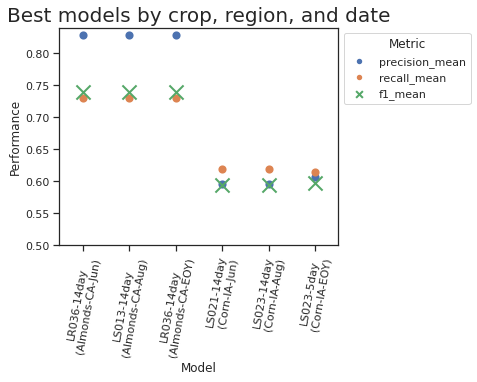

In [25]:
# First visual
sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

ax = sns.pointplot(data=zubs, x='model_full', y='Performance',
              hue='Metric',
              markers=['.','.','x'],
              join=False)
ax.collections[0].set_sizes([150])
ax.collections[1].set_sizes([150])
ax.collections[2].set_sizes([200])
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.5,0.84])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best models by crop, region, and date', size=20)
plt.savefig('../figures/Feb13_01.png',bbox_inches='tight',dpi=1000)

In [28]:
zubs_err = ww.melt(value_vars=['precision_mean','recall_mean','f1_mean',
                          'precision_stde', 'recall_stde', 'f1_stde'],
        value_name='Performance',
        var_name='Metric',
        id_vars=['model_full'])
         #index='model_scheme')

note color: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


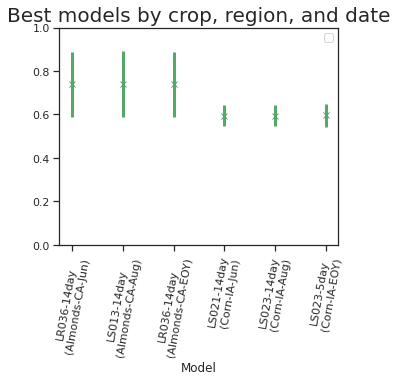

In [36]:
sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
plt.errorbar(x=ww['model_full'],y=ww['f1_mean'], linewidth=3,
                yerr=ww['f1_stde'], fmt='x',
            color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196))

plt.legend() ## Need to get the Xes and Errorbars into the legend
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.0,1.0])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best models by crop, region, and date', size=20)
plt.savefig('../figures/Feb13_01err.png',bbox_inches='tight',dpi=1000)

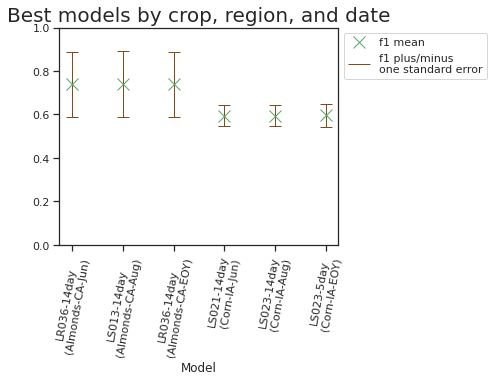

In [70]:
# Version with errorbars

sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

fig, ax = plt.subplots()
errcont = ax.errorbar(x=ww['model_full'],y=ww['f1_mean'], linewidth=1,
                yerr=ww['f1_stde'], fmt='x', capsize=6, ms=12,
            color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
            ecolor=(0.5,0.3,0.1))
ax.legend(handles=[errcont[0], errcont[2]],
          labels=['f1 mean','f1 plus/minus \none standard error']) # Need to get stuff into the legend
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.0,1.0])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best models by crop, region, and date', size=20)
plt.savefig('../figures/Feb13_01err.png',bbox_inches='tight',dpi=1000)

### Below section creates visual for best early-June of each architecture for 10SFH

In [71]:
idx = (mdf
       [mdf.train == '0.001']
       [mdf.tile =='10SFH']
       [mdf.in_season =='160']
       .groupby(['architecture'])
       ['f1_mean'].idxmax())
ww = mdf.reindex(idx)
      
      # .max(metric)
      #.sort_values(metric,ascending=False)
       
      
      #.groupby(['tile','in_season']))
 

/tmp/ipykernel_21286/2577860645.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = (mdf


In [72]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
f1_mean,,,,,,,,,,,,,,,
156,ET,ET014,0.001,0.001,10SFH,14day,75,160,0.847669,0.690056,0.724787,0.119471,0.208113,0.144915,ET014_0.001_0.001_10SFH_14day_75_160.csv
1896,KN,KN079,0.001,0.001,10SFH,14day,75,160,0.842040,0.710501,0.734647,0.130299,0.206973,0.147964,KN079_0.001_0.001_10SFH_14day_75_160.csv
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv
4231,NB,NB003,0.001,0.001,10SFH,14day,75,160,0.562149,0.796666,0.621152,0.171689,0.186300,0.127000,NB003_0.001_0.001_10SFH_14day_75_160.csv
4342,NP,NP005,0.001,0.001,10SFH,5day,75,160,0.816336,0.683557,0.709635,0.118818,0.198699,0.132538,NP005_0.001_0.001_10SFH_5day_75_160.csv
5203,PK,PK041,0.001,0.001,10SFH,14day,75,160,0.816490,0.626604,0.663234,0.154523,0.212081,0.120210,PK041_0.001_0.001_10SFH_14day_75_160.csv
6574,PL,PL003,0.001,0.001,10SFH,5day,75,160,0.850375,0.577386,0.656547,0.097400,0.201602,0.133306,PL003_0.001_0.001_10SFH_5day_75_160.csv
8110,RF,RF079,0.001,0.001,10SFH,5day,75,160,0.856589,0.673958,0.722912,0.106658,0.200012,0.148372,RF079_0.001_0.001_10SFH_5day_75_160.csv


In [73]:
ww['crop_region'] = np.where(
     ww['tile']=='10SFH', 
    'Almonds-CA',
    'Corn-IA')

ww['month'] = np.where(
     ww['in_season']=='160', 
    'Jun',
    np.where(
     ww['in_season']=='230', 
    'Aug',
    'EOY')
)

In [74]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file,crop_region,month
f1_mean,,,,,,,,,,,,,,,,,
156,ET,ET014,0.001,0.001,10SFH,14day,75,160,0.847669,0.690056,0.724787,0.119471,0.208113,0.144915,ET014_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
1896,KN,KN079,0.001,0.001,10SFH,14day,75,160,0.842040,0.710501,0.734647,0.130299,0.206973,0.147964,KN079_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
4231,NB,NB003,0.001,0.001,10SFH,14day,75,160,0.562149,0.796666,0.621152,0.171689,0.186300,0.127000,NB003_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
4342,NP,NP005,0.001,0.001,10SFH,5day,75,160,0.816336,0.683557,0.709635,0.118818,0.198699,0.132538,NP005_0.001_0.001_10SFH_5day_75_160.csv,Almonds-CA,Jun
5203,PK,PK041,0.001,0.001,10SFH,14day,75,160,0.816490,0.626604,0.663234,0.154523,0.212081,0.120210,PK041_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,Jun
6574,PL,PL003,0.001,0.001,10SFH,5day,75,160,0.850375,0.577386,0.656547,0.097400,0.201602,0.133306,PL003_0.001_0.001_10SFH_5day_75_160.csv,Almonds-CA,Jun
8110,RF,RF079,0.001,0.001,10SFH,5day,75,160,0.856589,0.673958,0.722912,0.106658,0.200012,0.148372,RF079_0.001_0.001_10SFH_5day_75_160.csv,Almonds-CA,Jun


In [75]:
#ww['Tile_InseasonDate: best model'] = ww['tile'] + '_' + ww['in_season'] + ':\n' + ww['model'] + '_' + ww['scheme']

In [76]:
ww['model_scheme'] = ww['model'] + '-' + ww['scheme']

In [77]:
alm = ww.melt(value_vars=['precision_mean','recall_mean','f1_mean'],
        value_name='Performance',
        var_name='Metric',
        id_vars=['model_scheme'])
         #index='model_scheme')

/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.3333333333333333, 0.6588235294117647, 0.40784313725490196)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


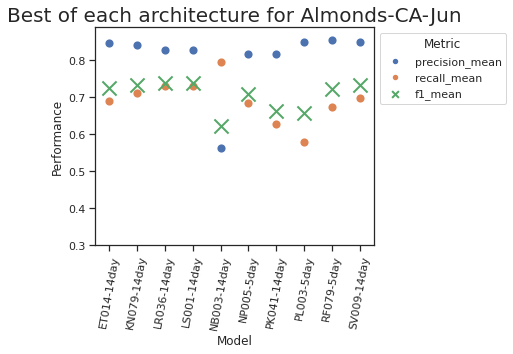

In [78]:
sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

ax = sns.pointplot(data=alm, x='model_scheme', y='Performance',
              hue='Metric',
              markers=['.','.','x'],
              join=False)
ax.collections[0].set_sizes([150])
ax.collections[1].set_sizes([150])
ax.collections[2].set_sizes([200])
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.3,0.89])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best of each architecture for Almonds-CA-Jun', size=20)
plt.savefig('../figures/Feb13_02.png',bbox_inches='tight',dpi=1000)

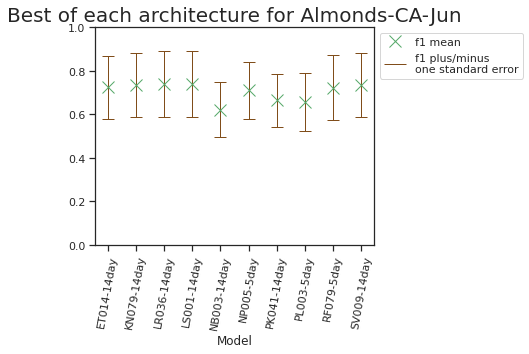

In [80]:
sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

fig, ax = plt.subplots()
errcont = ax.errorbar(x=ww['model_scheme'],y=ww['f1_mean'], linewidth=1,
                yerr=ww['f1_stde'], fmt='x', capsize=6, ms=12,
            color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
            ecolor=(0.5,0.3,0.1))
ax.legend(handles=[errcont[0], errcont[2]],
          labels=['f1 mean','f1 plus/minus \none standard error']) # Need to get stuff into the legend
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.0,1.0])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best of each architecture for Almonds-CA-Jun', size=20)
plt.savefig('../figures/Feb13_02err.png',bbox_inches='tight',dpi=1000)

### Below section creates visual for best early-June of each architecture for 15TVG

In [81]:
idx = (mdf
       [mdf.train == '0.001']
       [mdf.tile =='15TVG']
       [mdf.in_season =='160']
       .groupby(['architecture'])
       ['f1_mean'].idxmax())
ww = mdf.reindex(idx)
      
      # .max(metric)
      #.sort_values(metric,ascending=False)
       
      
      #.groupby(['tile','in_season']))
 

/tmp/ipykernel_21286/3214694286.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = (mdf


In [82]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
f1_mean,,,,,,,,,,,,,,,
546,ET,ET046,0.001,0.001,15TVG,14day,1,160,0.707363,0.516687,0.576760,0.130404,0.101907,0.047873,ET046_0.001_0.001_15TVG_14day_1_160.csv
2046,KN,KN091,0.001,0.001,15TVG,14day,1,160,0.714139,0.513525,0.578926,0.117165,0.100303,0.053066,KN091_0.001_0.001_15TVG_14day_1_160.csv
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv
4089,LS,LS021,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_0.001_0.001_15TVG_14day_1_160.csv
4285,NB,NB007,0.001,0.001,15TVG,14day,1,160,0.333533,0.800054,0.464657,0.067809,0.070387,0.063809,NB007_0.001_0.001_15TVG_14day_1_160.csv
4321,NP,NP003,0.001,0.001,15TVG,14day,1,160,0.714675,0.511939,0.579341,0.112878,0.098539,0.048251,NP003_0.001_0.001_15TVG_14day_1_160.csv
6433,PK,PK143,0.001,0.001,15TVG,14day,1,160,0.729030,0.482406,0.569247,0.112400,0.063798,0.019992,PK143_0.001_0.001_15TVG_14day_1_160.csv
6937,PL,PL033,0.001,0.001,15TVG,14day,1,160,0.731980,0.481245,0.567026,0.113917,0.076143,0.025816,PL033_0.001_0.001_15TVG_14day_1_160.csv
7969,RF,RF067,0.001,0.001,15TVG,14day,1,160,0.716551,0.489845,0.565844,0.113794,0.090566,0.049447,RF067_0.001_0.001_15TVG_14day_1_160.csv


In [83]:
ww['crop_region'] = np.where(
     ww['tile']=='10SFH', 
    'Almonds-CA',
    'Corn-IA')

ww['month'] = np.where(
     ww['in_season']=='160', 
    'Jun',
    np.where(
     ww['in_season']=='230', 
    'Aug',
    'EOY')
)

In [84]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file,crop_region,month
f1_mean,,,,,,,,,,,,,,,,,
546,ET,ET046,0.001,0.001,15TVG,14day,1,160,0.707363,0.516687,0.576760,0.130404,0.101907,0.047873,ET046_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
2046,KN,KN091,0.001,0.001,15TVG,14day,1,160,0.714139,0.513525,0.578926,0.117165,0.100303,0.053066,KN091_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
4089,LS,LS021,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
4285,NB,NB007,0.001,0.001,15TVG,14day,1,160,0.333533,0.800054,0.464657,0.067809,0.070387,0.063809,NB007_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
4321,NP,NP003,0.001,0.001,15TVG,14day,1,160,0.714675,0.511939,0.579341,0.112878,0.098539,0.048251,NP003_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
6433,PK,PK143,0.001,0.001,15TVG,14day,1,160,0.729030,0.482406,0.569247,0.112400,0.063798,0.019992,PK143_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
6937,PL,PL033,0.001,0.001,15TVG,14day,1,160,0.731980,0.481245,0.567026,0.113917,0.076143,0.025816,PL033_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun
7969,RF,RF067,0.001,0.001,15TVG,14day,1,160,0.716551,0.489845,0.565844,0.113794,0.090566,0.049447,RF067_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,Jun


In [85]:
#ww['Tile_InseasonDate: best model'] = ww['tile'] + '_' + ww['in_season'] + ':\n' + ww['model'] + '_' + ww['scheme']

In [86]:
ww['model_scheme'] = ww['model'] + '-' + ww['scheme']

In [87]:
corn = ww.melt(value_vars=['precision_mean','recall_mean','f1_mean'],
        value_name='Performance',
        var_name='Metric',
        id_vars=['model_scheme'])
         #index='model_scheme')

/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.3333333333333333, 0.6588235294117647, 0.40784313725490196)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


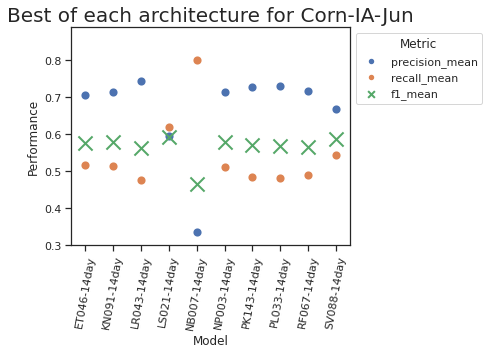

In [91]:
sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

ax = sns.pointplot(data=corn, x='model_scheme', y='Performance',
              hue='Metric',
              markers=['.','.','x'],
              join=False)
ax.collections[0].set_sizes([150])
ax.collections[1].set_sizes([150])
ax.collections[2].set_sizes([200])
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.3,0.89])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best of each architecture for Corn-IA-Jun', size=20)
plt.savefig('../figures/Feb13_03.png',bbox_inches='tight',dpi=1000)

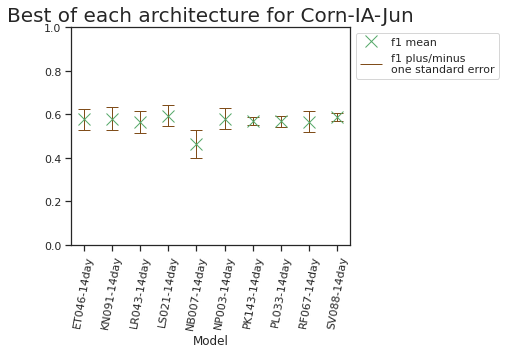

In [92]:
sns.set_theme(rc={'figure.figsize':(5,4)},
              style='ticks')
#plt.figure(figsize=(16,4))


fig, ax = plt.subplots()
errcont = ax.errorbar(x=ww['model_scheme'],y=ww['f1_mean'], linewidth=1,
                yerr=ww['f1_stde'], fmt='x', capsize=6, ms=12,
            color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
            ecolor=(0.5,0.3,0.1))
ax.legend(handles=[errcont[0], errcont[2]],
          labels=['f1 mean','f1 plus/minus \none standard error']) # Need to get stuff into the legend
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.0,1.0])
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best of each architecture for Corn-IA-Jun', size=20)
plt.savefig('../figures/Feb13_03err.png',bbox_inches='tight',dpi=1000)

### Below section creates visual for 100% models compared with their 0.1% counterparts

In [93]:
ww = (mdf
      [mdf.model.isin(['LR036','LS021','SV009','SV088',
                  'SV130','SV085','SV059','LS001','LR043'])]
      [mdf.scheme == '14day']
      [mdf.in_season == '160']
     )

/tmp/ipykernel_21286/764693984.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ww = (mdf


In [94]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv
3495,LR,LR036,0.001,0.001,15TVG,14day,1,160,0.475997,0.723352,0.555261,0.112954,0.103460,0.042231,LR036_0.001_0.001_15TVG_14day_1_160.csv
3504,LR,LR036,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_160.csv
3510,LR,LR036,1.0,0.001,15TVG,14day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_160.csv
3637,LR,LR043,0.001,0.001,10SFH,14day,75,160,0.862802,0.630089,0.682219,0.142745,0.228146,0.149826,LR043_0.001_0.001_10SFH_14day_75_160.csv
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv
3656,LR,LR043,1.0,0.001,10SFH,14day,75,160,0.863525,0.641975,0.688987,0.143725,0.236059,0.154170,LR043_1.0_0.001_10SFH_14day_75_160.csv
3658,LR,LR043,1.0,0.001,15TVG,14day,1,160,0.738732,0.484365,0.566177,0.119494,0.100173,0.050151,LR043_1.0_0.001_15TVG_14day_1_160.csv
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv
3846,LS,LS001,0.001,0.001,15TVG,14day,1,160,0.726580,0.509352,0.580225,0.111290,0.106488,0.054922,LS001_0.001_0.001_15TVG_14day_1_160.csv


In [95]:
ww['crop_region'] = np.where(
     ww['tile']=='10SFH', 
    'Almonds-CA',
    'Corn-IA')


/tmp/ipykernel_21286/2133437382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ww['crop_region'] = np.where(


In [96]:
ww['model_crop_region_scheme'] = ww['model'] + '-' + ww['crop_region'] + '-' + ww['scheme']

/tmp/ipykernel_21286/948655137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ww['model_crop_region_scheme'] = ww['model'] + '-' + ww['crop_region'] + '-' + ww['scheme']


In [97]:
ww

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file,crop_region,model_crop_region_scheme
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LR036-Almonds-CA-14day
3495,LR,LR036,0.001,0.001,15TVG,14day,1,160,0.475997,0.723352,0.555261,0.112954,0.103460,0.042231,LR036_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LR036-Corn-IA-14day
3504,LR,LR036,1.0,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_1.0_0.001_10SFH_14day_75_160.csv,Almonds-CA,LR036-Almonds-CA-14day
3510,LR,LR036,1.0,0.001,15TVG,14day,1,160,0.506576,0.705977,0.579505,0.079790,0.083408,0.029012,LR036_1.0_0.001_15TVG_14day_1_160.csv,Corn-IA,LR036-Corn-IA-14day
3637,LR,LR043,0.001,0.001,10SFH,14day,75,160,0.862802,0.630089,0.682219,0.142745,0.228146,0.149826,LR043_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LR043-Almonds-CA-14day
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LR043-Corn-IA-14day
3656,LR,LR043,1.0,0.001,10SFH,14day,75,160,0.863525,0.641975,0.688987,0.143725,0.236059,0.154170,LR043_1.0_0.001_10SFH_14day_75_160.csv,Almonds-CA,LR043-Almonds-CA-14day
3658,LR,LR043,1.0,0.001,15TVG,14day,1,160,0.738732,0.484365,0.566177,0.119494,0.100173,0.050151,LR043_1.0_0.001_15TVG_14day_1_160.csv,Corn-IA,LR043-Corn-IA-14day
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LS001-Almonds-CA-14day
3846,LS,LS001,0.001,0.001,15TVG,14day,1,160,0.726580,0.509352,0.580225,0.111290,0.106488,0.054922,LS001_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LS001-Corn-IA-14day


In [98]:
vv = ww.loc[:,['model_crop_region_scheme','train','f1_mean']]

In [99]:
vv['Metric'] = np.where(
     ww['train']=='0.001', 
    'f1 mean from 0.1% training',
    'f1 mean from 100% training')
vv['Performance'] = vv['f1_mean']

In [100]:
vv['Training Set'] = np.where(
     ww['train']=='0.001', 
    '0.1% sample',
    '100%')
vv['F1 Mean'] = vv['f1_mean']

In [101]:
vv

,model_crop_region_scheme,train,f1_mean,Metric,Performance,Training Set,F1 Mean
3485,LR036-Almonds-CA-14day,0.001,0.738933,f1 mean from 0.1% training,0.738933,0.1% sample,0.738933
3495,LR036-Corn-IA-14day,0.001,0.555261,f1 mean from 0.1% training,0.555261,0.1% sample,0.555261
3504,LR036-Almonds-CA-14day,1.0,0.738933,f1 mean from 100% training,0.738933,100%,0.738933
3510,LR036-Corn-IA-14day,1.0,0.579505,f1 mean from 100% training,0.579505,100%,0.579505
3637,LR043-Almonds-CA-14day,0.001,0.682219,f1 mean from 0.1% training,0.682219,0.1% sample,0.682219
3647,LR043-Corn-IA-14day,0.001,0.562692,f1 mean from 0.1% training,0.562692,0.1% sample,0.562692
3656,LR043-Almonds-CA-14day,1.0,0.688987,f1 mean from 100% training,0.688987,100%,0.688987
3658,LR043-Corn-IA-14day,1.0,0.566177,f1 mean from 100% training,0.566177,100%,0.566177
3840,LS001-Almonds-CA-14day,0.001,0.738933,f1 mean from 0.1% training,0.738933,0.1% sample,0.738933
3846,LS001-Corn-IA-14day,0.001,0.580225,f1 mean from 0.1% training,0.580225,0.1% sample,0.580225


/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.9677975592919913, 0.44127456009157356, 0.5358103155058701)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.21044753832183283, 0.6773105080456748, 0.6433941168468681)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


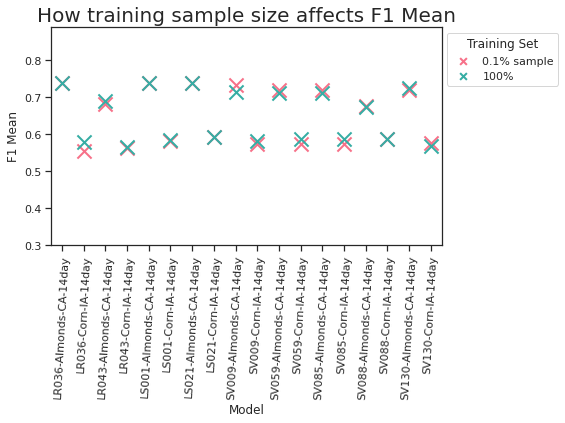

In [103]:
sns.set_theme(rc={'figure.figsize':(7,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

ax = sns.pointplot(data=vv, x='model_crop_region_scheme', y='F1 Mean',
              hue='Training Set',
              markers=['x','x'],
              join=False,
              palette = sns.color_palette("husl", 2))
ax.collections[0].set_sizes([200])
ax.collections[1].set_sizes([200])
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.3,0.89])
plt.xticks(rotation=87)
plt.xlabel('Model')
plt.title('How training sample size affects F1 Mean', size=20)
plt.savefig('../figures/Feb13_04.png',bbox_inches='tight',dpi=1000)

In [109]:
ww1=ww.loc[ww['train']=='0.001']

In [114]:
ww1

,architecture,model,train,val,tile,scheme,crop,in_season,precision_mean,recall_mean,f1_mean,precision_stde,recall_stde,f1_stde,file,crop_region,model_crop_region_scheme
3485,LR,LR036,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LR036_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LR036-Almonds-CA-14day
3495,LR,LR036,0.001,0.001,15TVG,14day,1,160,0.475997,0.723352,0.555261,0.112954,0.103460,0.042231,LR036_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LR036-Corn-IA-14day
3637,LR,LR043,0.001,0.001,10SFH,14day,75,160,0.862802,0.630089,0.682219,0.142745,0.228146,0.149826,LR043_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LR043-Almonds-CA-14day
3647,LR,LR043,0.001,0.001,15TVG,14day,1,160,0.745266,0.475663,0.562692,0.113730,0.099634,0.050809,LR043_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LR043-Corn-IA-14day
3840,LS,LS001,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS001_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LS001-Almonds-CA-14day
3846,LS,LS001,0.001,0.001,15TVG,14day,1,160,0.726580,0.509352,0.580225,0.111290,0.106488,0.054922,LS001_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LS001-Corn-IA-14day
4083,LS,LS021,0.001,0.001,10SFH,14day,75,160,0.828662,0.730286,0.738933,0.131138,0.214463,0.150597,LS021_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,LS021-Almonds-CA-14day
4089,LS,LS021,0.001,0.001,15TVG,14day,1,160,0.595091,0.619387,0.593404,0.071663,0.114012,0.048444,LS021_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,LS021-Corn-IA-14day
8227,SV,SV009,0.001,0.001,10SFH,14day,75,160,0.850820,0.699148,0.732471,0.123002,0.207513,0.147452,SV009_0.001_0.001_10SFH_14day_75_160.csv,Almonds-CA,SV009-Almonds-CA-14day
8233,SV,SV009,0.001,0.001,15TVG,14day,1,160,0.713629,0.500490,0.573528,0.106460,0.089451,0.049702,SV009_0.001_0.001_15TVG_14day_1_160.csv,Corn-IA,SV009-Corn-IA-14day


In [110]:
ww2=ww.loc[ww['train']=='1.0']

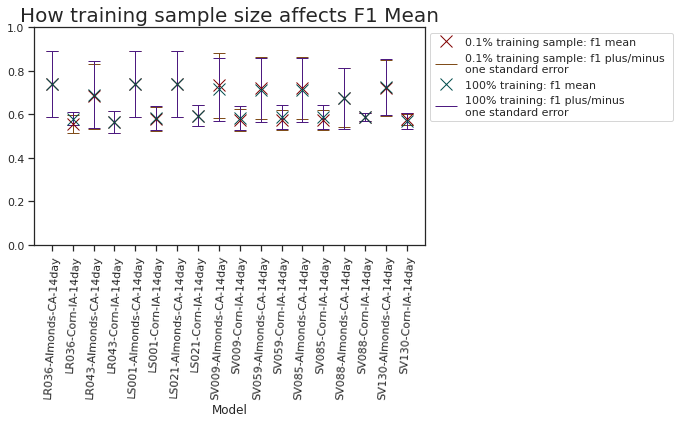

In [121]:
sns.set_theme(rc={'figure.figsize':(7,4)},
              style='ticks')
#plt.figure(figsize=(16,4))

fig, ax = plt.subplots()
errcont1 = ax.errorbar(x=ww1['model_crop_region_scheme'],y=ww1['f1_mean'], linewidth=1,
                yerr=ww1['f1_stde'], fmt='x', capsize=6, ms=12,
            color=(0.5,0,0),
            ecolor=(0.5,0.3,0.1))
errcont2 = ax.errorbar(x=ww2['model_crop_region_scheme'],y=ww2['f1_mean'], linewidth=1,
                yerr=ww2['f1_stde'], fmt='x', capsize=6, ms=12,
            color=(0,0.3,0.3),
            ecolor=(0.3,0.1,0.5))
ax.legend(handles=[errcont1[0], errcont1[2], errcont2[0], errcont2[2]],
          labels=['0.1% training sample: f1 mean',
                  '0.1% training sample: f1 plus/minus \none standard error',
                  '100% training: f1 mean',
                  '100% training: f1 plus/minus \none standard error']) # Need to get stuff into the legend
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.ylim([0.0,1.0])
plt.xticks(rotation=87)
plt.xlabel('Model')
plt.title('How training sample size affects F1 Mean', size=20)
plt.savefig('../figures/Feb13_04err.png',bbox_inches='tight',dpi=1000)

In [ ]:
zubs = ww.melt(value_vars=['precision_mean','recall_mean','f1_mean'],
        value_name='Performance',
        var_name='Metric',
        id_vars=['Tile_InseasonDate: best model'])
         #index='model_scheme')

In [ ]:
ax = sns.pointplot(data=zubs, x='Tile_InseasonDate: best model', y='Performance',
              hue='Metric',
              markers=['o','o','x'],
              join=False)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.xticks(rotation=80)
plt.xlabel('Model')
plt.title('Best models by region by date', size=20)
plt.savefig('../figures/HeadlineAugust2')